In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from scipy.stats import beta, bernoulli
from matplotlib.patches import Rectangle

%matplotlib inline

In [3]:
ads_data = pd.read_csv('Ads_Optimisation.csv', header=1, names = ['Ads1','Ads2','Ads3','Ads4','Ads5','Ads6','Ads7','Ads8','Ads9','Ads10'])

### 데이터 로드

In [4]:
ads_data

Ads1  Ads2  Ads3  Ads4  Ads5  Ads6  Ads7  Ads8  Ads9  Ads10
0        0     0     0     0     0     0     0     0     1      0
1        0     0     0     0     0     0     0     0     0      0
2        0     1     0     0     0     0     0     1     0      0
3        0     0     0     0     0     0     0     0     0      0
4        1     1     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9994     0     0     1     0     0     0     0     1     0      0
9995     0     0     0     0     0     0     0     0     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     1     0     0     0     0     0     0     1     0      0
9998     0     1     0     0     0     0     0     0     0      0

[9999 rows x 10 columns]

### 2000개만 가져오기

In [39]:
samples = ads_data.iloc[:2000, :]

In [6]:
# CTR of each ads, total data
Series.sort_values(ads_data.sum()/len(ads_data), ascending=False)

Ads5     0.269427
Ads8     0.209121
Ads1     0.170217
Ads2     0.129513
Ads4     0.119612
Ads7     0.111211
Ads9     0.095110
Ads3     0.072807
Ads10    0.048905
Ads6     0.012601
dtype: float64

In [7]:
# CTR of each ads, Samples 
Series.sort_values(samples.sum()/len(samples), ascending=False)

Ads5     0.2710
Ads8     0.2120
Ads1     0.1700
Ads4     0.1300
Ads2     0.1240
Ads7     0.1015
Ads9     0.0965
Ads3     0.0695
Ads10    0.0450
Ads6     0.0115
dtype: float64

#### 샘플링한 것과 전체 데이터는 거의 비슷하다, 5번 광고가 가장 CTR이 높고, 8번 순이다, 가장 낮은 CTR을 보이는 광고는 6번이다.

* 어떻게 실험할까?
 - 광고의 안은 10개이다, 샘플 수는 2000개니까 2000번 광고를 노출 시킬 것이다.  <--문제점 발견
 - 노출을 시킬 때 어떤 광고를 보여줄지 정하는 게 중요한 것 같다. Beta 분포에서 샘플링 해서 샘플링 된 rvs 값이 큰 걸 노출 시키는 방법을 사용해야겠다.
 - 광고가 노출되면, sample에서 해당 광고의 데이터로 이동해서 0이면 beta를 +1하고 1이면 alpha를 +1한다.
 - 해당 광고가 다음 노출이 될 때까지 이 상태를 유지한다.

### 시각화 코드 연습

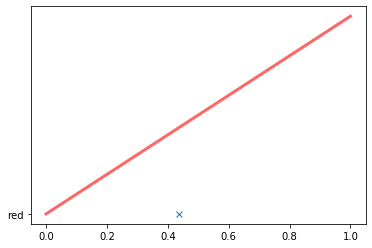

In [9]:
ads_1 = beta.rvs(1,1, size=1)
ads_1

fig, ax = plt.subplots(1, 1)


x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, 2, 1), 'r-', lw=3, alpha=0.6, label='ads_1')
ax.plot(ads_1, 0, 'x', 'red')

In [94]:
#for문 돌면 i가 1씩 늘어나니까 앞에 i를 넣으면?
#뒤에 Format string을 삽입하는게 가능한가? ==> iloc에 max_rvs_ad를 넣으면 해결

for i in range(10):
    print(samples.iloc[0,i])

0
0
0
0
0
0
0
0
1
0


In [182]:
tst = 'ads_'+'{}'.format(max_rvs_ad)

In [184]:
# eval을 사용하면 str으로 얻어진 값을 객체로 변환할 수 있다!!!!!!!
eval(tst)

array([0.28651494])

In [181]:
s = 'Hello, Geeks.'
print (repr(s) )
print (repr(2.0/11.0) )

'Hello, Geeks.'
0.18181818181818182


In [ ]:
# 챔피언 광고를 구한 상태에서 챔피언 광고에 대해 베타값을 수정해주는 작업이 필요

In [ ]:
regret = 0 
total_reward = 0
regret_list = [] 
ctr = {0: [], 1: []}
index_list = [] 
impressions = [0,0] 
clicks = [0,0]
priors = (1, 1)
win_index = np.random.randint(0,2,1)[0] ## randomly choose the first shown Ad

for i in range(n):    
    impressions[win_index] += 1
    did_click = bernoulli.rvs(ACTUAL_CTR[win_index])
    
    if did_click:
        clicks[win_index] += did_click
    
    ctr_0 = random.betavariate(priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
    ctr_1 = random.betavariate(priors[0]+clicks[1], priors[1] + impressions[1] - clicks[1])
    win_index = np.argmax([ctr_0, ctr_1])
    index_list.append(win_index)
    
    ctr[0].append(ctr_0)
    ctr[1].append(ctr_1)
    
    regret += max(ACTUAL_CTR) - ACTUAL_CTR[win_index]
    regret_list.append(regret)    
    total_reward += did_click

    
## plot the Beta distributions
x = np.arange (0, 1, 0.01)
y = beta.pdf(x, priors[0]+clicks[0], priors[1] + impressions[0] - clicks[0])
y /= y.max() ## normalize


win하는 index가(win_index)있고 index에 맞는, 숫자에 해당하는 init_alpha_1,2,3,4중 하나에 +1을 해주려고 하는데
대충 init_alpha_{win_index} += 1 이런 식으로 동작하려면 어떻게 해야하는지?

In [199]:
id(eval('init_alpha_' + '{}'.format(win_index)))

4537554256

In [201]:
id(init_alpha_1)

4537554256

In [275]:
beta.rvs(5000,init_beta_1, size=1)

array([0.99995808])

In [279]:
'ads_'+'{}'.format(win_index)

'ads_2'

In [112]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)

#max_rvs를 가져와서 해당 값을 가진 광고를 찾는 코드
ads_rvs=[ads_1, ads_2, ads_3, ads_4]
print(ads_rvs)
max_rvs = np.max(ads_rvs)
win_index = ads_rvs.index(max_rvs)
win_index
#print('ads_'+'{}'.format(win_index))

# eval('ads_'+'{}'.format(win_index))
# eval('init_alpha_' + '{}'.format(win_index+1))

##### 해당 ad 들어가서 0일때 1일 때 alpha, beta값 조정
# ads 별로 0 1값을 바로 rvs에 넣으면?

[array([0.35715326]), array([0.08920128]), array([0.65963647]), array([0.87369407])]


3

In [81]:
print(samples.iloc[:100,0].sum(),samples.iloc[:100,1].sum(),samples.iloc[:100,2].sum(),samples.iloc[:100,3].sum())

8 15 7 13


In [90]:
print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)

1 1 1 1


In [38]:
samples.iloc[:100, :4]

Ads1  Ads2  Ads3  Ads4
0      0     0     0     0
1      0     0     0     0
2      0     1     0     0
3      0     0     0     0
4      1     1     0     0
..   ...   ...   ...   ...
95     0     1     0     0
96     0     0     0     1
97     0     0     1     1
98     0     0     0     0
99     0     0     0     0

[100 rows x 4 columns]

### 테스트 코드

2
1 1 1 1
2
1 1 1 1
2
1 1 1 1
1
1 1 1 1
3
1 1 1 1
0
1 1 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
0
2 2 1 1
1
2 3 1 1
1
2 3 1 1
3
2 3 1 1
1
2 3 1 1
2
2 3 1 1
1
2 3 1 2
2
2 4 1 2
3
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 1 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2
1
2 4 2 2
0
2 4 2 2
1
2 4 2 2


/Users/sanghyub/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1
2 4 2 2
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
3
2 4 2 3
3
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
3
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
1
2 4 2 3
1
2 4 2 3
0
2 4 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
0
3 5 2 3
0
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 5 2 3
3
3 5 2 3
1
3 5 2 3
0
3 5 2 3
1
3 6 2 3
1
3 6 2 3
1
3 6 2 3
1
3 7 2 3
1
3 7 2 3
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 4
1
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
3
3 7 2 4
1
3 7 2 4
3
3 7 2 4
1
3 7 2 4
0
3 7 2 4
0
3 7 2 4
0
3 7 2 4
1
3 7 2 5
1
3 7 2 5
3
3 7 2 5
3
3 7 2 5
2
3 7 2 5
0
3 7 2 5
1
3 7 2 5
1
3 7 2 5
2
3 7 2 5
0
3 7 2 5
3
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 5
1
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
3
3 7 2 6
0
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
3
3 7 2 6
1
3 7 2 6
1
3 7 2 6
0
3 7 2 6
0
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6
1
3 7 2 6


1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
0
6 37 18 31
1
6 37 18 31
3
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 31
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 32
3
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
1
6 37 18 32
3
6 37 18 33
1
6 37 18 33
1
6 37 18 33
1
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
0
6 37 18 34
3
6 37 18 34
3
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
1
6 37 18 34
3
6 37 18 34

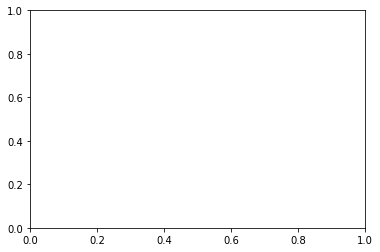

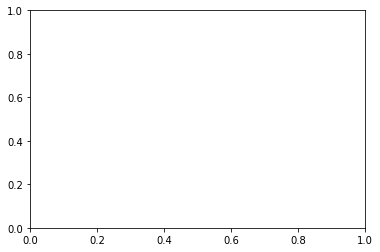

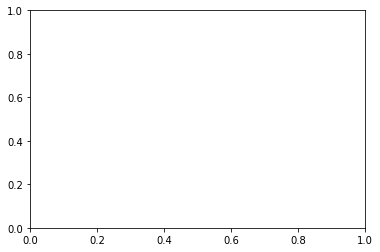

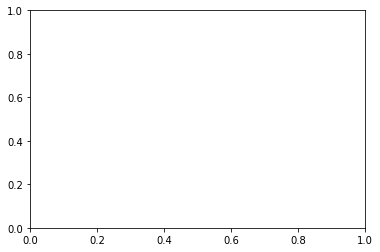

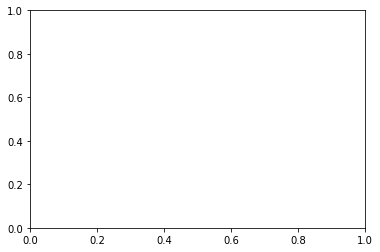

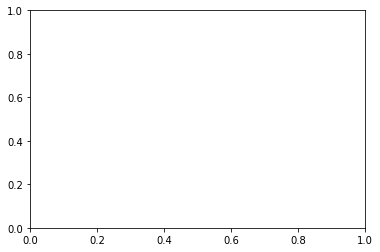

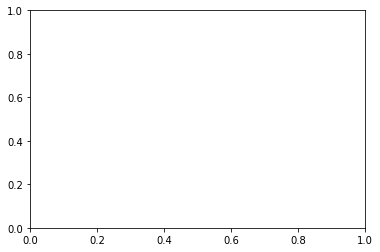

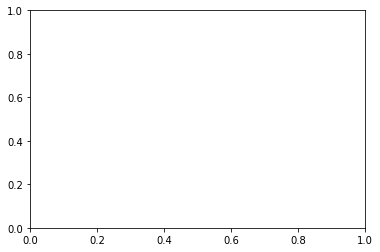

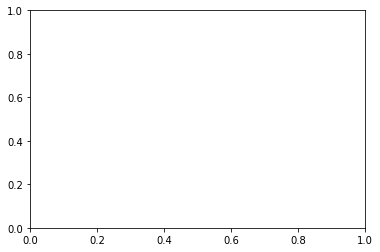

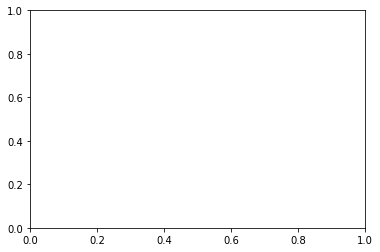

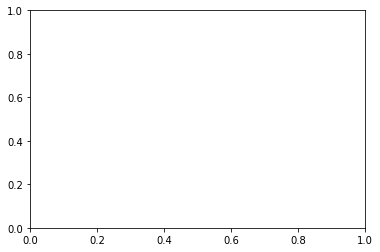

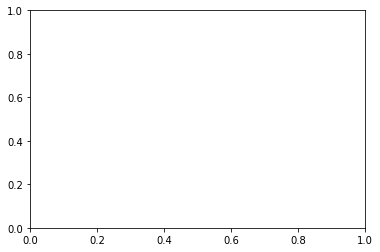

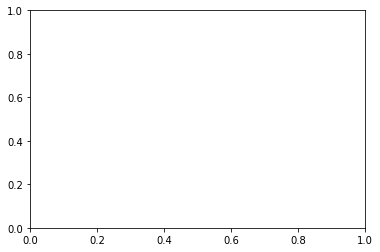

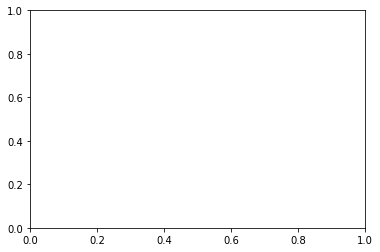

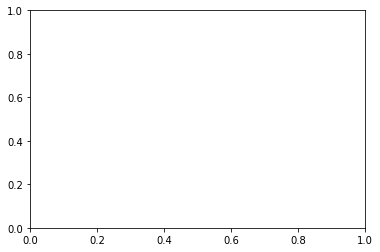

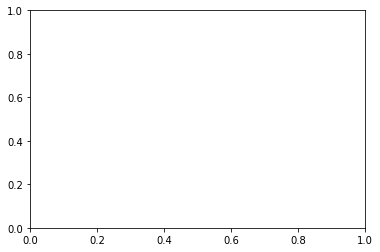

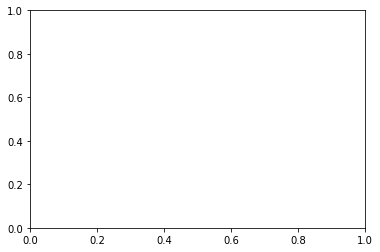

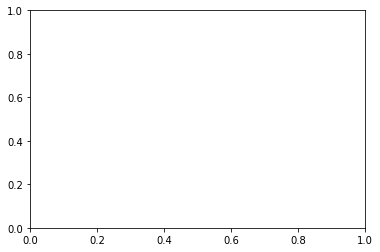

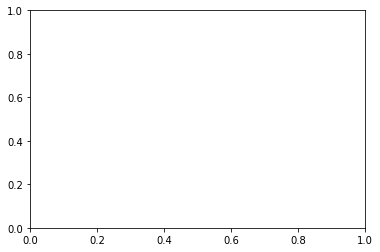

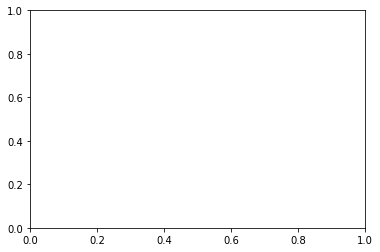

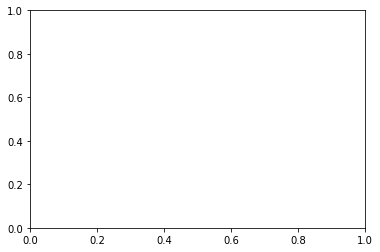

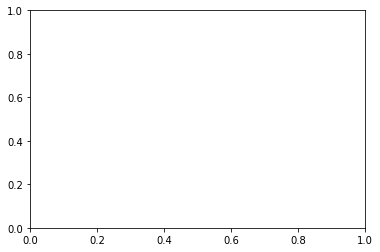

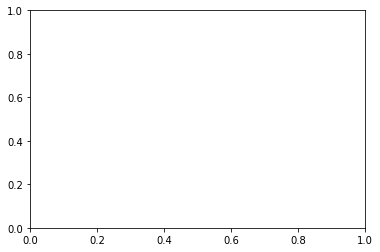

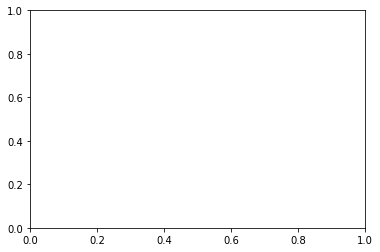

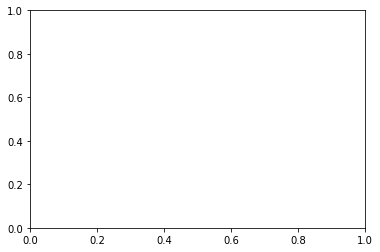

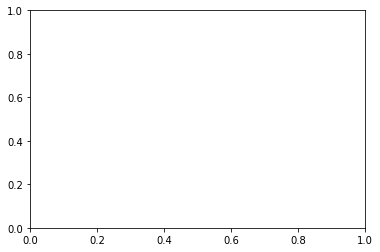

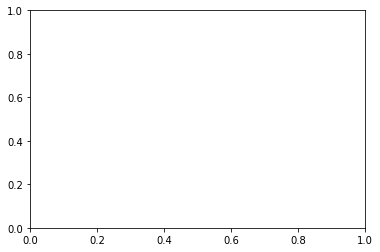

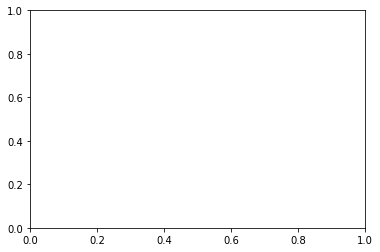

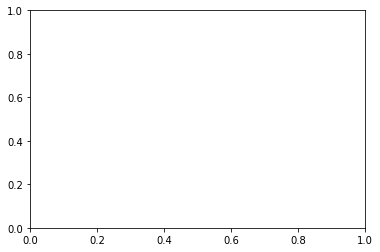

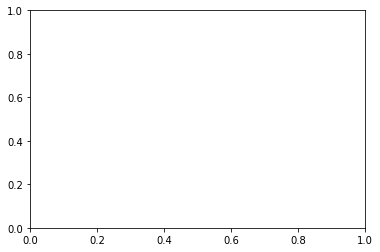

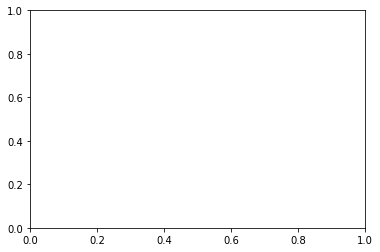

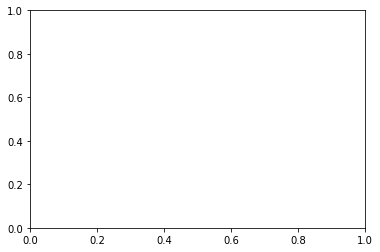

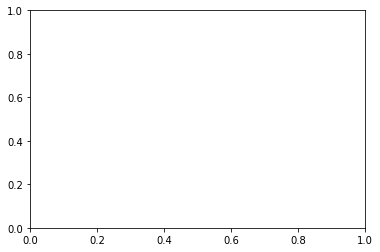

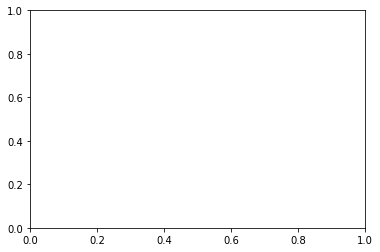

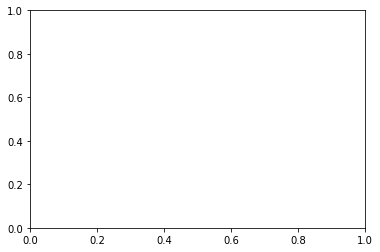

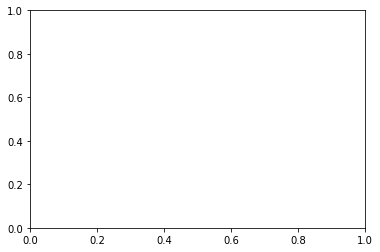

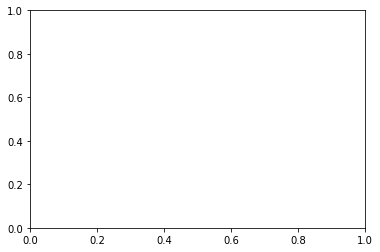

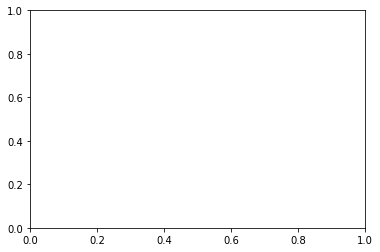

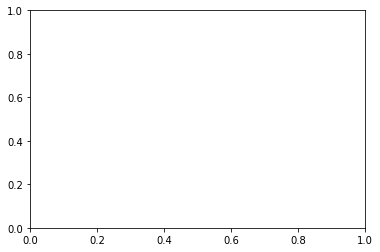

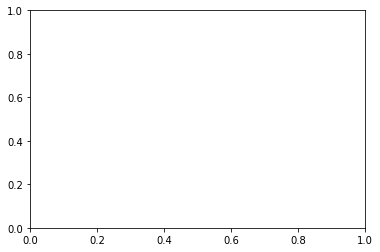

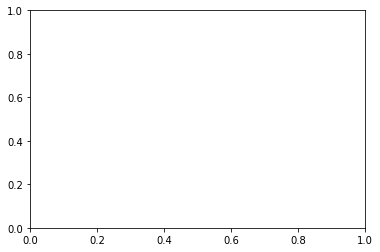

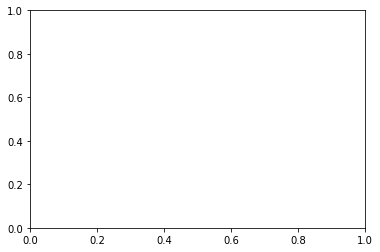

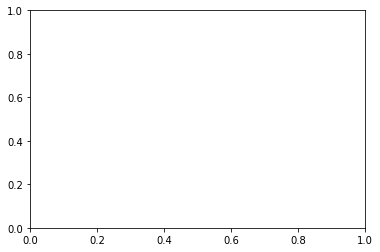

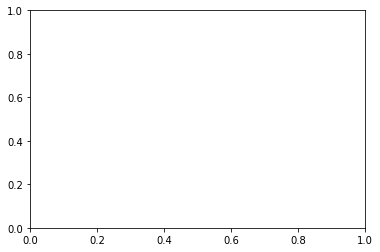

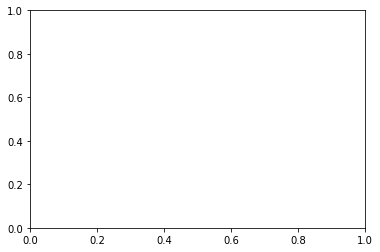

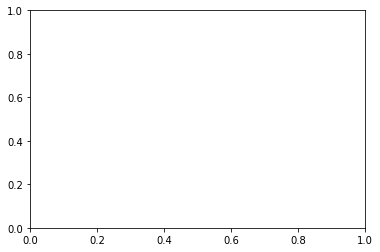

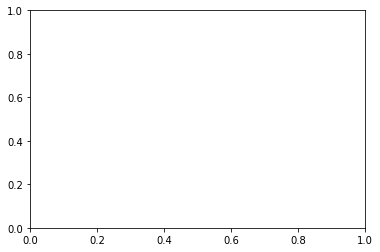

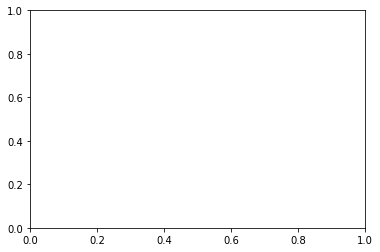

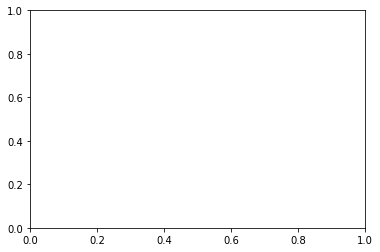

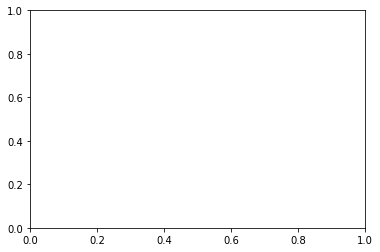

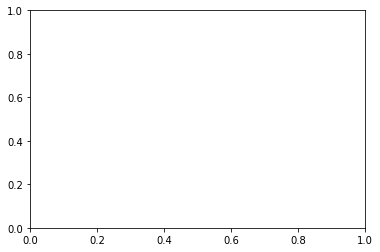

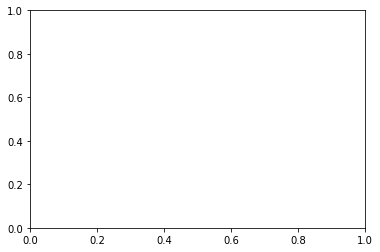

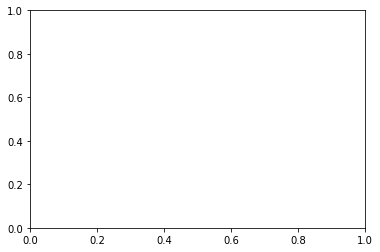

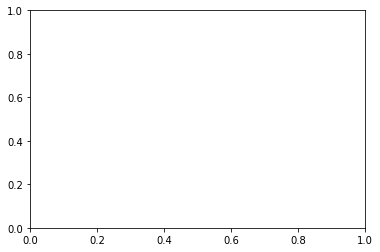

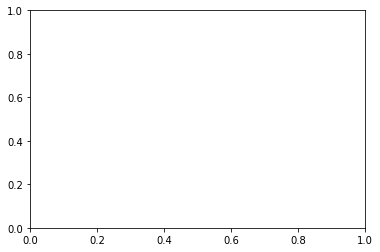

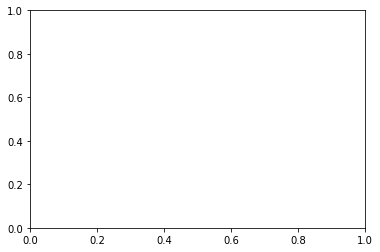

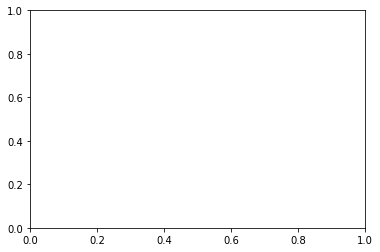

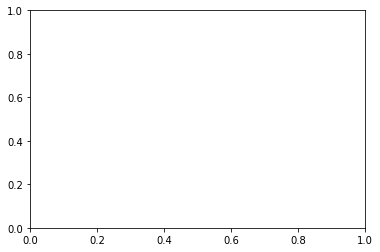

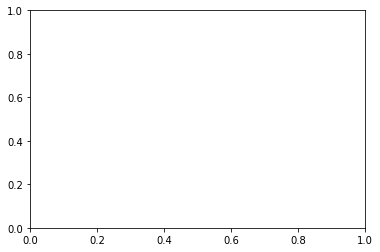

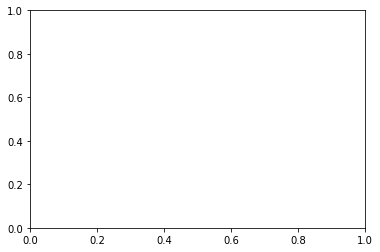

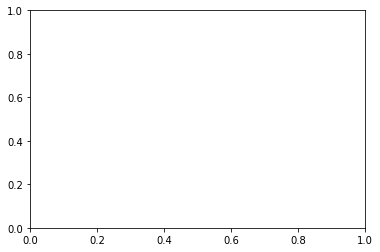

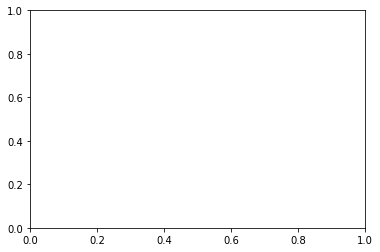

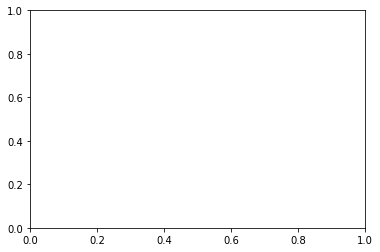

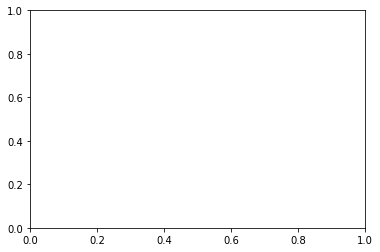

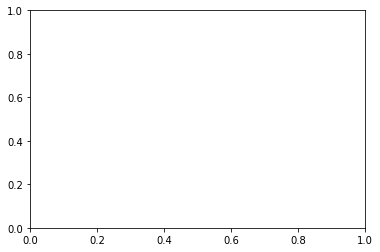

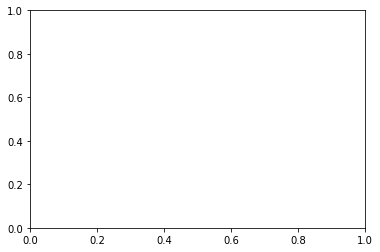

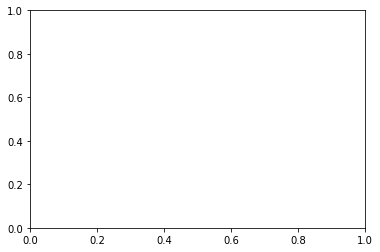

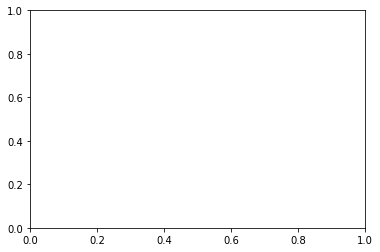

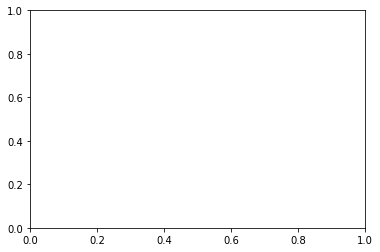

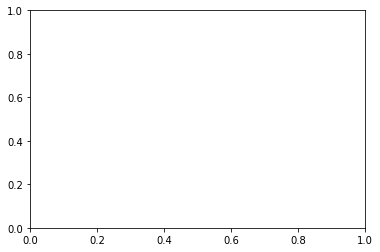

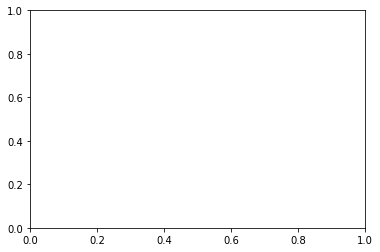

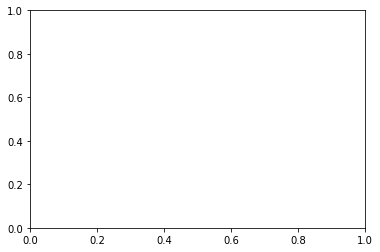

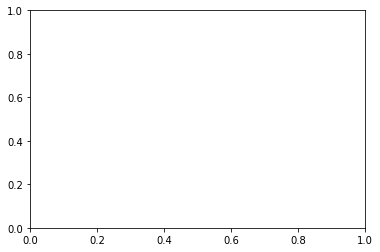

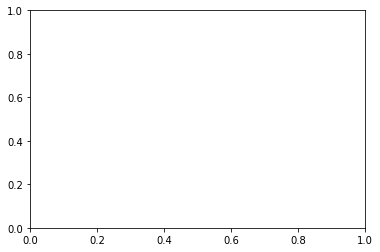

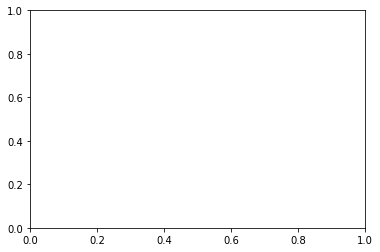

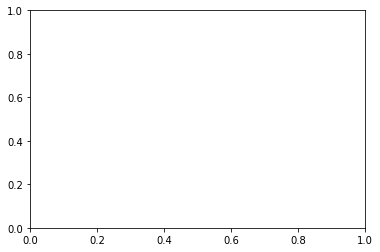

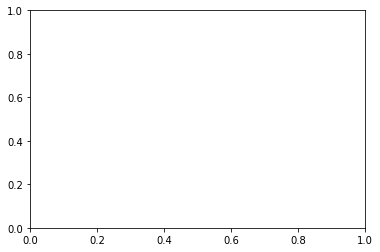

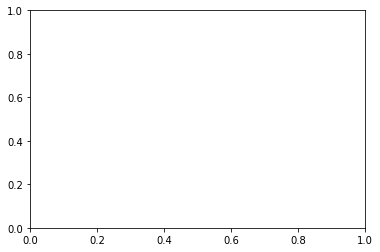

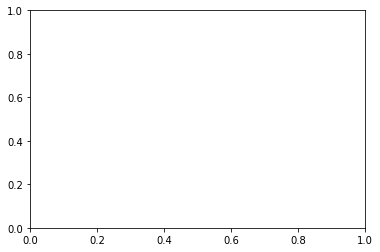

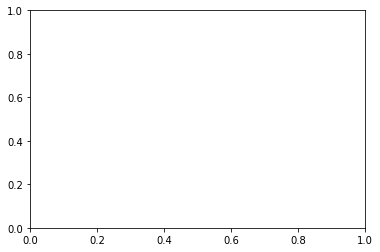

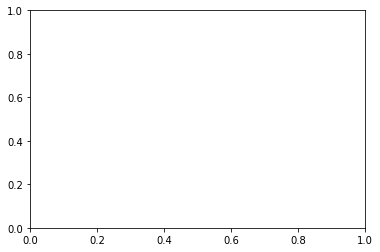

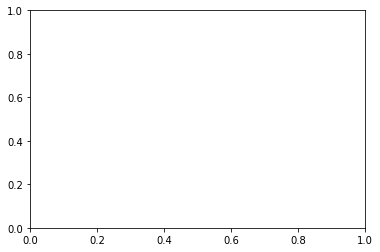

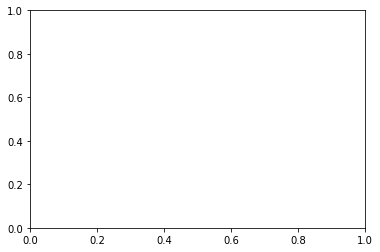

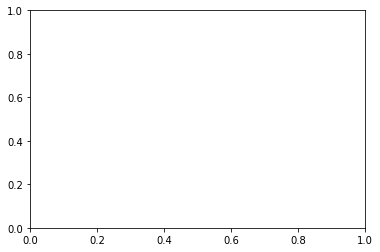

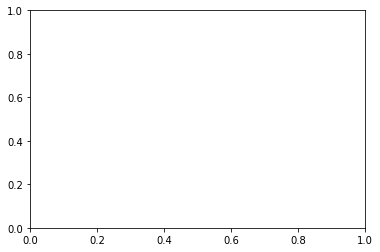

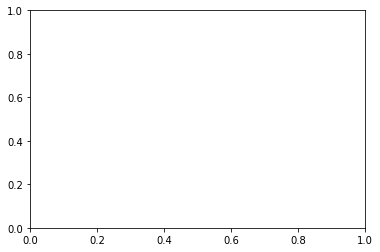

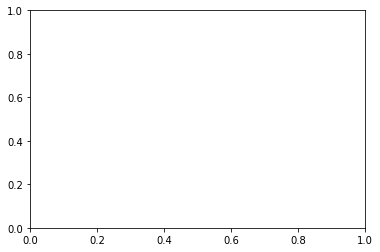

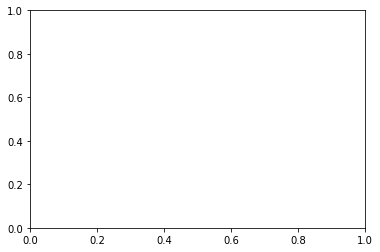

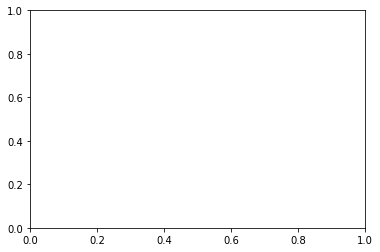

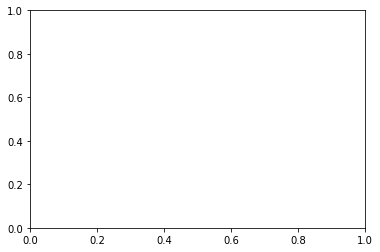

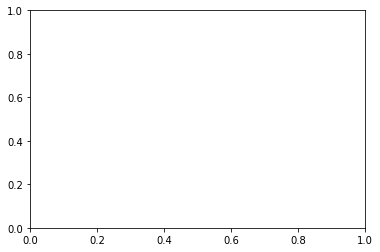

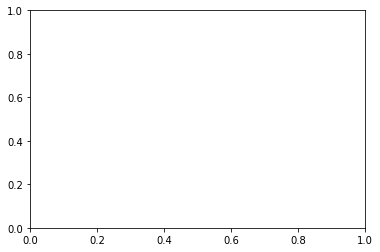

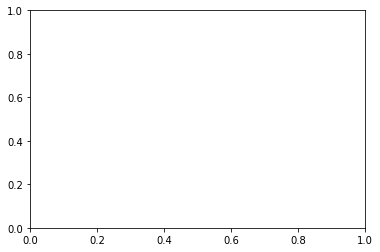

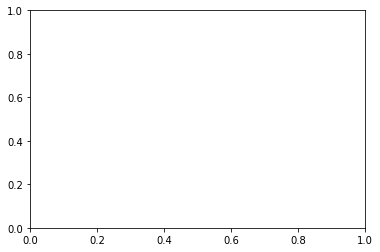

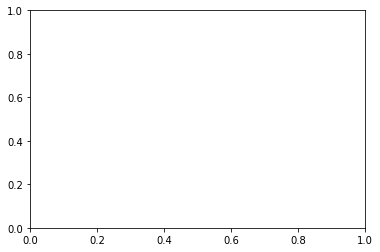

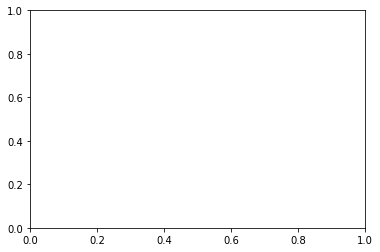

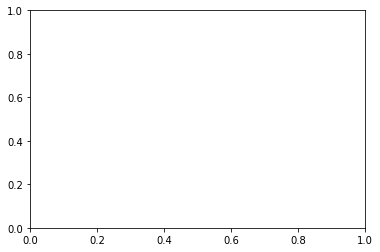

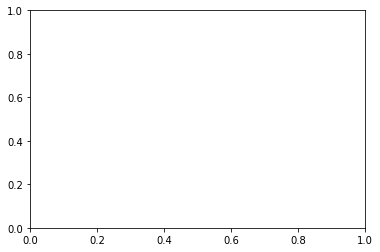

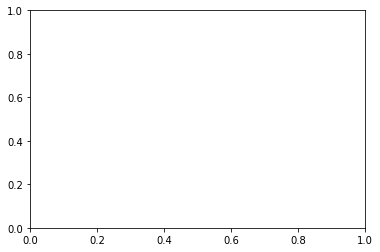

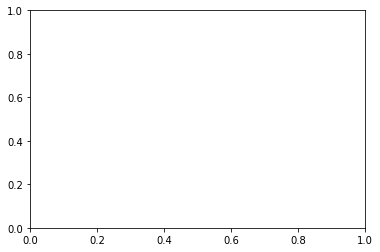

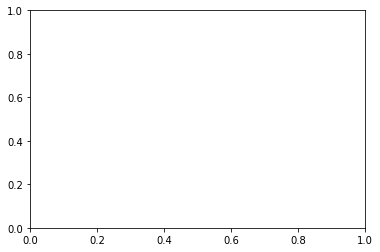

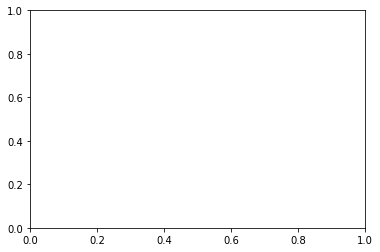

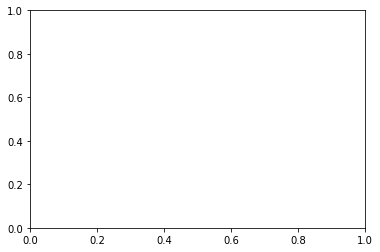

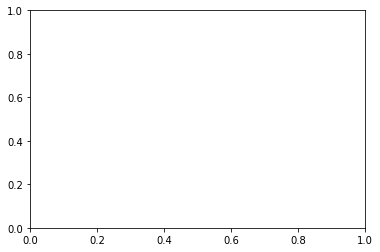

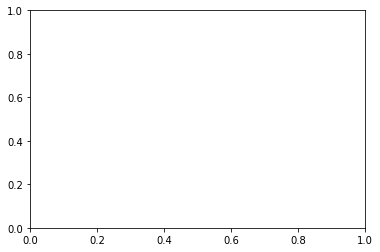

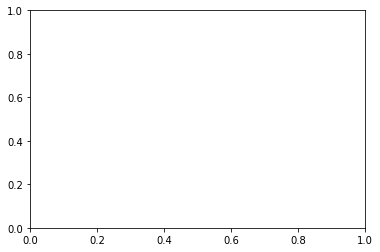

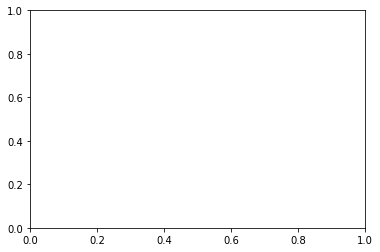

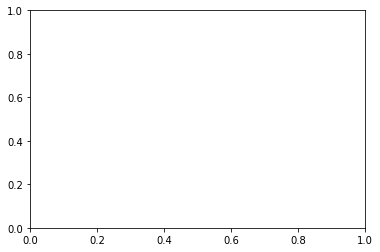

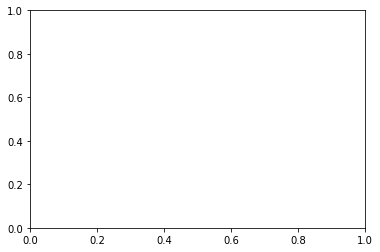

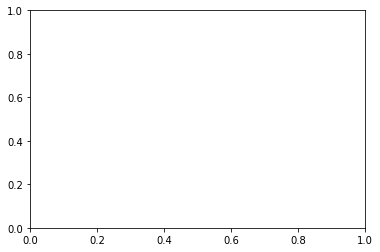

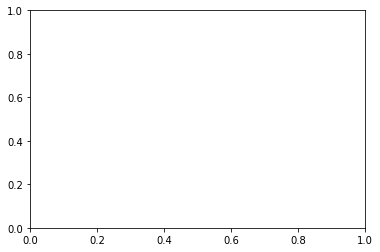

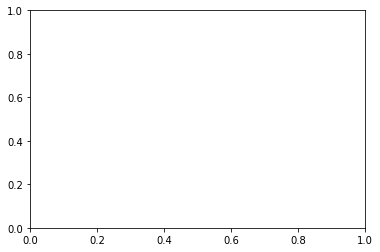

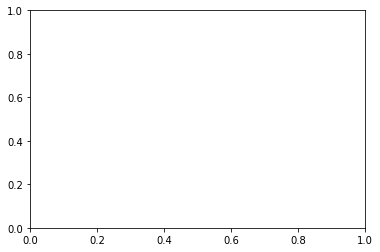

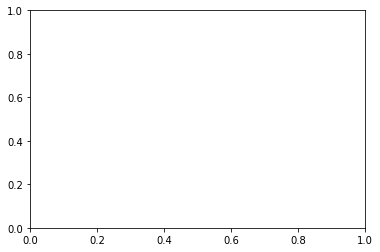

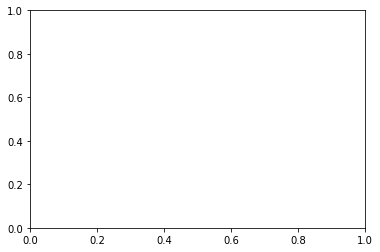

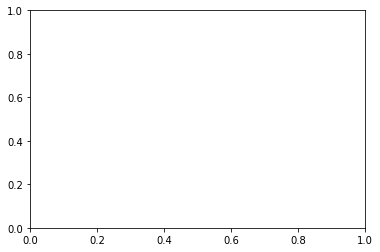

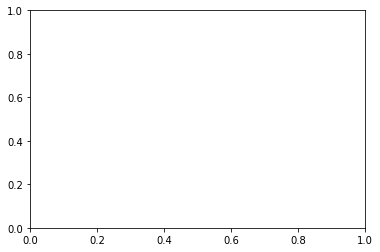

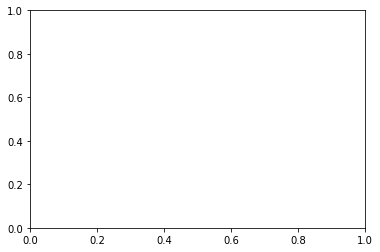

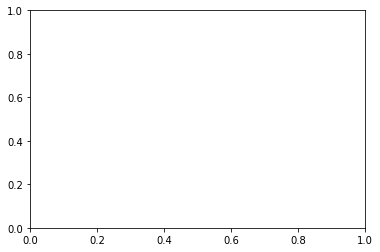

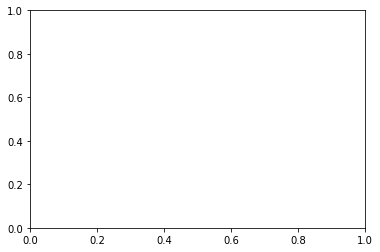

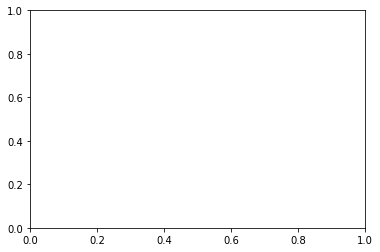

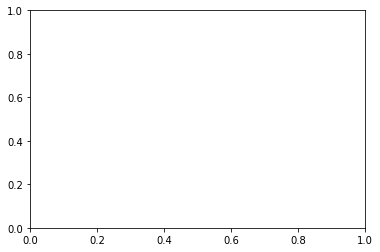

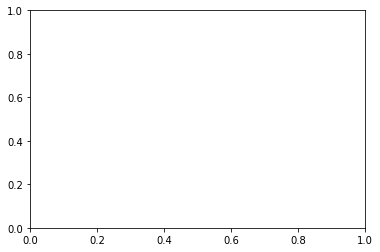

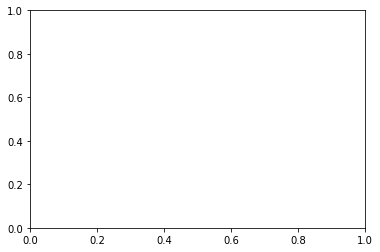

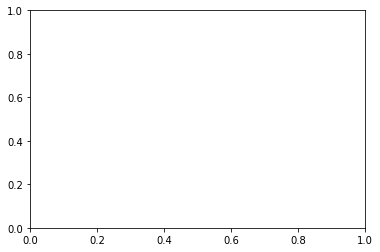

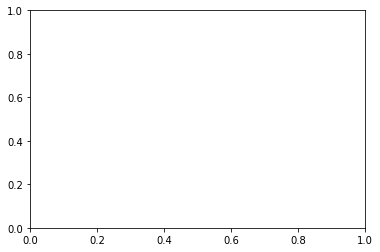

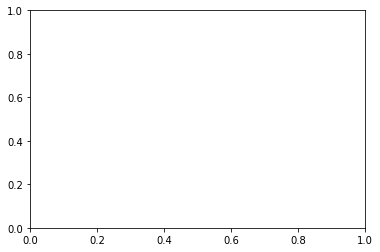

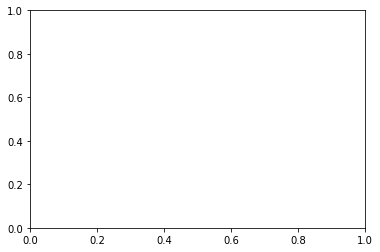

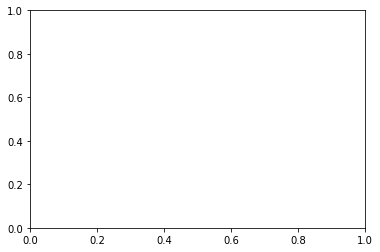

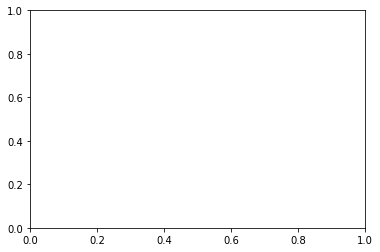

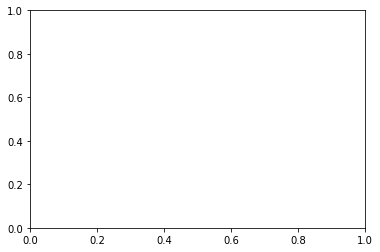

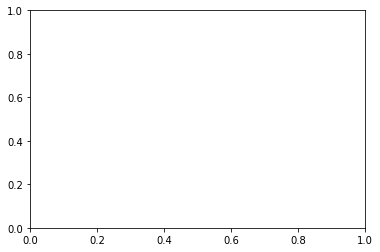

In [ ]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1
x = np.linspace(0, 1, 100)
for i in range(0,300):
    for j in range(1,4):
        fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs=[ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        print(win_index)
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                init_alpha_1 += 1

            else :
                init_beta_1 += 1

        if j == 1 :
            if samples.iloc[i,j] == 1:
                init_alpha_2 += 1

            else :
                init_beta_2 += 1

            
        if j == 2 :
            if samples.iloc[i,j] == 1:
                init_alpha_3 += 1

            else :
                init_beta_3 += 1

        
        if j == 3 :
            if samples.iloc[i,j] == 1:
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

                
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

In [13]:
Series.sort_values(samples.iloc[:100, 0:4].sum()/200, ascending=False)

Ads2    0.075
Ads4    0.065
Ads1    0.040
Ads3    0.035
dtype: float64

In [15]:
#real_ctr
Series.sort_values(samples.iloc[100:200, 0:4].sum()/100, ascending=False)


Ads2    0.18
Ads1    0.17
Ads4    0.08
Ads3    0.06
dtype: float64

### 실험결과
초기에 가중치가 작은 광고는 나중에도 선택이 잘 안되는 경우가 일부 발생함.
- 이럴 경우를 방지하기 위해 기준을 갖고(일 단위, 또는 시간 단위)로 나눠서 CTR을 측정하고 CTR에 따라 prior를 조정해 줘야 함.(기준 시점에 CTR이 높은 광고 안은 alpha 값을 올려준다. 얼마나 올려줄지?)


### 고민 해 봐야할 문제
- traffic이 100단위 도달할 때마다 CTR계산해서 prior 정보 제공하기!?
- 100단위로 끊어서 CTR 계산하는 코드 작성
- Prior을 어떻게 줄 것인가?

Summed_CTR : 일 단위로 CTR을 계산한 것  
Calculated_CTR : 톰슨 샘플링을 통해 계산된 CTR  
- 차이가 있을까?

#### summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 노출시켜라, 
#### 광고1번은 beta prior을 늘려서 노출정도를 줄여라.

### 실험 코드

In [70]:
samples.head()

Ads1  Ads2  Ads3  Ads4  Ads5  Ads6  Ads7  Ads8  Ads9  Ads10
0     0     0     0     0     0     0     0     0     1      0
1     0     0     0     0     0     0     0     0     0      0
2     0     1     0     0     0     0     0     1     0      0
3     0     0     0     0     0     0     0     0     0      0
4     1     1     0     0     0     0     0     0     0      0

In [69]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

x = np.linspace(0, 1, 100)
for i in range(0,201):  
#     if i != 0 :
#         pass
#     else :
#         continue

    if (i % 100 == 0) & (i != 0) :

        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('CTR_of_ads :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - Calculated_Ctr :',
              samples.iloc[:i-cnt,0].sum()/100 -success_1/100,
              samples.iloc[:i-cnt,1].sum()/100 - success_2/100, 
              samples.iloc[:i-cnt,2].sum()/100 - success_3/100, 
              samples.iloc[:i-cnt,3].sum()/100 - success_4/100)
        cnt = i
        success_1 = success_2 = success_3 = success_4 = 0

    for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)
        
        if win_index == 0 :
            if samples.iloc[i,j] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1
                
        

#         if j == 1 :
#             if samples.iloc[i,j] == 1:
#                 success_2 += 1
#                 init_alpha_2 += 1

#             else :
#                 init_beta_2 += 1

            
#         if j == 2 :
#             if samples.iloc[i,j] == 1:
#                 success_3 += 1
#                 init_alpha_3 += 1

#             else :
#                 init_beta_3 += 1

        
#         if j == 3 :
#             if samples.iloc[i,j] == 1:
#                 success_4 += 1
#                 init_alpha_4 += 1

#             else :
#                 init_beta_4 += 1

        
        print('Checking Zeros',success_1, success_2, success_3, success_4)
#         print(success_1/100, success_2/100, success_3/100, success_4/100)

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 1 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 0
Checking Zeros 0 2 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 0 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 1
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Zeros 0 3 1 2
Checking Ze

Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
Checking Zeros 1 18 6 8
CTR_of_ads : 0.01 0.18 0.06 0.08
Summed_Ctr - Calculated_Ctr : 0.07 -0.03 0.010000000000000009 0.05
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0
Checking Zeros 0 0 0 0


In [ ]:
#0.11 0.07 0.07 0.13
samples.iloc[:100, 0:4].sum()/100
# 이럴 경우에는 summed_ctr - calculated_ctr을 해서 차이만큼 광고2번을 차이만큼의 prior을 적용해서 좀 더 보여줘...광고1번은 좀 prior을 이용해서 줄여줘

In [46]:
#0.01 0.18 0.06 0.08
samples.iloc[100:200, 0:4].sum()/100

Ads1    0.17
Ads2    0.18
Ads3    0.06
Ads4    0.08
dtype: float64

### 코드 수정

In [169]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

# x = np.linspace(0, 1, 100)
for i in range(0,201):  
##     if i != 0 :
##         pass
##     else :
##         continue
    
    ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
    ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
    ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
    ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
    ads_rvs = [ads_1, ads_2, ads_3, ads_4]
    max_rvs = np.max(ads_rvs)
    win_index = ads_rvs.index(max_rvs)

    print('win index?',win_index, 'i?',i)

    if win_index == 0 :
        if samples.iloc[i,win_index] == 1:
            success_1 += 1
            init_alpha_1 += 1

        else :
            init_beta_1 += 1


    if win_index == 1 :
        if samples.iloc[i,win_index] == 1:
            success_2 += 1
            init_alpha_2 += 1

        else :
            init_beta_2 += 1


    if win_index == 2 :
        if samples.iloc[i,win_index] == 1:
            success_3 += 1
            init_alpha_3 += 1

        else :
            init_beta_3 += 1


    if win_index == 3 :
        if samples.iloc[i,win_index] == 1:
            success_4 += 1
            init_alpha_4 += 1

        else :
            init_beta_4 += 1
    
    print('Click or Fail',samples.iloc[i,win_index])
    print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
#         print('Checking Zeros',success_1, success_2, success_3, success_4)
    
    
    if (i % 100 == 0) & (i != 0) :
        print('i-cnt',i-cnt)
        cnt = i
        CTR_of_1 = success_1/100
        CTR_of_2 = success_2/100
        CTR_of_3 = success_3/100
        CTR_of_4 = success_4/100
        print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                             samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
        print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
        print('Summed_Ctr - CTR_of_ads(Experiment) :',
              round(samples.iloc[abs(100-cnt):i,0].sum()/100 - CTR_of_1, 4),
              round(samples.iloc[abs(100-cnt):i,1].sum()/100 - CTR_of_2, 4), 
              round(samples.iloc[abs(100-cnt):i,2].sum()/100 - CTR_of_3, 4), 
              round(samples.iloc[abs(100-cnt):i,3].sum()/100 - CTR_of_4, 4))
 
#         print('whatisit',samples.iloc[abs(100-cnt):i,0].sum()/100, 
#               samples.iloc[abs(100-cnt):i,1].sum()/100, 
#               samples.iloc[abs(100-cnt):i,2].sum()/100, 
#               samples.iloc[abs(100-cnt):i,3].sum()/100)
        success_1 = success_2 = success_3 = success_4 = 0

#summed에서의 최대 CTR나오는 광고안의 index
lsts = [samples.iloc[abs(100-cnt):i,0].sum()/100, 
          samples.iloc[abs(100-cnt):i,1].sum()/100,
          samples.iloc[abs(100-cnt):i,2].sum()/100, 
          samples.iloc[abs(100-cnt):i,3].sum()/100]
summed_max_ctr = np.max(lsts)
summed_max_ctr_idx = lsts.index(summed_max_ctr)
summed_max_ctr_idx    

#experiment에서의 최대 CTR나오는 광고안의 index
exp_lsts = [CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4]
exp_max_ctr = np.max([CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4])

exp_max_ctr_idx = exp_lsts.index(exp_max_ctr)
exp_max_ctr_idx


if summed_max_ctr_idx == exp_max_ctr_idx :
    print('CORRECT!!!')
else :
    print('WRONG')



#     for j in range(1,4):
#         fig, ax = plt.subplots(1,  1)
        

#     if i != 0 :
#         pass
#     else :
#         continue
#     if i % 100 == 0 :
#         CTR_of_1 = success_1/100
#         CTR_of_2 = success_2/100
#         CTR_of_3 = success_3/100
#         CTR_of_4 = success_4/100
#         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
#         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
# ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
# ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
# ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
# ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')
        

win index? 1 i? 0
Click or Fail 0
1 1 1 1
win index? 0 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 3 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 1 i? 7
Click or Fail 0
1 2 1 1
win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 2 i? 9
Click or Fail 0
1 2 2 1
win index? 2 i? 10
Click or Fail 0
1 2 2 1
win index? 2 i? 11
Click or Fail 0
1 2 2 1
win index? 2 i? 12
Click or Fail 0
1 2 2 1
win index? 3 i? 13
Click or Fail 0
1 2 2 1
win index? 3 i? 14
Click or Fail 0
1 2 2 1
win index? 0 i? 15
Click or Fail 0
1 2 2 1
win index? 3 i? 16
Click or Fail 0
1 2 2 1
win index? 3 i? 17
Click or Fail 0
1 2 2 1
win index? 1 i? 18
Click or Fail 0
1 2 2 1
win index? 1 i? 19
Click or Fail 1
1 3 2 1
win index? 1 i? 20
Click or Fail 0
1 3 2 1
win index? 2 i? 21
Click or Fail 0
1 3 2 1
win index? 2 i? 22
Click or Fail 0
1 3 2 1
win index? 0 i? 23
Cl

In [174]:
samples.iloc[:100, :4].sum()/100

Ads1    0.08
Ads2    0.15
Ads3    0.07
Ads4    0.13
dtype: float64

In [173]:
samples.iloc[100:200, :4].sum()/100

Ads1    0.08
Ads2    0.15
Ads3    0.07
Ads4    0.13
dtype: float64

### 데이터를 확인해보니 광고가 동시에 노출되는 경우가 있는 것으로 보임
- 일단 무시하고 진행? (그럼 summed_ctr과 experiment_ctr의 범위가 달라지지 않나?)
- 그냥 success count를 2로 줘볼까?
- CTR값의 차이를 통한 가중치의 조정?  
    - -CTR값이 나오면 Experiment CTR이 훨씬 높은 것이므로, beta를 조금 추가해준다. +CTR이 나오면 Summed_CTR, 즉 모수와 비슷한 CTR에 못미치는 것이므로 alpha를 추가해준다.

## Thompson Sampling Accuracy Experiment -01
> 실제 CTR으로 최고의 광고 대안과 Thompson Sampling으로 찾은 최고의 광고 대안이 일치하는 지 알아보는 실험(정말 잘 찾을까?)
___


In [171]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

exp_success_cnt = 0
exp_cnt = 100

for k in range(0,exp_cnt):
    # x = np.linspace(0, 1, 100)
    for i in range(0,201):  
    ##     if i != 0 :
    ##         pass
    ##     else :
    ##         continue

        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)

        print('win index?',win_index, 'i?',i)

        if win_index == 0 :
            if samples.iloc[i,win_index] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1


        if win_index == 1 :
            if samples.iloc[i,win_index] == 1:
                success_2 += 1
                init_alpha_2 += 1

            else :
                init_beta_2 += 1


        if win_index == 2 :
            if samples.iloc[i,win_index] == 1:
                success_3 += 1
                init_alpha_3 += 1

            else :
                init_beta_3 += 1


        if win_index == 3 :
            if samples.iloc[i,win_index] == 1:
                success_4 += 1
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

        print('Click or Fail',samples.iloc[i,win_index])
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
    #         print('Checking Zeros',success_1, success_2, success_3, success_4)


        if (i % 100 == 0) & (i != 0) :
            print('i-cnt',i-cnt)
            cnt = i
            CTR_of_1 = success_1/100
            CTR_of_2 = success_2/100
            CTR_of_3 = success_3/100
            CTR_of_4 = success_4/100
            print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                                 samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
            print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
            print('Summed_Ctr - CTR_of_ads(Experiment) :',
                  round(samples.iloc[abs(100-cnt):i,0].sum()/100 - CTR_of_1, 4),
                  round(samples.iloc[abs(100-cnt):i,1].sum()/100 - CTR_of_2, 4), 
                  round(samples.iloc[abs(100-cnt):i,2].sum()/100 - CTR_of_3, 4), 
                  round(samples.iloc[abs(100-cnt):i,3].sum()/100 - CTR_of_4, 4))

    #         print('whatisit',samples.iloc[abs(100-cnt):i,0].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,1].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,2].sum()/100, 
    #               samples.iloc[abs(100-cnt):i,3].sum()/100)
            success_1 = success_2 = success_3 = success_4 = 0

    #summed에서의 최대 CTR나오는 광고안의 index
    lsts = [samples.iloc[abs(100-cnt):i,0].sum()/100, 
              samples.iloc[abs(100-cnt):i,1].sum()/100,
              samples.iloc[abs(100-cnt):i,2].sum()/100, 
              samples.iloc[abs(100-cnt):i,3].sum()/100]
    summed_max_ctr = np.max(lsts)
    summed_max_ctr_idx = lsts.index(summed_max_ctr)
    summed_max_ctr_idx    

    #experiment에서의 최대 CTR나오는 광고안의 index
    exp_lsts = [CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4]
    exp_max_ctr = np.max([CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4])

    exp_max_ctr_idx = exp_lsts.index(exp_max_ctr)
    exp_max_ctr_idx


    if summed_max_ctr_idx == exp_max_ctr_idx :
        print('CORRECT!!!')
        exp_success_cnt += 1
    else :
        print('WRONG')

print('Accuracy of Thompson Sampling :',exp_success_cnt/exp_cnt)


    #     for j in range(1,4):
    #         fig, ax = plt.subplots(1,  1)


    #     if i != 0 :
    #         pass
    #     else :
    #         continue
    #     if i % 100 == 0 :
    #         CTR_of_1 = success_1/100
    #         CTR_of_2 = success_2/100
    #         CTR_of_3 = success_3/100
    #         CTR_of_4 = success_4/100
    #         print(CTR_of_1, CTR_of_3, CTR_of_3, CTR_of_4)
    #         print('i:',i, 'inits',init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)
    # ax.plot(x, beta.pdf(x, init_alpha_1, init_beta_1), 'r-', lw=3, alpha=0.5, label='ads_1')
    # ax.plot(x, beta.pdf(x, init_alpha_2, init_beta_2), 'g-', lw=3, alpha=0.5, label='ads_2')
    # ax.plot(x, beta.pdf(x, init_alpha_3, init_beta_3), 'b-', lw=3, alpha=0.5, label='ads_3')
    # ax.plot(x, beta.pdf(x, init_alpha_4, init_beta_4), 'y-', lw=3, alpha=0.5, label='ads_4')


win index? 3 i? 0
Click or Fail 0
1 1 1 1
win index? 2 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 0 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 1 i? 7
Click or Fail 0
1 2 1 1
win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 3 i? 9
Click or Fail 0
1 2 2 1
win index? 1 i? 10
Click or Fail 0
1 2 2 1
win index? 0 i? 11
Click or Fail 0
1 2 2 1
win index? 0 i? 12
Click or Fail 0
1 2 2 1
win index? 2 i? 13
Click or Fail 0
1 2 2 1
win index? 1 i? 14
Click or Fail 0
1 2 2 1
win index? 2 i? 15
Click or Fail 0
1 2 2 1
win index? 2 i? 16
Click or Fail 0
1 2 2 1
win index? 3 i? 17
Click or Fail 0
1 2 2 1
win index? 1 i? 18
Click or Fail 0
1 2 2 1
win index? 0 i? 19
Click or Fail 0
1 2 2 1
win index? 2 i? 20
Click or Fail 0
1 2 2 1
win index? 1 i? 21
Click or Fail 0
1 2 2 1
win index? 3 i? 22
Click or Fail 0
1 2 2 1
win index? 2 i? 23
Cl

win index? 1 i? 137
Click or Fail 0
1 39 5 1
win index? 1 i? 138
Click or Fail 0
1 39 5 1
win index? 1 i? 139
Click or Fail 1
1 40 5 1
win index? 1 i? 140
Click or Fail 0
1 40 5 1
win index? 1 i? 141
Click or Fail 1
1 41 5 1
win index? 1 i? 142
Click or Fail 1
1 42 5 1
win index? 1 i? 143
Click or Fail 0
1 42 5 1
win index? 1 i? 144
Click or Fail 0
1 42 5 1
win index? 1 i? 145
Click or Fail 0
1 42 5 1
win index? 1 i? 146
Click or Fail 0
1 42 5 1
win index? 1 i? 147
Click or Fail 0
1 42 5 1
win index? 1 i? 148
Click or Fail 1
1 43 5 1
win index? 1 i? 149
Click or Fail 0
1 43 5 1
win index? 1 i? 150
Click or Fail 1
1 44 5 1
win index? 1 i? 151
Click or Fail 0
1 44 5 1
win index? 1 i? 152
Click or Fail 0
1 44 5 1
win index? 1 i? 153
Click or Fail 1
1 45 5 1
win index? 1 i? 154
Click or Fail 1
1 46 5 1
win index? 2 i? 155
Click or Fail 0
1 46 5 1
win index? 1 i? 156
Click or Fail 0
1 46 5 1
win index? 1 i? 157
Click or Fail 0
1 46 5 1
win index? 1 i? 158
Click or Fail 0
1 46 5 1
win index?

1 67 5 1
win index? 1 i? 117
Click or Fail 1
1 68 5 1
win index? 1 i? 118
Click or Fail 1
1 69 5 1
win index? 1 i? 119
Click or Fail 0
1 69 5 1
win index? 1 i? 120
Click or Fail 1
1 70 5 1
win index? 2 i? 121
Click or Fail 0
1 70 5 1
win index? 1 i? 122
Click or Fail 0
1 70 5 1
win index? 1 i? 123
Click or Fail 0
1 70 5 1
win index? 1 i? 124
Click or Fail 0
1 70 5 1
win index? 1 i? 125
Click or Fail 0
1 70 5 1
win index? 1 i? 126
Click or Fail 0
1 70 5 1
win index? 1 i? 127
Click or Fail 0
1 70 5 1
win index? 1 i? 128
Click or Fail 0
1 70 5 1
win index? 1 i? 129
Click or Fail 0
1 70 5 1
win index? 1 i? 130
Click or Fail 1
1 71 5 1
win index? 1 i? 131
Click or Fail 0
1 71 5 1
win index? 1 i? 132
Click or Fail 0
1 71 5 1
win index? 1 i? 133
Click or Fail 0
1 71 5 1
win index? 1 i? 134
Click or Fail 0
1 71 5 1
win index? 1 i? 135
Click or Fail 0
1 71 5 1
win index? 1 i? 136
Click or Fail 0
1 71 5 1
win index? 1 i? 137
Click or Fail 0
1 71 5 1
win index? 0 i? 138
Click or Fail 0
1 71 5 1
w

win index? 1 i? 19
Click or Fail 1
1 116 5 3
win index? 1 i? 20
Click or Fail 0
1 116 5 3
win index? 1 i? 21
Click or Fail 0
1 116 5 3
win index? 1 i? 22
Click or Fail 0
1 116 5 3
win index? 1 i? 23
Click or Fail 0
1 116 5 3
win index? 3 i? 24
Click or Fail 0
1 116 5 3
win index? 1 i? 25
Click or Fail 1
1 117 5 3
win index? 1 i? 26
Click or Fail 1
1 118 5 3
win index? 1 i? 27
Click or Fail 0
1 118 5 3
win index? 1 i? 28
Click or Fail 0
1 118 5 3
win index? 1 i? 29
Click or Fail 0
1 118 5 3
win index? 1 i? 30
Click or Fail 0
1 118 5 3
win index? 1 i? 31
Click or Fail 0
1 118 5 3
win index? 1 i? 32
Click or Fail 0
1 118 5 3
win index? 1 i? 33
Click or Fail 0
1 118 5 3
win index? 1 i? 34
Click or Fail 0
1 118 5 3
win index? 1 i? 35
Click or Fail 0
1 118 5 3
win index? 1 i? 36
Click or Fail 0
1 118 5 3
win index? 1 i? 37
Click or Fail 0
1 118 5 3
win index? 1 i? 38
Click or Fail 0
1 118 5 3
win index? 1 i? 39
Click or Fail 0
1 118 5 3
win index? 1 i? 40
Click or Fail 0
1 118 5 3
win index?

win index? 1 i? 148
Click or Fail 1
1 171 5 3
win index? 1 i? 149
Click or Fail 0
1 171 5 3
win index? 1 i? 150
Click or Fail 1
1 172 5 3
win index? 1 i? 151
Click or Fail 0
1 172 5 3
win index? 1 i? 152
Click or Fail 0
1 172 5 3
win index? 1 i? 153
Click or Fail 1
1 173 5 3
win index? 1 i? 154
Click or Fail 1
1 174 5 3
win index? 1 i? 155
Click or Fail 0
1 174 5 3
win index? 1 i? 156
Click or Fail 0
1 174 5 3
win index? 1 i? 157
Click or Fail 0
1 174 5 3
win index? 1 i? 158
Click or Fail 0
1 174 5 3
win index? 1 i? 159
Click or Fail 0
1 174 5 3
win index? 1 i? 160
Click or Fail 0
1 174 5 3
win index? 1 i? 161
Click or Fail 0
1 174 5 3
win index? 1 i? 162
Click or Fail 0
1 174 5 3
win index? 1 i? 163
Click or Fail 0
1 174 5 3
win index? 0 i? 164
Click or Fail 0
1 174 5 3
win index? 1 i? 165
Click or Fail 0
1 174 5 3
win index? 1 i? 166
Click or Fail 0
1 174 5 3
win index? 1 i? 167
Click or Fail 0
1 174 5 3
win index? 1 i? 168
Click or Fail 0
1 174 5 3
win index? 1 i? 169
Click or Fail 

win index? 1 i? 125
Click or Fail 0
1 197 5 3
win index? 1 i? 126
Click or Fail 0
1 197 5 3
win index? 1 i? 127
Click or Fail 0
1 197 5 3
win index? 1 i? 128
Click or Fail 0
1 197 5 3
win index? 1 i? 129
Click or Fail 0
1 197 5 3
win index? 1 i? 130
Click or Fail 1
1 198 5 3
win index? 1 i? 131
Click or Fail 0
1 198 5 3
win index? 1 i? 132
Click or Fail 0
1 198 5 3
win index? 1 i? 133
Click or Fail 0
1 198 5 3
win index? 1 i? 134
Click or Fail 0
1 198 5 3
win index? 1 i? 135
Click or Fail 0
1 198 5 3
win index? 1 i? 136
Click or Fail 0
1 198 5 3
win index? 1 i? 137
Click or Fail 0
1 198 5 3
win index? 1 i? 138
Click or Fail 0
1 198 5 3
win index? 1 i? 139
Click or Fail 1
1 199 5 3
win index? 1 i? 140
Click or Fail 0
1 199 5 3
win index? 1 i? 141
Click or Fail 1
1 200 5 3
win index? 1 i? 142
Click or Fail 1
1 201 5 3
win index? 1 i? 143
Click or Fail 0
1 201 5 3
win index? 1 i? 144
Click or Fail 0
1 201 5 3
win index? 1 i? 145
Click or Fail 0
1 201 5 3
win index? 1 i? 146
Click or Fail 

win index? 1 i? 114
Click or Fail 0
1 225 5 4
win index? 1 i? 115
Click or Fail 0
1 225 5 4
win index? 1 i? 116
Click or Fail 0
1 225 5 4
win index? 1 i? 117
Click or Fail 1
1 226 5 4
win index? 1 i? 118
Click or Fail 1
1 227 5 4
win index? 1 i? 119
Click or Fail 0
1 227 5 4
win index? 1 i? 120
Click or Fail 1
1 228 5 4
win index? 1 i? 121
Click or Fail 0
1 228 5 4
win index? 1 i? 122
Click or Fail 0
1 228 5 4
win index? 1 i? 123
Click or Fail 0
1 228 5 4
win index? 1 i? 124
Click or Fail 0
1 228 5 4
win index? 1 i? 125
Click or Fail 0
1 228 5 4
win index? 1 i? 126
Click or Fail 0
1 228 5 4
win index? 1 i? 127
Click or Fail 0
1 228 5 4
win index? 1 i? 128
Click or Fail 0
1 228 5 4
win index? 1 i? 129
Click or Fail 0
1 228 5 4
win index? 1 i? 130
Click or Fail 1
1 229 5 4
win index? 1 i? 131
Click or Fail 0
1 229 5 4
win index? 1 i? 132
Click or Fail 0
1 229 5 4
win index? 1 i? 133
Click or Fail 0
1 229 5 4
win index? 1 i? 134
Click or Fail 0
1 229 5 4
win index? 1 i? 135
Click or Fail 

win index? 3 i? 100
Click or Fail 0
1 253 5 5
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
1 253 5 5
win index? 1 i? 102
Click or Fail 0
1 253 5 5
win index? 1 i? 103
Click or Fail 1
1 254 5 5
win index? 1 i? 104
Click or Fail 1
1 255 5 5
win index? 1 i? 105
Click or Fail 0
1 255 5 5
win index? 1 i? 106
Click or Fail 0
1 255 5 5
win index? 1 i? 107
Click or Fail 0
1 255 5 5
win index? 1 i? 108
Click or Fail 0
1 255 5 5
win index? 1 i? 109
Click or Fail 1
1 256 5 5
win index? 1 i? 110
Click or Fail 1
1 257 5 5
win index? 3 i? 111
Click or Fail 0
1 257 5 5
win index? 1 i? 112
Click or Fail 0
1 257 5 5
win index? 1 i? 113
Click or Fail 0
1 257 5 5
win index? 1 i? 114
Click or Fail 0
1 257 5 5
win index? 1 i? 115
Click or Fail 0
1 257 5 5
win index? 1 i? 116
Click or Fail 0
1 257 5 5
win index? 1 i? 117
Click or Fail 1
1 258 5 5
win index? 1 i? 118
Click or 

win index? 1 i? 86
Click or Fail 0
1 284 5 5
win index? 1 i? 87
Click or Fail 0
1 284 5 5
win index? 1 i? 88
Click or Fail 0
1 284 5 5
win index? 1 i? 89
Click or Fail 0
1 284 5 5
win index? 1 i? 90
Click or Fail 0
1 284 5 5
win index? 1 i? 91
Click or Fail 0
1 284 5 5
win index? 1 i? 92
Click or Fail 0
1 284 5 5
win index? 1 i? 93
Click or Fail 0
1 284 5 5
win index? 1 i? 94
Click or Fail 0
1 284 5 5
win index? 1 i? 95
Click or Fail 1
1 285 5 5
win index? 1 i? 96
Click or Fail 0
1 285 5 5
win index? 1 i? 97
Click or Fail 0
1 285 5 5
win index? 1 i? 98
Click or Fail 0
1 285 5 5
win index? 1 i? 99
Click or Fail 0
1 285 5 5
win index? 1 i? 100
Click or Fail 0
1 285 5 5
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index? 1 i? 101
Click or Fail 0
1 285 5 5
win index? 1 i? 102
Click or Fail 0
1 285 5 5
win index? 1 i? 103
Click or Fail 1
1 286 5 5
win index? 1 i? 104
Click or Fail 1
1 287 

win index? 1 i? 70
Click or Fail 0
1 313 5 5
win index? 1 i? 71
Click or Fail 1
1 314 5 5
win index? 1 i? 72
Click or Fail 0
1 314 5 5
win index? 1 i? 73
Click or Fail 0
1 314 5 5
win index? 1 i? 74
Click or Fail 0
1 314 5 5
win index? 1 i? 75
Click or Fail 0
1 314 5 5
win index? 1 i? 76
Click or Fail 0
1 314 5 5
win index? 1 i? 77
Click or Fail 1
1 315 5 5
win index? 1 i? 78
Click or Fail 0
1 315 5 5
win index? 1 i? 79
Click or Fail 0
1 315 5 5
win index? 1 i? 80
Click or Fail 0
1 315 5 5
win index? 1 i? 81
Click or Fail 0
1 315 5 5
win index? 1 i? 82
Click or Fail 1
1 316 5 5
win index? 1 i? 83
Click or Fail 0
1 316 5 5
win index? 1 i? 84
Click or Fail 1
1 317 5 5
win index? 1 i? 85
Click or Fail 0
1 317 5 5
win index? 1 i? 86
Click or Fail 0
1 317 5 5
win index? 1 i? 87
Click or Fail 0
1 317 5 5
win index? 1 i? 88
Click or Fail 0
1 317 5 5
win index? 1 i? 89
Click or Fail 0
1 317 5 5
win index? 1 i? 90
Click or Fail 0
1 317 5 5
win index? 1 i? 91
Click or Fail 0
1 317 5 5
win index?

win index? 1 i? 55
Click or Fail 0
1 343 5 6
win index? 1 i? 56
Click or Fail 0
1 343 5 6
win index? 1 i? 57
Click or Fail 0
1 343 5 6
win index? 1 i? 58
Click or Fail 1
1 344 5 6
win index? 1 i? 59
Click or Fail 0
1 344 5 6
win index? 1 i? 60
Click or Fail 0
1 344 5 6
win index? 1 i? 61
Click or Fail 0
1 344 5 6
win index? 1 i? 62
Click or Fail 0
1 344 5 6
win index? 1 i? 63
Click or Fail 0
1 344 5 6
win index? 1 i? 64
Click or Fail 0
1 344 5 6
win index? 1 i? 65
Click or Fail 0
1 344 5 6
win index? 1 i? 66
Click or Fail 1
1 345 5 6
win index? 1 i? 67
Click or Fail 0
1 345 5 6
win index? 1 i? 68
Click or Fail 0
1 345 5 6
win index? 1 i? 69
Click or Fail 0
1 345 5 6
win index? 1 i? 70
Click or Fail 0
1 345 5 6
win index? 1 i? 71
Click or Fail 1
1 346 5 6
win index? 1 i? 72
Click or Fail 0
1 346 5 6
win index? 1 i? 73
Click or Fail 0
1 346 5 6
win index? 1 i? 74
Click or Fail 0
1 346 5 6
win index? 1 i? 75
Click or Fail 0
1 346 5 6
win index? 1 i? 76
Click or Fail 0
1 346 5 6
win index?

win index? 1 i? 40
Click or Fail 0
1 374 5 6
win index? 1 i? 41
Click or Fail 0
1 374 5 6
win index? 1 i? 42
Click or Fail 0
1 374 5 6
win index? 1 i? 43
Click or Fail 0
1 374 5 6
win index? 1 i? 44
Click or Fail 0
1 374 5 6
win index? 1 i? 45
Click or Fail 0
1 374 5 6
win index? 1 i? 46
Click or Fail 0
1 374 5 6
win index? 1 i? 47
Click or Fail 1
1 375 5 6
win index? 1 i? 48
Click or Fail 0
1 375 5 6
win index? 1 i? 49
Click or Fail 0
1 375 5 6
win index? 1 i? 50
Click or Fail 0
1 375 5 6
win index? 1 i? 51
Click or Fail 0
1 375 5 6
win index? 1 i? 52
Click or Fail 0
1 375 5 6
win index? 1 i? 53
Click or Fail 0
1 375 5 6
win index? 1 i? 54
Click or Fail 1
1 376 5 6
win index? 1 i? 55
Click or Fail 0
1 376 5 6
win index? 1 i? 56
Click or Fail 0
1 376 5 6
win index? 1 i? 57
Click or Fail 0
1 376 5 6
win index? 2 i? 58
Click or Fail 0
1 376 5 6
win index? 1 i? 59
Click or Fail 0
1 376 5 6
win index? 1 i? 60
Click or Fail 0
1 376 5 6
win index? 1 i? 61
Click or Fail 0
1 376 5 6
win index?

win index? 1 i? 20
Click or Fail 0
1 404 5 6
win index? 1 i? 21
Click or Fail 0
1 404 5 6
win index? 1 i? 22
Click or Fail 0
1 404 5 6
win index? 1 i? 23
Click or Fail 0
1 404 5 6
win index? 1 i? 24
Click or Fail 0
1 404 5 6
win index? 1 i? 25
Click or Fail 1
1 405 5 6
win index? 1 i? 26
Click or Fail 1
1 406 5 6
win index? 1 i? 27
Click or Fail 0
1 406 5 6
win index? 1 i? 28
Click or Fail 0
1 406 5 6
win index? 1 i? 29
Click or Fail 0
1 406 5 6
win index? 1 i? 30
Click or Fail 0
1 406 5 6
win index? 1 i? 31
Click or Fail 0
1 406 5 6
win index? 1 i? 32
Click or Fail 0
1 406 5 6
win index? 1 i? 33
Click or Fail 0
1 406 5 6
win index? 1 i? 34
Click or Fail 0
1 406 5 6
win index? 1 i? 35
Click or Fail 0
1 406 5 6
win index? 1 i? 36
Click or Fail 0
1 406 5 6
win index? 1 i? 37
Click or Fail 0
1 406 5 6
win index? 1 i? 38
Click or Fail 0
1 406 5 6
win index? 1 i? 39
Click or Fail 0
1 406 5 6
win index? 1 i? 40
Click or Fail 0
1 406 5 6
win index? 1 i? 41
Click or Fail 0
1 406 5 6
win index?

win index? 1 i? 133
Click or Fail 0
1 456 5 6
win index? 1 i? 134
Click or Fail 0
1 456 5 6
win index? 1 i? 135
Click or Fail 0
1 456 5 6
win index? 1 i? 136
Click or Fail 0
1 456 5 6
win index? 1 i? 137
Click or Fail 0
1 456 5 6
win index? 1 i? 138
Click or Fail 0
1 456 5 6
win index? 1 i? 139
Click or Fail 1
1 457 5 6
win index? 1 i? 140
Click or Fail 0
1 457 5 6
win index? 3 i? 141
Click or Fail 0
1 457 5 6
win index? 1 i? 142
Click or Fail 1
1 458 5 6
win index? 1 i? 143
Click or Fail 0
1 458 5 6
win index? 1 i? 144
Click or Fail 0
1 458 5 6
win index? 1 i? 145
Click or Fail 0
1 458 5 6
win index? 1 i? 146
Click or Fail 0
1 458 5 6
win index? 1 i? 147
Click or Fail 0
1 458 5 6
win index? 1 i? 148
Click or Fail 1
1 459 5 6
win index? 1 i? 149
Click or Fail 0
1 459 5 6
win index? 1 i? 150
Click or Fail 1
1 460 5 6
win index? 3 i? 151
Click or Fail 0
1 460 5 6
win index? 1 i? 152
Click or Fail 0
1 460 5 6
win index? 1 i? 153
Click or Fail 1
1 461 5 6
win index? 1 i? 154
Click or Fail 

win index? 1 i? 115
Click or Fail 0
1 483 5 6
win index? 1 i? 116
Click or Fail 0
1 483 5 6
win index? 1 i? 117
Click or Fail 1
1 484 5 6
win index? 1 i? 118
Click or Fail 1
1 485 5 6
win index? 1 i? 119
Click or Fail 0
1 485 5 6
win index? 1 i? 120
Click or Fail 1
1 486 5 6
win index? 1 i? 121
Click or Fail 0
1 486 5 6
win index? 1 i? 122
Click or Fail 0
1 486 5 6
win index? 1 i? 123
Click or Fail 0
1 486 5 6
win index? 1 i? 124
Click or Fail 0
1 486 5 6
win index? 1 i? 125
Click or Fail 0
1 486 5 6
win index? 1 i? 126
Click or Fail 0
1 486 5 6
win index? 1 i? 127
Click or Fail 0
1 486 5 6
win index? 1 i? 128
Click or Fail 0
1 486 5 6
win index? 1 i? 129
Click or Fail 0
1 486 5 6
win index? 1 i? 130
Click or Fail 1
1 487 5 6
win index? 1 i? 131
Click or Fail 0
1 487 5 6
win index? 1 i? 132
Click or Fail 0
1 487 5 6
win index? 1 i? 133
Click or Fail 0
1 487 5 6
win index? 1 i? 134
Click or Fail 0
1 487 5 6
win index? 1 i? 135
Click or Fail 0
1 487 5 6
win index? 1 i? 136
Click or Fail 

win index? 1 i? 55
Click or Fail 0
1 537 5 6
win index? 1 i? 56
Click or Fail 0
1 537 5 6
win index? 1 i? 57
Click or Fail 0
1 537 5 6
win index? 1 i? 58
Click or Fail 1
1 538 5 6
win index? 1 i? 59
Click or Fail 0
1 538 5 6
win index? 1 i? 60
Click or Fail 0
1 538 5 6
win index? 1 i? 61
Click or Fail 0
1 538 5 6
win index? 1 i? 62
Click or Fail 0
1 538 5 6
win index? 1 i? 63
Click or Fail 0
1 538 5 6
win index? 1 i? 64
Click or Fail 0
1 538 5 6
win index? 1 i? 65
Click or Fail 0
1 538 5 6
win index? 1 i? 66
Click or Fail 1
1 539 5 6
win index? 1 i? 67
Click or Fail 0
1 539 5 6
win index? 1 i? 68
Click or Fail 0
1 539 5 6
win index? 1 i? 69
Click or Fail 0
1 539 5 6
win index? 1 i? 70
Click or Fail 0
1 539 5 6
win index? 0 i? 71
Click or Fail 0
1 539 5 6
win index? 1 i? 72
Click or Fail 0
1 539 5 6
win index? 1 i? 73
Click or Fail 0
1 539 5 6
win index? 1 i? 74
Click or Fail 0
1 539 5 6
win index? 1 i? 75
Click or Fail 0
1 539 5 6
win index? 1 i? 76
Click or Fail 0
1 539 5 6
win index?

win index? 1 i? 32
Click or Fail 0
1 567 5 6
win index? 1 i? 33
Click or Fail 0
1 567 5 6
win index? 1 i? 34
Click or Fail 0
1 567 5 6
win index? 1 i? 35
Click or Fail 0
1 567 5 6
win index? 1 i? 36
Click or Fail 0
1 567 5 6
win index? 1 i? 37
Click or Fail 0
1 567 5 6
win index? 1 i? 38
Click or Fail 0
1 567 5 6
win index? 1 i? 39
Click or Fail 0
1 567 5 6
win index? 1 i? 40
Click or Fail 0
1 567 5 6
win index? 1 i? 41
Click or Fail 0
1 567 5 6
win index? 1 i? 42
Click or Fail 0
1 567 5 6
win index? 1 i? 43
Click or Fail 0
1 567 5 6
win index? 1 i? 44
Click or Fail 0
1 567 5 6
win index? 1 i? 45
Click or Fail 0
1 567 5 6
win index? 1 i? 46
Click or Fail 0
1 567 5 6
win index? 1 i? 47
Click or Fail 1
1 568 5 6
win index? 1 i? 48
Click or Fail 0
1 568 5 6
win index? 1 i? 49
Click or Fail 0
1 568 5 6
win index? 1 i? 50
Click or Fail 0
1 568 5 6
win index? 1 i? 51
Click or Fail 0
1 568 5 6
win index? 1 i? 52
Click or Fail 0
1 568 5 6
win index? 1 i? 53
Click or Fail 0
1 568 5 6
win index?

win index? 1 i? 187
Click or Fail 0
3 625 5 6
win index? 1 i? 188
Click or Fail 0
3 625 5 6
win index? 1 i? 189
Click or Fail 0
3 625 5 6
win index? 1 i? 190
Click or Fail 0
3 625 5 6
win index? 1 i? 191
Click or Fail 0
3 625 5 6
win index? 1 i? 192
Click or Fail 1
3 626 5 6
win index? 1 i? 193
Click or Fail 0
3 626 5 6
win index? 1 i? 194
Click or Fail 0
3 626 5 6
win index? 1 i? 195
Click or Fail 0
3 626 5 6
win index? 1 i? 196
Click or Fail 0
3 626 5 6
win index? 1 i? 197
Click or Fail 0
3 626 5 6
win index? 1 i? 198
Click or Fail 0
3 626 5 6
win index? 1 i? 199
Click or Fail 0
3 626 5 6
win index? 1 i? 200
Click or Fail 0
3 626 5 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.17 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.01 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
3 626 5 6
win index? 1 i? 1
Click or Fail 0
3 626 5 6
win index? 1 i? 2
Click or Fail 1
3 627 5 6
win index? 1 i? 3
Click or Fail 0
3 627 5 6
win index? 1 i? 4
Click or

win index? 1 i? 170
Click or Fail 1
3 656 5 6
win index? 1 i? 171
Click or Fail 0
3 656 5 6
win index? 1 i? 172
Click or Fail 0
3 656 5 6
win index? 1 i? 173
Click or Fail 0
3 656 5 6
win index? 1 i? 174
Click or Fail 0
3 656 5 6
win index? 1 i? 175
Click or Fail 0
3 656 5 6
win index? 1 i? 176
Click or Fail 0
3 656 5 6
win index? 1 i? 177
Click or Fail 0
3 656 5 6
win index? 1 i? 178
Click or Fail 0
3 656 5 6
win index? 1 i? 179
Click or Fail 0
3 656 5 6
win index? 1 i? 180
Click or Fail 0
3 656 5 6
win index? 1 i? 181
Click or Fail 1
3 657 5 6
win index? 1 i? 182
Click or Fail 0
3 657 5 6
win index? 1 i? 183
Click or Fail 0
3 657 5 6
win index? 1 i? 184
Click or Fail 0
3 657 5 6
win index? 1 i? 185
Click or Fail 0
3 657 5 6
win index? 1 i? 186
Click or Fail 0
3 657 5 6
win index? 1 i? 187
Click or Fail 0
3 657 5 6
win index? 1 i? 188
Click or Fail 0
3 657 5 6
win index? 1 i? 189
Click or Fail 0
3 657 5 6
win index? 1 i? 190
Click or Fail 0
3 657 5 6
win index? 1 i? 191
Click or Fail 

4 711 5 6
win index? 1 i? 124
Click or Fail 0
4 711 5 6
win index? 1 i? 125
Click or Fail 0
4 711 5 6
win index? 1 i? 126
Click or Fail 0
4 711 5 6
win index? 1 i? 127
Click or Fail 0
4 711 5 6
win index? 1 i? 128
Click or Fail 0
4 711 5 6
win index? 1 i? 129
Click or Fail 0
4 711 5 6
win index? 1 i? 130
Click or Fail 1
4 712 5 6
win index? 1 i? 131
Click or Fail 0
4 712 5 6
win index? 1 i? 132
Click or Fail 0
4 712 5 6
win index? 1 i? 133
Click or Fail 0
4 712 5 6
win index? 1 i? 134
Click or Fail 0
4 712 5 6
win index? 1 i? 135
Click or Fail 0
4 712 5 6
win index? 1 i? 136
Click or Fail 0
4 712 5 6
win index? 1 i? 137
Click or Fail 0
4 712 5 6
win index? 1 i? 138
Click or Fail 0
4 712 5 6
win index? 1 i? 139
Click or Fail 1
4 713 5 6
win index? 1 i? 140
Click or Fail 0
4 713 5 6
win index? 1 i? 141
Click or Fail 1
4 714 5 6
win index? 1 i? 142
Click or Fail 1
4 715 5 6
win index? 1 i? 143
Click or Fail 0
4 715 5 6
win index? 1 i? 144
Click or Fail 0
4 715 5 6
win index? 1 i? 145
Clic

win index? 1 i? 112
Click or Fail 0
4 739 5 6
win index? 1 i? 113
Click or Fail 0
4 739 5 6
win index? 0 i? 114
Click or Fail 0
4 739 5 6
win index? 1 i? 115
Click or Fail 0
4 739 5 6
win index? 1 i? 116
Click or Fail 0
4 739 5 6
win index? 1 i? 117
Click or Fail 1
4 740 5 6
win index? 1 i? 118
Click or Fail 1
4 741 5 6
win index? 1 i? 119
Click or Fail 0
4 741 5 6
win index? 1 i? 120
Click or Fail 1
4 742 5 6
win index? 1 i? 121
Click or Fail 0
4 742 5 6
win index? 1 i? 122
Click or Fail 0
4 742 5 6
win index? 1 i? 123
Click or Fail 0
4 742 5 6
win index? 1 i? 124
Click or Fail 0
4 742 5 6
win index? 1 i? 125
Click or Fail 0
4 742 5 6
win index? 1 i? 126
Click or Fail 0
4 742 5 6
win index? 1 i? 127
Click or Fail 0
4 742 5 6
win index? 1 i? 128
Click or Fail 0
4 742 5 6
win index? 1 i? 129
Click or Fail 0
4 742 5 6
win index? 1 i? 130
Click or Fail 1
4 743 5 6
win index? 1 i? 131
Click or Fail 0
4 743 5 6
win index? 1 i? 132
Click or Fail 0
4 743 5 6
win index? 1 i? 133
Click or Fail 

Click or Fail 0
5 768 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 0 i? 101
Click or Fail 1
6 768 5 6
win index? 1 i? 102
Click or Fail 0
6 768 5 6
win index? 1 i? 103
Click or Fail 1
6 769 5 6
win index? 1 i? 104
Click or Fail 1
6 770 5 6
win index? 1 i? 105
Click or Fail 0
6 770 5 6
win index? 1 i? 106
Click or Fail 0
6 770 5 6
win index? 1 i? 107
Click or Fail 0
6 770 5 6
win index? 1 i? 108
Click or Fail 0
6 770 5 6
win index? 1 i? 109
Click or Fail 1
6 771 5 6
win index? 3 i? 110
Click or Fail 0
6 771 5 6
win index? 1 i? 111
Click or Fail 0
6 771 5 6
win index? 0 i? 112
Click or Fail 0
6 771 5 6
win index? 1 i? 113
Click or Fail 0
6 771 5 6
win index? 1 i? 114
Click or Fail 0
6 771 5 6
win index? 1 i? 115
Click or Fail 0
6 771 5 6
win index? 1 i? 116
Click or Fail 0
6 771 5 6
win index? 1 i? 117
Click or Fail 1
6 772 5 6
win index? 1 i? 118
Click or Fail 1
6 773 5 6
win

win index? 0 i? 55
Click or Fail 1
7 825 5 6
win index? 0 i? 56
Click or Fail 0
7 825 5 6
win index? 1 i? 57
Click or Fail 0
7 825 5 6
win index? 1 i? 58
Click or Fail 1
7 826 5 6
win index? 1 i? 59
Click or Fail 0
7 826 5 6
win index? 1 i? 60
Click or Fail 0
7 826 5 6
win index? 1 i? 61
Click or Fail 0
7 826 5 6
win index? 1 i? 62
Click or Fail 0
7 826 5 6
win index? 2 i? 63
Click or Fail 0
7 826 5 6
win index? 1 i? 64
Click or Fail 0
7 826 5 6
win index? 1 i? 65
Click or Fail 0
7 826 5 6
win index? 1 i? 66
Click or Fail 1
7 827 5 6
win index? 1 i? 67
Click or Fail 0
7 827 5 6
win index? 1 i? 68
Click or Fail 0
7 827 5 6
win index? 1 i? 69
Click or Fail 0
7 827 5 6
win index? 1 i? 70
Click or Fail 0
7 827 5 6
win index? 1 i? 71
Click or Fail 1
7 828 5 6
win index? 1 i? 72
Click or Fail 0
7 828 5 6
win index? 1 i? 73
Click or Fail 0
7 828 5 6
win index? 1 i? 74
Click or Fail 0
7 828 5 6
win index? 1 i? 75
Click or Fail 0
7 828 5 6
win index? 1 i? 76
Click or Fail 0
7 828 5 6
win index?

Click or Fail 0
7 856 5 6
win index? 1 i? 40
Click or Fail 0
7 856 5 6
win index? 1 i? 41
Click or Fail 0
7 856 5 6
win index? 1 i? 42
Click or Fail 0
7 856 5 6
win index? 1 i? 43
Click or Fail 0
7 856 5 6
win index? 1 i? 44
Click or Fail 0
7 856 5 6
win index? 1 i? 45
Click or Fail 0
7 856 5 6
win index? 1 i? 46
Click or Fail 0
7 856 5 6
win index? 1 i? 47
Click or Fail 1
7 857 5 6
win index? 1 i? 48
Click or Fail 0
7 857 5 6
win index? 1 i? 49
Click or Fail 0
7 857 5 6
win index? 1 i? 50
Click or Fail 0
7 857 5 6
win index? 1 i? 51
Click or Fail 0
7 857 5 6
win index? 1 i? 52
Click or Fail 0
7 857 5 6
win index? 1 i? 53
Click or Fail 0
7 857 5 6
win index? 1 i? 54
Click or Fail 1
7 858 5 6
win index? 1 i? 55
Click or Fail 0
7 858 5 6
win index? 1 i? 56
Click or Fail 0
7 858 5 6
win index? 1 i? 57
Click or Fail 0
7 858 5 6
win index? 1 i? 58
Click or Fail 1
7 859 5 6
win index? 1 i? 59
Click or Fail 0
7 859 5 6
win index? 1 i? 60
Click or Fail 0
7 859 5 6
win index? 1 i? 61
Click or F

win index? 1 i? 25
Click or Fail 1
7 887 5 6
win index? 1 i? 26
Click or Fail 1
7 888 5 6
win index? 1 i? 27
Click or Fail 0
7 888 5 6
win index? 1 i? 28
Click or Fail 0
7 888 5 6
win index? 1 i? 29
Click or Fail 0
7 888 5 6
win index? 1 i? 30
Click or Fail 0
7 888 5 6
win index? 1 i? 31
Click or Fail 0
7 888 5 6
win index? 1 i? 32
Click or Fail 0
7 888 5 6
win index? 1 i? 33
Click or Fail 0
7 888 5 6
win index? 1 i? 34
Click or Fail 0
7 888 5 6
win index? 1 i? 35
Click or Fail 0
7 888 5 6
win index? 1 i? 36
Click or Fail 0
7 888 5 6
win index? 0 i? 37
Click or Fail 0
7 888 5 6
win index? 1 i? 38
Click or Fail 0
7 888 5 6
win index? 1 i? 39
Click or Fail 0
7 888 5 6
win index? 1 i? 40
Click or Fail 0
7 888 5 6
win index? 1 i? 41
Click or Fail 0
7 888 5 6
win index? 1 i? 42
Click or Fail 0
7 888 5 6
win index? 1 i? 43
Click or Fail 0
7 888 5 6
win index? 1 i? 44
Click or Fail 0
7 888 5 6
win index? 1 i? 45
Click or Fail 0
7 888 5 6
win index? 2 i? 46
Click or Fail 0
7 888 5 6
win index?

win index? 1 i? 9
Click or Fail 0
7 918 5 6
win index? 1 i? 10
Click or Fail 0
7 918 5 6
win index? 1 i? 11
Click or Fail 0
7 918 5 6
win index? 1 i? 12
Click or Fail 0
7 918 5 6
win index? 1 i? 13
Click or Fail 0
7 918 5 6
win index? 1 i? 14
Click or Fail 0
7 918 5 6
win index? 1 i? 15
Click or Fail 0
7 918 5 6
win index? 1 i? 16
Click or Fail 0
7 918 5 6
win index? 1 i? 17
Click or Fail 0
7 918 5 6
win index? 1 i? 18
Click or Fail 0
7 918 5 6
win index? 1 i? 19
Click or Fail 1
7 919 5 6
win index? 1 i? 20
Click or Fail 0
7 919 5 6
win index? 1 i? 21
Click or Fail 0
7 919 5 6
win index? 1 i? 22
Click or Fail 0
7 919 5 6
win index? 1 i? 23
Click or Fail 0
7 919 5 6
win index? 1 i? 24
Click or Fail 0
7 919 5 6
win index? 1 i? 25
Click or Fail 1
7 920 5 6
win index? 1 i? 26
Click or Fail 1
7 921 5 6
win index? 1 i? 27
Click or Fail 0
7 921 5 6
win index? 1 i? 28
Click or Fail 0
7 921 5 6
win index? 1 i? 29
Click or Fail 0
7 921 5 6
win index? 1 i? 30
Click or Fail 0
7 921 5 6
win index? 

win index? 1 i? 192
Click or Fail 1
7 948 5 6
win index? 1 i? 193
Click or Fail 0
7 948 5 6
win index? 1 i? 194
Click or Fail 0
7 948 5 6
win index? 1 i? 195
Click or Fail 0
7 948 5 6
win index? 1 i? 196
Click or Fail 0
7 948 5 6
win index? 1 i? 197
Click or Fail 0
7 948 5 6
win index? 1 i? 198
Click or Fail 0
7 948 5 6
win index? 1 i? 199
Click or Fail 0
7 948 5 6
win index? 1 i? 200
Click or Fail 0
7 948 5 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
7 948 5 6
win index? 1 i? 1
Click or Fail 0
7 948 5 6
win index? 1 i? 2
Click or Fail 1
7 949 5 6
win index? 1 i? 3
Click or Fail 0
7 949 5 6
win index? 2 i? 4
Click or Fail 0
7 949 5 6
win index? 1 i? 5
Click or Fail 0
7 949 5 6
win index? 1 i? 6
Click or Fail 1
7 950 5 6
win index? 1 i? 7
Click or Fail 0
7 950 5 6
win index? 1 i? 8
Click or Fail 0
7 950 5 6
win index? 1 i? 9
Click or Fail 0
7 9

win index? 1 i? 176
Click or Fail 0
8 977 5 6
win index? 1 i? 177
Click or Fail 0
8 977 5 6
win index? 1 i? 178
Click or Fail 0
8 977 5 6
win index? 1 i? 179
Click or Fail 0
8 977 5 6
win index? 1 i? 180
Click or Fail 0
8 977 5 6
win index? 1 i? 181
Click or Fail 1
8 978 5 6
win index? 1 i? 182
Click or Fail 0
8 978 5 6
win index? 1 i? 183
Click or Fail 0
8 978 5 6
win index? 1 i? 184
Click or Fail 0
8 978 5 6
win index? 1 i? 185
Click or Fail 0
8 978 5 6
win index? 1 i? 186
Click or Fail 0
8 978 5 6
win index? 1 i? 187
Click or Fail 0
8 978 5 6
win index? 1 i? 188
Click or Fail 0
8 978 5 6
win index? 1 i? 189
Click or Fail 0
8 978 5 6
win index? 1 i? 190
Click or Fail 0
8 978 5 6
win index? 1 i? 191
Click or Fail 0
8 978 5 6
win index? 1 i? 192
Click or Fail 1
8 979 5 6
win index? 1 i? 193
Click or Fail 0
8 979 5 6
win index? 1 i? 194
Click or Fail 0
8 979 5 6
win index? 1 i? 195
Click or Fail 0
8 979 5 6
win index? 1 i? 196
Click or Fail 0
8 979 5 6
win index? 1 i? 197
Click or Fail 

win index? 1 i? 155
Click or Fail 0
8 1008 5 6
win index? 1 i? 156
Click or Fail 0
8 1008 5 6
win index? 1 i? 157
Click or Fail 0
8 1008 5 6
win index? 1 i? 158
Click or Fail 0
8 1008 5 6
win index? 1 i? 159
Click or Fail 0
8 1008 5 6
win index? 1 i? 160
Click or Fail 0
8 1008 5 6
win index? 1 i? 161
Click or Fail 0
8 1008 5 6
win index? 1 i? 162
Click or Fail 0
8 1008 5 6
win index? 1 i? 163
Click or Fail 0
8 1008 5 6
win index? 1 i? 164
Click or Fail 0
8 1008 5 6
win index? 1 i? 165
Click or Fail 0
8 1008 5 6
win index? 1 i? 166
Click or Fail 0
8 1008 5 6
win index? 1 i? 167
Click or Fail 0
8 1008 5 6
win index? 0 i? 168
Click or Fail 0
8 1008 5 6
win index? 1 i? 169
Click or Fail 0
8 1008 5 6
win index? 1 i? 170
Click or Fail 1
8 1009 5 6
win index? 1 i? 171
Click or Fail 0
8 1009 5 6
win index? 1 i? 172
Click or Fail 0
8 1009 5 6
win index? 1 i? 173
Click or Fail 0
8 1009 5 6
win index? 1 i? 174
Click or Fail 0
8 1009 5 6
win index? 1 i? 175
Click or Fail 0
8 1009 5 6
win index? 1 

8 1034 5 6
win index? 1 i? 131
Click or Fail 0
8 1034 5 6
win index? 1 i? 132
Click or Fail 0
8 1034 5 6
win index? 1 i? 133
Click or Fail 0
8 1034 5 6
win index? 1 i? 134
Click or Fail 0
8 1034 5 6
win index? 1 i? 135
Click or Fail 0
8 1034 5 6
win index? 1 i? 136
Click or Fail 0
8 1034 5 6
win index? 1 i? 137
Click or Fail 0
8 1034 5 6
win index? 1 i? 138
Click or Fail 0
8 1034 5 6
win index? 1 i? 139
Click or Fail 1
8 1035 5 6
win index? 1 i? 140
Click or Fail 0
8 1035 5 6
win index? 1 i? 141
Click or Fail 1
8 1036 5 6
win index? 1 i? 142
Click or Fail 1
8 1037 5 6
win index? 1 i? 143
Click or Fail 0
8 1037 5 6
win index? 1 i? 144
Click or Fail 0
8 1037 5 6
win index? 1 i? 145
Click or Fail 0
8 1037 5 6
win index? 1 i? 146
Click or Fail 0
8 1037 5 6
win index? 1 i? 147
Click or Fail 0
8 1037 5 6
win index? 1 i? 148
Click or Fail 1
8 1038 5 6
win index? 1 i? 149
Click or Fail 0
8 1038 5 6
win index? 1 i? 150
Click or Fail 1
8 1039 5 6
win index? 1 i? 151
Click or Fail 0
8 1039 5 6
wi

win index? 1 i? 33
Click or Fail 0
8 1083 5 6
win index? 1 i? 34
Click or Fail 0
8 1083 5 6
win index? 1 i? 35
Click or Fail 0
8 1083 5 6
win index? 1 i? 36
Click or Fail 0
8 1083 5 6
win index? 1 i? 37
Click or Fail 0
8 1083 5 6
win index? 1 i? 38
Click or Fail 0
8 1083 5 6
win index? 1 i? 39
Click or Fail 0
8 1083 5 6
win index? 1 i? 40
Click or Fail 0
8 1083 5 6
win index? 1 i? 41
Click or Fail 0
8 1083 5 6
win index? 1 i? 42
Click or Fail 0
8 1083 5 6
win index? 1 i? 43
Click or Fail 0
8 1083 5 6
win index? 1 i? 44
Click or Fail 0
8 1083 5 6
win index? 1 i? 45
Click or Fail 0
8 1083 5 6
win index? 1 i? 46
Click or Fail 0
8 1083 5 6
win index? 1 i? 47
Click or Fail 1
8 1084 5 6
win index? 1 i? 48
Click or Fail 0
8 1084 5 6
win index? 1 i? 49
Click or Fail 0
8 1084 5 6
win index? 1 i? 50
Click or Fail 0
8 1084 5 6
win index? 1 i? 51
Click or Fail 0
8 1084 5 6
win index? 1 i? 52
Click or Fail 0
8 1084 5 6
win index? 1 i? 53
Click or Fail 0
8 1084 5 6
win index? 1 i? 54
Click or Fail 1

Click or Fail 0
8 1140 5 6
win index? 1 i? 162
Click or Fail 0
8 1140 5 6
win index? 1 i? 163
Click or Fail 0
8 1140 5 6
win index? 1 i? 164
Click or Fail 0
8 1140 5 6
win index? 1 i? 165
Click or Fail 0
8 1140 5 6
win index? 1 i? 166
Click or Fail 0
8 1140 5 6
win index? 1 i? 167
Click or Fail 0
8 1140 5 6
win index? 1 i? 168
Click or Fail 0
8 1140 5 6
win index? 1 i? 169
Click or Fail 0
8 1140 5 6
win index? 1 i? 170
Click or Fail 1
8 1141 5 6
win index? 1 i? 171
Click or Fail 0
8 1141 5 6
win index? 1 i? 172
Click or Fail 0
8 1141 5 6
win index? 1 i? 173
Click or Fail 0
8 1141 5 6
win index? 1 i? 174
Click or Fail 0
8 1141 5 6
win index? 1 i? 175
Click or Fail 0
8 1141 5 6
win index? 1 i? 176
Click or Fail 0
8 1141 5 6
win index? 1 i? 177
Click or Fail 0
8 1141 5 6
win index? 1 i? 178
Click or Fail 0
8 1141 5 6
win index? 1 i? 179
Click or Fail 0
8 1141 5 6
win index? 1 i? 180
Click or Fail 0
8 1141 5 6
win index? 1 i? 181
Click or Fail 1
8 1142 5 6
win index? 1 i? 182
Click or Fail

win index? 1 i? 92
Click or Fail 0
8 1190 5 6
win index? 1 i? 93
Click or Fail 0
8 1190 5 6
win index? 1 i? 94
Click or Fail 0
8 1190 5 6
win index? 1 i? 95
Click or Fail 1
8 1191 5 6
win index? 1 i? 96
Click or Fail 0
8 1191 5 6
win index? 1 i? 97
Click or Fail 0
8 1191 5 6
win index? 1 i? 98
Click or Fail 0
8 1191 5 6
win index? 1 i? 99
Click or Fail 0
8 1191 5 6
win index? 1 i? 100
Click or Fail 0
8 1191 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
8 1191 5 6
win index? 1 i? 102
Click or Fail 0
8 1191 5 6
win index? 1 i? 103
Click or Fail 1
8 1192 5 6
win index? 1 i? 104
Click or Fail 1
8 1193 5 6
win index? 1 i? 105
Click or Fail 0
8 1193 5 6
win index? 1 i? 106
Click or Fail 0
8 1193 5 6
win index? 1 i? 107
Click or Fail 0
8 1193 5 6
win index? 1 i? 108
Click or Fail 0
8 1193 5 6
win index? 1 i? 109
Click or Fail 1
8 1194 5 6
win index? 1 i? 110

win index? 1 i? 74
Click or Fail 0
8 1220 5 6
win index? 1 i? 75
Click or Fail 0
8 1220 5 6
win index? 1 i? 76
Click or Fail 0
8 1220 5 6
win index? 1 i? 77
Click or Fail 1
8 1221 5 6
win index? 1 i? 78
Click or Fail 0
8 1221 5 6
win index? 1 i? 79
Click or Fail 0
8 1221 5 6
win index? 1 i? 80
Click or Fail 0
8 1221 5 6
win index? 1 i? 81
Click or Fail 0
8 1221 5 6
win index? 1 i? 82
Click or Fail 1
8 1222 5 6
win index? 1 i? 83
Click or Fail 0
8 1222 5 6
win index? 1 i? 84
Click or Fail 1
8 1223 5 6
win index? 1 i? 85
Click or Fail 0
8 1223 5 6
win index? 1 i? 86
Click or Fail 0
8 1223 5 6
win index? 1 i? 87
Click or Fail 0
8 1223 5 6
win index? 1 i? 88
Click or Fail 0
8 1223 5 6
win index? 1 i? 89
Click or Fail 0
8 1223 5 6
win index? 1 i? 90
Click or Fail 0
8 1223 5 6
win index? 1 i? 91
Click or Fail 0
8 1223 5 6
win index? 1 i? 92
Click or Fail 0
8 1223 5 6
win index? 1 i? 93
Click or Fail 0
8 1223 5 6
win index? 1 i? 94
Click or Fail 0
8 1223 5 6
win index? 1 i? 95
Click or Fail 1

win index? 1 i? 47
Click or Fail 1
9 1249 5 6
win index? 1 i? 48
Click or Fail 0
9 1249 5 6
win index? 1 i? 49
Click or Fail 0
9 1249 5 6
win index? 1 i? 50
Click or Fail 0
9 1249 5 6
win index? 1 i? 51
Click or Fail 0
9 1249 5 6
win index? 1 i? 52
Click or Fail 0
9 1249 5 6
win index? 1 i? 53
Click or Fail 0
9 1249 5 6
win index? 1 i? 54
Click or Fail 1
9 1250 5 6
win index? 1 i? 55
Click or Fail 0
9 1250 5 6
win index? 1 i? 56
Click or Fail 0
9 1250 5 6
win index? 1 i? 57
Click or Fail 0
9 1250 5 6
win index? 1 i? 58
Click or Fail 1
9 1251 5 6
win index? 1 i? 59
Click or Fail 0
9 1251 5 6
win index? 1 i? 60
Click or Fail 0
9 1251 5 6
win index? 1 i? 61
Click or Fail 0
9 1251 5 6
win index? 0 i? 62
Click or Fail 0
9 1251 5 6
win index? 1 i? 63
Click or Fail 0
9 1251 5 6
win index? 1 i? 64
Click or Fail 0
9 1251 5 6
win index? 1 i? 65
Click or Fail 0
9 1251 5 6
win index? 1 i? 66
Click or Fail 1
9 1252 5 6
win index? 1 i? 67
Click or Fail 0
9 1252 5 6
win index? 1 i? 68
Click or Fail 0

win index? 1 i? 23
Click or Fail 0
9 1278 5 6
win index? 1 i? 24
Click or Fail 0
9 1278 5 6
win index? 1 i? 25
Click or Fail 1
9 1279 5 6
win index? 1 i? 26
Click or Fail 1
9 1280 5 6
win index? 1 i? 27
Click or Fail 0
9 1280 5 6
win index? 1 i? 28
Click or Fail 0
9 1280 5 6
win index? 1 i? 29
Click or Fail 0
9 1280 5 6
win index? 1 i? 30
Click or Fail 0
9 1280 5 6
win index? 1 i? 31
Click or Fail 0
9 1280 5 6
win index? 1 i? 32
Click or Fail 0
9 1280 5 6
win index? 1 i? 33
Click or Fail 0
9 1280 5 6
win index? 1 i? 34
Click or Fail 0
9 1280 5 6
win index? 1 i? 35
Click or Fail 0
9 1280 5 6
win index? 1 i? 36
Click or Fail 0
9 1280 5 6
win index? 1 i? 37
Click or Fail 0
9 1280 5 6
win index? 1 i? 38
Click or Fail 0
9 1280 5 6
win index? 1 i? 39
Click or Fail 0
9 1280 5 6
win index? 1 i? 40
Click or Fail 0
9 1280 5 6
win index? 1 i? 41
Click or Fail 0
9 1280 5 6
win index? 1 i? 42
Click or Fail 0
9 1280 5 6
win index? 1 i? 43
Click or Fail 0
9 1280 5 6
win index? 1 i? 44
Click or Fail 0

CORRECT!!!
win index? 1 i? 0
Click or Fail 0
9 1306 5 6
win index? 1 i? 1
Click or Fail 0
9 1306 5 6
win index? 1 i? 2
Click or Fail 1
9 1307 5 6
win index? 1 i? 3
Click or Fail 0
9 1307 5 6
win index? 1 i? 4
Click or Fail 1
9 1308 5 6
win index? 1 i? 5
Click or Fail 0
9 1308 5 6
win index? 1 i? 6
Click or Fail 1
9 1309 5 6
win index? 1 i? 7
Click or Fail 0
9 1309 5 6
win index? 1 i? 8
Click or Fail 0
9 1309 5 6
win index? 1 i? 9
Click or Fail 0
9 1309 5 6
win index? 1 i? 10
Click or Fail 0
9 1309 5 6
win index? 1 i? 11
Click or Fail 0
9 1309 5 6
win index? 1 i? 12
Click or Fail 0
9 1309 5 6
win index? 1 i? 13
Click or Fail 0
9 1309 5 6
win index? 1 i? 14
Click or Fail 0
9 1309 5 6
win index? 1 i? 15
Click or Fail 0
9 1309 5 6
win index? 1 i? 16
Click or Fail 0
9 1309 5 6
win index? 1 i? 17
Click or Fail 0
9 1309 5 6
win index? 1 i? 18
Click or Fail 0
9 1309 5 6
win index? 1 i? 19
Click or Fail 1
9 1310 5 6
win index? 1 i? 20
Click or Fail 0
9 1310 5 6
win index? 1 i? 21
Click or Fail 

win index? 1 i? 178
Click or Fail 0
9 1337 5 6
win index? 1 i? 179
Click or Fail 0
9 1337 5 6
win index? 1 i? 180
Click or Fail 0
9 1337 5 6
win index? 1 i? 181
Click or Fail 1
9 1338 5 6
win index? 1 i? 182
Click or Fail 0
9 1338 5 6
win index? 1 i? 183
Click or Fail 0
9 1338 5 6
win index? 1 i? 184
Click or Fail 0
9 1338 5 6
win index? 1 i? 185
Click or Fail 0
9 1338 5 6
win index? 1 i? 186
Click or Fail 0
9 1338 5 6
win index? 1 i? 187
Click or Fail 0
9 1338 5 6
win index? 1 i? 188
Click or Fail 0
9 1338 5 6
win index? 1 i? 189
Click or Fail 0
9 1338 5 6
win index? 1 i? 190
Click or Fail 0
9 1338 5 6
win index? 1 i? 191
Click or Fail 0
9 1338 5 6
win index? 1 i? 192
Click or Fail 1
9 1339 5 6
win index? 1 i? 193
Click or Fail 0
9 1339 5 6
win index? 1 i? 194
Click or Fail 0
9 1339 5 6
win index? 1 i? 195
Click or Fail 0
9 1339 5 6
win index? 1 i? 196
Click or Fail 0
9 1339 5 6
win index? 1 i? 197
Click or Fail 0
9 1339 5 6
win index? 1 i? 198
Click or Fail 0
9 1339 5 6
win index? 1 

Click or Fail 1
9 1387 5 6
win index? 1 i? 104
Click or Fail 1
9 1388 5 6
win index? 1 i? 105
Click or Fail 0
9 1388 5 6
win index? 1 i? 106
Click or Fail 0
9 1388 5 6
win index? 1 i? 107
Click or Fail 0
9 1388 5 6
win index? 1 i? 108
Click or Fail 0
9 1388 5 6
win index? 1 i? 109
Click or Fail 1
9 1389 5 6
win index? 1 i? 110
Click or Fail 1
9 1390 5 6
win index? 1 i? 111
Click or Fail 0
9 1390 5 6
win index? 1 i? 112
Click or Fail 0
9 1390 5 6
win index? 1 i? 113
Click or Fail 0
9 1390 5 6
win index? 1 i? 114
Click or Fail 0
9 1390 5 6
win index? 1 i? 115
Click or Fail 0
9 1390 5 6
win index? 1 i? 116
Click or Fail 0
9 1390 5 6
win index? 1 i? 117
Click or Fail 1
9 1391 5 6
win index? 1 i? 118
Click or Fail 1
9 1392 5 6
win index? 1 i? 119
Click or Fail 0
9 1392 5 6
win index? 1 i? 120
Click or Fail 1
9 1393 5 6
win index? 1 i? 121
Click or Fail 0
9 1393 5 6
win index? 1 i? 122
Click or Fail 0
9 1393 5 6
win index? 1 i? 123
Click or Fail 0
9 1393 5 6
win index? 1 i? 124
Click or Fail

win index? 1 i? 34
Click or Fail 0
9 1443 5 6
win index? 1 i? 35
Click or Fail 0
9 1443 5 6
win index? 1 i? 36
Click or Fail 0
9 1443 5 6
win index? 1 i? 37
Click or Fail 0
9 1443 5 6
win index? 1 i? 38
Click or Fail 0
9 1443 5 6
win index? 1 i? 39
Click or Fail 0
9 1443 5 6
win index? 1 i? 40
Click or Fail 0
9 1443 5 6
win index? 1 i? 41
Click or Fail 0
9 1443 5 6
win index? 1 i? 42
Click or Fail 0
9 1443 5 6
win index? 1 i? 43
Click or Fail 0
9 1443 5 6
win index? 1 i? 44
Click or Fail 0
9 1443 5 6
win index? 1 i? 45
Click or Fail 0
9 1443 5 6
win index? 1 i? 46
Click or Fail 0
9 1443 5 6
win index? 1 i? 47
Click or Fail 1
9 1444 5 6
win index? 1 i? 48
Click or Fail 0
9 1444 5 6
win index? 1 i? 49
Click or Fail 0
9 1444 5 6
win index? 1 i? 50
Click or Fail 0
9 1444 5 6
win index? 1 i? 51
Click or Fail 0
9 1444 5 6
win index? 1 i? 52
Click or Fail 0
9 1444 5 6
win index? 1 i? 53
Click or Fail 0
9 1444 5 6
win index? 1 i? 54
Click or Fail 1
9 1445 5 6
win index? 1 i? 55
Click or Fail 0

win index? 1 i? 155
Click or Fail 0
9 1499 5 6
win index? 1 i? 156
Click or Fail 0
9 1499 5 6
win index? 1 i? 157
Click or Fail 0
9 1499 5 6
win index? 1 i? 158
Click or Fail 0
9 1499 5 6
win index? 1 i? 159
Click or Fail 0
9 1499 5 6
win index? 1 i? 160
Click or Fail 0
9 1499 5 6
win index? 1 i? 161
Click or Fail 0
9 1499 5 6
win index? 1 i? 162
Click or Fail 0
9 1499 5 6
win index? 1 i? 163
Click or Fail 0
9 1499 5 6
win index? 1 i? 164
Click or Fail 0
9 1499 5 6
win index? 1 i? 165
Click or Fail 0
9 1499 5 6
win index? 1 i? 166
Click or Fail 0
9 1499 5 6
win index? 1 i? 167
Click or Fail 0
9 1499 5 6
win index? 1 i? 168
Click or Fail 0
9 1499 5 6
win index? 1 i? 169
Click or Fail 0
9 1499 5 6
win index? 1 i? 170
Click or Fail 1
9 1500 5 6
win index? 1 i? 171
Click or Fail 0
9 1500 5 6
win index? 1 i? 172
Click or Fail 0
9 1500 5 6
win index? 1 i? 173
Click or Fail 0
9 1500 5 6
win index? 1 i? 174
Click or Fail 0
9 1500 5 6
win index? 1 i? 175
Click or Fail 0
9 1500 5 6
win index? 1 

Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
10 1550 5 6
win index? 1 i? 102
Click or Fail 0
10 1550 5 6
win index? 1 i? 103
Click or Fail 1
10 1551 5 6
win index? 1 i? 104
Click or Fail 1
10 1552 5 6
win index? 1 i? 105
Click or Fail 0
10 1552 5 6
win index? 1 i? 106
Click or Fail 0
10 1552 5 6
win index? 1 i? 107
Click or Fail 0
10 1552 5 6
win index? 1 i? 108
Click or Fail 0
10 1552 5 6
win index? 1 i? 109
Click or Fail 1
10 1553 5 6
win index? 1 i? 110
Click or Fail 1
10 1554 5 6
win index? 1 i? 111
Click or Fail 0
10 1554 5 6
win index? 1 i? 112
Click or Fail 0
10 1554 5 6
win index? 1 i? 113
Click or Fail 0
10 1554 5 6
win index? 1 i? 114
Click or Fail 0
10 1554 5 6
win index? 1 i? 115
Click or Fail 0
10 1554 5 6
win index? 1 i? 116
Click or Fail 0
10 1554 5 6
win index? 1 i? 117
Click or Fail 1
10 1555 5 6
win index? 1 i? 118
Click or Fail 1
10 1556 5 6
win index? 1 i? 119
Click or Fail 0
10 1556 5 6
win index? 1 i? 120
Click or Fa

win index? 1 i? 90
Click or Fail 0
10 1581 5 6
win index? 1 i? 91
Click or Fail 0
10 1581 5 6
win index? 1 i? 92
Click or Fail 0
10 1581 5 6
win index? 1 i? 93
Click or Fail 0
10 1581 5 6
win index? 1 i? 94
Click or Fail 0
10 1581 5 6
win index? 1 i? 95
Click or Fail 1
10 1582 5 6
win index? 1 i? 96
Click or Fail 0
10 1582 5 6
win index? 1 i? 97
Click or Fail 0
10 1582 5 6
win index? 1 i? 98
Click or Fail 0
10 1582 5 6
win index? 1 i? 99
Click or Fail 0
10 1582 5 6
win index? 1 i? 100
Click or Fail 0
10 1582 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index? 1 i? 101
Click or Fail 0
10 1582 5 6
win index? 1 i? 102
Click or Fail 0
10 1582 5 6
win index? 1 i? 103
Click or Fail 1
10 1583 5 6
win index? 1 i? 104
Click or Fail 1
10 1584 5 6
win index? 1 i? 105
Click or Fail 0
10 1584 5 6
win index? 1 i? 106
Click or Fail 0
10 1584 5 6
win index? 1 i? 107
Click or Fail 0
10 1584 5 6
wi

win index? 1 i? 67
Click or Fail 0
10 1610 5 6
win index? 1 i? 68
Click or Fail 0
10 1610 5 6
win index? 1 i? 69
Click or Fail 0
10 1610 5 6
win index? 1 i? 70
Click or Fail 0
10 1610 5 6
win index? 1 i? 71
Click or Fail 1
10 1611 5 6
win index? 1 i? 72
Click or Fail 0
10 1611 5 6
win index? 1 i? 73
Click or Fail 0
10 1611 5 6
win index? 1 i? 74
Click or Fail 0
10 1611 5 6
win index? 1 i? 75
Click or Fail 0
10 1611 5 6
win index? 1 i? 76
Click or Fail 0
10 1611 5 6
win index? 1 i? 77
Click or Fail 1
10 1612 5 6
win index? 1 i? 78
Click or Fail 0
10 1612 5 6
win index? 1 i? 79
Click or Fail 0
10 1612 5 6
win index? 1 i? 80
Click or Fail 0
10 1612 5 6
win index? 1 i? 81
Click or Fail 0
10 1612 5 6
win index? 1 i? 82
Click or Fail 1
10 1613 5 6
win index? 1 i? 83
Click or Fail 0
10 1613 5 6
win index? 1 i? 84
Click or Fail 1
10 1614 5 6
win index? 1 i? 85
Click or Fail 0
10 1614 5 6
win index? 1 i? 86
Click or Fail 0
10 1614 5 6
win index? 1 i? 87
Click or Fail 0
10 1614 5 6
win index? 1 

win index? 0 i? 0
Click or Fail 0
10 1665 5 6
win index? 1 i? 1
Click or Fail 0
10 1665 5 6
win index? 1 i? 2
Click or Fail 1
10 1666 5 6
win index? 1 i? 3
Click or Fail 0
10 1666 5 6
win index? 1 i? 4
Click or Fail 1
10 1667 5 6
win index? 1 i? 5
Click or Fail 0
10 1667 5 6
win index? 1 i? 6
Click or Fail 1
10 1668 5 6
win index? 1 i? 7
Click or Fail 0
10 1668 5 6
win index? 1 i? 8
Click or Fail 0
10 1668 5 6
win index? 1 i? 9
Click or Fail 0
10 1668 5 6
win index? 1 i? 10
Click or Fail 0
10 1668 5 6
win index? 1 i? 11
Click or Fail 0
10 1668 5 6
win index? 1 i? 12
Click or Fail 0
10 1668 5 6
win index? 1 i? 13
Click or Fail 0
10 1668 5 6
win index? 1 i? 14
Click or Fail 0
10 1668 5 6
win index? 1 i? 15
Click or Fail 0
10 1668 5 6
win index? 1 i? 16
Click or Fail 0
10 1668 5 6
win index? 1 i? 17
Click or Fail 0
10 1668 5 6
win index? 1 i? 18
Click or Fail 0
10 1668 5 6
win index? 1 i? 19
Click or Fail 1
10 1669 5 6
win index? 1 i? 20
Click or Fail 0
10 1669 5 6
win index? 1 i? 21
Clic

win index? 1 i? 179
Click or Fail 0
10 1696 5 6
win index? 1 i? 180
Click or Fail 0
10 1696 5 6
win index? 1 i? 181
Click or Fail 1
10 1697 5 6
win index? 1 i? 182
Click or Fail 0
10 1697 5 6
win index? 1 i? 183
Click or Fail 0
10 1697 5 6
win index? 1 i? 184
Click or Fail 0
10 1697 5 6
win index? 1 i? 185
Click or Fail 0
10 1697 5 6
win index? 1 i? 186
Click or Fail 0
10 1697 5 6
win index? 1 i? 187
Click or Fail 0
10 1697 5 6
win index? 1 i? 188
Click or Fail 0
10 1697 5 6
win index? 1 i? 189
Click or Fail 0
10 1697 5 6
win index? 1 i? 190
Click or Fail 0
10 1697 5 6
win index? 1 i? 191
Click or Fail 0
10 1697 5 6
win index? 1 i? 192
Click or Fail 1
10 1698 5 6
win index? 1 i? 193
Click or Fail 0
10 1698 5 6
win index? 1 i? 194
Click or Fail 0
10 1698 5 6
win index? 1 i? 195
Click or Fail 0
10 1698 5 6
win index? 1 i? 196
Click or Fail 0
10 1698 5 6
win index? 1 i? 197
Click or Fail 0
10 1698 5 6
win index? 1 i? 198
Click or Fail 0
10 1698 5 6
win index? 1 i? 199
Click or Fail 0
10 1

win index? 1 i? 166
Click or Fail 0
10 1728 5 6
win index? 1 i? 167
Click or Fail 0
10 1728 5 6
win index? 1 i? 168
Click or Fail 0
10 1728 5 6
win index? 1 i? 169
Click or Fail 0
10 1728 5 6
win index? 1 i? 170
Click or Fail 1
10 1729 5 6
win index? 1 i? 171
Click or Fail 0
10 1729 5 6
win index? 1 i? 172
Click or Fail 0
10 1729 5 6
win index? 1 i? 173
Click or Fail 0
10 1729 5 6
win index? 1 i? 174
Click or Fail 0
10 1729 5 6
win index? 1 i? 175
Click or Fail 0
10 1729 5 6
win index? 1 i? 176
Click or Fail 0
10 1729 5 6
win index? 1 i? 177
Click or Fail 0
10 1729 5 6
win index? 1 i? 178
Click or Fail 0
10 1729 5 6
win index? 1 i? 179
Click or Fail 0
10 1729 5 6
win index? 1 i? 180
Click or Fail 0
10 1729 5 6
win index? 1 i? 181
Click or Fail 1
10 1730 5 6
win index? 1 i? 182
Click or Fail 0
10 1730 5 6
win index? 1 i? 183
Click or Fail 0
10 1730 5 6
win index? 1 i? 184
Click or Fail 0
10 1730 5 6
win index? 1 i? 185
Click or Fail 0
10 1730 5 6
win index? 1 i? 186
Click or Fail 0
10 1

win index? 1 i? 25
Click or Fail 1
10 1769 5 6
win index? 1 i? 26
Click or Fail 1
10 1770 5 6
win index? 1 i? 27
Click or Fail 0
10 1770 5 6
win index? 1 i? 28
Click or Fail 0
10 1770 5 6
win index? 1 i? 29
Click or Fail 0
10 1770 5 6
win index? 1 i? 30
Click or Fail 0
10 1770 5 6
win index? 1 i? 31
Click or Fail 0
10 1770 5 6
win index? 1 i? 32
Click or Fail 0
10 1770 5 6
win index? 1 i? 33
Click or Fail 0
10 1770 5 6
win index? 1 i? 34
Click or Fail 0
10 1770 5 6
win index? 1 i? 35
Click or Fail 0
10 1770 5 6
win index? 1 i? 36
Click or Fail 0
10 1770 5 6
win index? 1 i? 37
Click or Fail 0
10 1770 5 6
win index? 1 i? 38
Click or Fail 0
10 1770 5 6
win index? 1 i? 39
Click or Fail 0
10 1770 5 6
win index? 1 i? 40
Click or Fail 0
10 1770 5 6
win index? 1 i? 41
Click or Fail 0
10 1770 5 6
win index? 1 i? 42
Click or Fail 0
10 1770 5 6
win index? 1 i? 43
Click or Fail 0
10 1770 5 6
win index? 1 i? 44
Click or Fail 0
10 1770 5 6
win index? 1 i? 45
Click or Fail 0
10 1770 5 6
win index? 1 

Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
10 1797 5 6
win index? 1 i? 1
Click or Fail 0
10 1797 5 6
win index? 1 i? 2
Click or Fail 1
10 1798 5 6
win index? 1 i? 3
Click or Fail 0
10 1798 5 6
win index? 1 i? 4
Click or Fail 1
10 1799 5 6
win index? 1 i? 5
Click or Fail 0
10 1799 5 6
win index? 1 i? 6
Click or Fail 1
10 1800 5 6
win index? 1 i? 7
Click or Fail 0
10 1800 5 6
win index? 1 i? 8
Click or Fail 0
10 1800 5 6
win index? 1 i? 9
Click or Fail 0
10 1800 5 6
win index? 1 i? 10
Click or Fail 0
10 1800 5 6
win index? 1 i? 11
Click or Fail 0
10 1800 5 6
win index? 1 i? 12
Click or Fail 0
10 1800 5 6
win index? 1 i? 13
Click or Fail 0
10 1800 5 6
win index? 1 i? 14
Click or Fail 0
10 1800 5 6
win index? 1 i? 15
Click or Fail 0
10 1800 5 6
win index? 1 i? 16
Click or Fail 0
10 1800 5 6
win index? 1 i? 17
Click or Fail 0
10 1800 5 6
win index? 1 i? 18
Cl

win index? 1 i? 172
Click or Fail 0
10 1828 5 6
win index? 1 i? 173
Click or Fail 0
10 1828 5 6
win index? 1 i? 174
Click or Fail 0
10 1828 5 6
win index? 1 i? 175
Click or Fail 0
10 1828 5 6
win index? 1 i? 176
Click or Fail 0
10 1828 5 6
win index? 1 i? 177
Click or Fail 0
10 1828 5 6
win index? 1 i? 178
Click or Fail 0
10 1828 5 6
win index? 1 i? 179
Click or Fail 0
10 1828 5 6
win index? 1 i? 180
Click or Fail 0
10 1828 5 6
win index? 1 i? 181
Click or Fail 1
10 1829 5 6
win index? 1 i? 182
Click or Fail 0
10 1829 5 6
win index? 1 i? 183
Click or Fail 0
10 1829 5 6
win index? 1 i? 184
Click or Fail 0
10 1829 5 6
win index? 1 i? 185
Click or Fail 0
10 1829 5 6
win index? 1 i? 186
Click or Fail 0
10 1829 5 6
win index? 1 i? 187
Click or Fail 0
10 1829 5 6
win index? 1 i? 188
Click or Fail 0
10 1829 5 6
win index? 1 i? 189
Click or Fail 0
10 1829 5 6
win index? 1 i? 190
Click or Fail 0
10 1829 5 6
win index? 1 i? 191
Click or Fail 0
10 1829 5 6
win index? 1 i? 192
Click or Fail 1
10 1

win index? 1 i? 83
Click or Fail 0
10 1874 5 6
win index? 1 i? 84
Click or Fail 1
10 1875 5 6
win index? 1 i? 85
Click or Fail 0
10 1875 5 6
win index? 1 i? 86
Click or Fail 0
10 1875 5 6
win index? 1 i? 87
Click or Fail 0
10 1875 5 6
win index? 1 i? 88
Click or Fail 0
10 1875 5 6
win index? 1 i? 89
Click or Fail 0
10 1875 5 6
win index? 1 i? 90
Click or Fail 0
10 1875 5 6
win index? 1 i? 91
Click or Fail 0
10 1875 5 6
win index? 1 i? 92
Click or Fail 0
10 1875 5 6
win index? 1 i? 93
Click or Fail 0
10 1875 5 6
win index? 1 i? 94
Click or Fail 0
10 1875 5 6
win index? 1 i? 95
Click or Fail 1
10 1876 5 6
win index? 1 i? 96
Click or Fail 0
10 1876 5 6
win index? 1 i? 97
Click or Fail 0
10 1876 5 6
win index? 1 i? 98
Click or Fail 0
10 1876 5 6
win index? 1 i? 99
Click or Fail 0
10 1876 5 6
win index? 1 i? 100
Click or Fail 0
10 1876 5 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.01 0.07 0.13
win index

CORRECT!!!
win index? 1 i? 0
Click or Fail 0
10 1927 5 6
win index? 1 i? 1
Click or Fail 0
10 1927 5 6
win index? 1 i? 2
Click or Fail 1
10 1928 5 6
win index? 1 i? 3
Click or Fail 0
10 1928 5 6
win index? 1 i? 4
Click or Fail 1
10 1929 5 6
win index? 1 i? 5
Click or Fail 0
10 1929 5 6
win index? 1 i? 6
Click or Fail 1
10 1930 5 6
win index? 1 i? 7
Click or Fail 0
10 1930 5 6
win index? 1 i? 8
Click or Fail 0
10 1930 5 6
win index? 1 i? 9
Click or Fail 0
10 1930 5 6
win index? 1 i? 10
Click or Fail 0
10 1930 5 6
win index? 1 i? 11
Click or Fail 0
10 1930 5 6
win index? 1 i? 12
Click or Fail 0
10 1930 5 6
win index? 1 i? 13
Click or Fail 0
10 1930 5 6
win index? 1 i? 14
Click or Fail 0
10 1930 5 6
win index? 1 i? 15
Click or Fail 0
10 1930 5 6
win index? 1 i? 16
Click or Fail 0
10 1930 5 6
win index? 1 i? 17
Click or Fail 0
10 1930 5 6
win index? 1 i? 18
Click or Fail 0
10 1930 5 6
win index? 1 i? 19
Click or Fail 1
10 1931 5 6
win index? 1 i? 20
Click or Fail 0
10 1931 5 6
win index? 1

10 1958 5 6
win index? 1 i? 177
Click or Fail 0
10 1958 5 6
win index? 1 i? 178
Click or Fail 0
10 1958 5 6
win index? 1 i? 179
Click or Fail 0
10 1958 5 6
win index? 1 i? 180
Click or Fail 0
10 1958 5 6
win index? 1 i? 181
Click or Fail 1
10 1959 5 6
win index? 1 i? 182
Click or Fail 0
10 1959 5 6
win index? 1 i? 183
Click or Fail 0
10 1959 5 6
win index? 1 i? 184
Click or Fail 0
10 1959 5 6
win index? 1 i? 185
Click or Fail 0
10 1959 5 6
win index? 1 i? 186
Click or Fail 0
10 1959 5 6
win index? 1 i? 187
Click or Fail 0
10 1959 5 6
win index? 1 i? 188
Click or Fail 0
10 1959 5 6
win index? 1 i? 189
Click or Fail 0
10 1959 5 6
win index? 1 i? 190
Click or Fail 0
10 1959 5 6
win index? 1 i? 191
Click or Fail 0
10 1959 5 6
win index? 1 i? 192
Click or Fail 1
10 1960 5 6
win index? 1 i? 193
Click or Fail 0
10 1960 5 6
win index? 1 i? 194
Click or Fail 0
10 1960 5 6
win index? 1 i? 195
Click or Fail 0
10 1960 5 6
win index? 1 i? 196
Click or Fail 0
10 1960 5 6
win index? 1 i? 197
Click or

win index? 1 i? 106
Click or Fail 0
10 2010 5 6
win index? 1 i? 107
Click or Fail 0
10 2010 5 6
win index? 1 i? 108
Click or Fail 0
10 2010 5 6
win index? 1 i? 109
Click or Fail 1
10 2011 5 6
win index? 1 i? 110
Click or Fail 1
10 2012 5 6
win index? 1 i? 111
Click or Fail 0
10 2012 5 6
win index? 1 i? 112
Click or Fail 0
10 2012 5 6
win index? 1 i? 113
Click or Fail 0
10 2012 5 6
win index? 1 i? 114
Click or Fail 0
10 2012 5 6
win index? 1 i? 115
Click or Fail 0
10 2012 5 6
win index? 1 i? 116
Click or Fail 0
10 2012 5 6
win index? 1 i? 117
Click or Fail 1
10 2013 5 6
win index? 1 i? 118
Click or Fail 1
10 2014 5 6
win index? 1 i? 119
Click or Fail 0
10 2014 5 6
win index? 1 i? 120
Click or Fail 1
10 2015 5 6
win index? 1 i? 121
Click or Fail 0
10 2015 5 6
win index? 1 i? 122
Click or Fail 0
10 2015 5 6
win index? 1 i? 123
Click or Fail 0
10 2015 5 6
win index? 1 i? 124
Click or Fail 0
10 2015 5 6
win index? 1 i? 125
Click or Fail 0
10 2015 5 6
win index? 1 i? 126
Click or Fail 0
10 2

win index? 1 i? 14
Click or Fail 0
10 2061 5 6
win index? 1 i? 15
Click or Fail 0
10 2061 5 6
win index? 1 i? 16
Click or Fail 0
10 2061 5 6
win index? 1 i? 17
Click or Fail 0
10 2061 5 6
win index? 1 i? 18
Click or Fail 0
10 2061 5 6
win index? 1 i? 19
Click or Fail 1
10 2062 5 6
win index? 1 i? 20
Click or Fail 0
10 2062 5 6
win index? 1 i? 21
Click or Fail 0
10 2062 5 6
win index? 1 i? 22
Click or Fail 0
10 2062 5 6
win index? 1 i? 23
Click or Fail 0
10 2062 5 6
win index? 1 i? 24
Click or Fail 0
10 2062 5 6
win index? 1 i? 25
Click or Fail 1
10 2063 5 6
win index? 1 i? 26
Click or Fail 1
10 2064 5 6
win index? 1 i? 27
Click or Fail 0
10 2064 5 6
win index? 1 i? 28
Click or Fail 0
10 2064 5 6
win index? 1 i? 29
Click or Fail 0
10 2064 5 6
win index? 1 i? 30
Click or Fail 0
10 2064 5 6
win index? 1 i? 31
Click or Fail 0
10 2064 5 6
win index? 1 i? 32
Click or Fail 0
10 2064 5 6
win index? 1 i? 33
Click or Fail 0
10 2064 5 6
win index? 1 i? 34
Click or Fail 0
10 2064 5 6
win index? 1 

Click or Fail 0
10 2113 5 6
win index? 1 i? 133
Click or Fail 0
10 2113 5 6
win index? 1 i? 134
Click or Fail 0
10 2113 5 6
win index? 1 i? 135
Click or Fail 0
10 2113 5 6
win index? 1 i? 136
Click or Fail 0
10 2113 5 6
win index? 1 i? 137
Click or Fail 0
10 2113 5 6
win index? 1 i? 138
Click or Fail 0
10 2113 5 6
win index? 1 i? 139
Click or Fail 1
10 2114 5 6
win index? 1 i? 140
Click or Fail 0
10 2114 5 6
win index? 1 i? 141
Click or Fail 1
10 2115 5 6
win index? 1 i? 142
Click or Fail 1
10 2116 5 6
win index? 1 i? 143
Click or Fail 0
10 2116 5 6
win index? 1 i? 144
Click or Fail 0
10 2116 5 6
win index? 1 i? 145
Click or Fail 0
10 2116 5 6
win index? 1 i? 146
Click or Fail 0
10 2116 5 6
win index? 1 i? 147
Click or Fail 0
10 2116 5 6
win index? 1 i? 148
Click or Fail 1
10 2117 5 6
win index? 1 i? 149
Click or Fail 0
10 2117 5 6
win index? 1 i? 150
Click or Fail 1
10 2118 5 6
win index? 1 i? 151
Click or Fail 0
10 2118 5 6
win index? 1 i? 152
Click or Fail 0
10 2118 5 6
win index? 1

win index? 1 i? 43
Click or Fail 0
10 2160 5 6
win index? 1 i? 44
Click or Fail 0
10 2160 5 6
win index? 1 i? 45
Click or Fail 0
10 2160 5 6
win index? 1 i? 46
Click or Fail 0
10 2160 5 6
win index? 1 i? 47
Click or Fail 1
10 2161 5 6
win index? 1 i? 48
Click or Fail 0
10 2161 5 6
win index? 1 i? 49
Click or Fail 0
10 2161 5 6
win index? 1 i? 50
Click or Fail 0
10 2161 5 6
win index? 1 i? 51
Click or Fail 0
10 2161 5 6
win index? 1 i? 52
Click or Fail 0
10 2161 5 6
win index? 1 i? 53
Click or Fail 0
10 2161 5 6
win index? 1 i? 54
Click or Fail 1
10 2162 5 6
win index? 1 i? 55
Click or Fail 0
10 2162 5 6
win index? 1 i? 56
Click or Fail 0
10 2162 5 6
win index? 1 i? 57
Click or Fail 0
10 2162 5 6
win index? 1 i? 58
Click or Fail 1
10 2163 5 6
win index? 1 i? 59
Click or Fail 0
10 2163 5 6
win index? 1 i? 60
Click or Fail 0
10 2163 5 6
win index? 1 i? 61
Click or Fail 0
10 2163 5 6
win index? 1 i? 62
Click or Fail 0
10 2163 5 6
win index? 1 i? 63
Click or Fail 0
10 2163 5 6
win index? 1 

win index? 1 i? 181
Click or Fail 1
10 2219 6 6
win index? 1 i? 182
Click or Fail 0
10 2219 6 6
win index? 1 i? 183
Click or Fail 0
10 2219 6 6
win index? 1 i? 184
Click or Fail 0
10 2219 6 6
win index? 1 i? 185
Click or Fail 0
10 2219 6 6
win index? 1 i? 186
Click or Fail 0
10 2219 6 6
win index? 1 i? 187
Click or Fail 0
10 2219 6 6
win index? 1 i? 188
Click or Fail 0
10 2219 6 6
win index? 1 i? 189
Click or Fail 0
10 2219 6 6
win index? 1 i? 190
Click or Fail 0
10 2219 6 6
win index? 1 i? 191
Click or Fail 0
10 2219 6 6
win index? 1 i? 192
Click or Fail 1
10 2220 6 6
win index? 1 i? 193
Click or Fail 0
10 2220 6 6
win index? 1 i? 194
Click or Fail 0
10 2220 6 6
win index? 1 i? 195
Click or Fail 0
10 2220 6 6
win index? 1 i? 196
Click or Fail 0
10 2220 6 6
win index? 1 i? 197
Click or Fail 0
10 2220 6 6
win index? 1 i? 198
Click or Fail 0
10 2220 6 6
win index? 1 i? 199
Click or Fail 0
10 2220 6 6
win index? 1 i? 200
Click or Fail 0
10 2220 6 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.

win index? 1 i? 159
Click or Fail 0
10 2250 6 6
win index? 1 i? 160
Click or Fail 0
10 2250 6 6
win index? 1 i? 161
Click or Fail 0
10 2250 6 6
win index? 1 i? 162
Click or Fail 0
10 2250 6 6
win index? 1 i? 163
Click or Fail 0
10 2250 6 6
win index? 1 i? 164
Click or Fail 0
10 2250 6 6
win index? 1 i? 165
Click or Fail 0
10 2250 6 6
win index? 1 i? 166
Click or Fail 0
10 2250 6 6
win index? 1 i? 167
Click or Fail 0
10 2250 6 6
win index? 1 i? 168
Click or Fail 0
10 2250 6 6
win index? 1 i? 169
Click or Fail 0
10 2250 6 6
win index? 1 i? 170
Click or Fail 1
10 2251 6 6
win index? 1 i? 171
Click or Fail 0
10 2251 6 6
win index? 1 i? 172
Click or Fail 0
10 2251 6 6
win index? 1 i? 173
Click or Fail 0
10 2251 6 6
win index? 1 i? 174
Click or Fail 0
10 2251 6 6
win index? 1 i? 175
Click or Fail 0
10 2251 6 6
win index? 1 i? 176
Click or Fail 0
10 2251 6 6
win index? 1 i? 177
Click or Fail 0
10 2251 6 6
win index? 1 i? 178
Click or Fail 0
10 2251 6 6
win index? 1 i? 179
Click or Fail 0
10 2

win index? 1 i? 69
Click or Fail 0
10 2296 6 6
win index? 1 i? 70
Click or Fail 0
10 2296 6 6
win index? 1 i? 71
Click or Fail 1
10 2297 6 6
win index? 1 i? 72
Click or Fail 0
10 2297 6 6
win index? 1 i? 73
Click or Fail 0
10 2297 6 6
win index? 1 i? 74
Click or Fail 0
10 2297 6 6
win index? 1 i? 75
Click or Fail 0
10 2297 6 6
win index? 1 i? 76
Click or Fail 0
10 2297 6 6
win index? 1 i? 77
Click or Fail 1
10 2298 6 6
win index? 1 i? 78
Click or Fail 0
10 2298 6 6
win index? 1 i? 79
Click or Fail 0
10 2298 6 6
win index? 1 i? 80
Click or Fail 0
10 2298 6 6
win index? 1 i? 81
Click or Fail 0
10 2298 6 6
win index? 1 i? 82
Click or Fail 1
10 2299 6 6
win index? 1 i? 83
Click or Fail 0
10 2299 6 6
win index? 1 i? 84
Click or Fail 1
10 2300 6 6
win index? 1 i? 85
Click or Fail 0
10 2300 6 6
win index? 1 i? 86
Click or Fail 0
10 2300 6 6
win index? 1 i? 87
Click or Fail 0
10 2300 6 6
win index? 1 i? 88
Click or Fail 0
10 2300 6 6
win index? 1 i? 89
Click or Fail 0
10 2300 6 6
win index? 1 

win index? 1 i? 1
Click or Fail 0
12 2352 6 6
win index? 1 i? 2
Click or Fail 1
12 2353 6 6
win index? 1 i? 3
Click or Fail 0
12 2353 6 6
win index? 1 i? 4
Click or Fail 1
12 2354 6 6
win index? 1 i? 5
Click or Fail 0
12 2354 6 6
win index? 1 i? 6
Click or Fail 1
12 2355 6 6
win index? 1 i? 7
Click or Fail 0
12 2355 6 6
win index? 1 i? 8
Click or Fail 0
12 2355 6 6
win index? 1 i? 9
Click or Fail 0
12 2355 6 6
win index? 1 i? 10
Click or Fail 0
12 2355 6 6
win index? 1 i? 11
Click or Fail 0
12 2355 6 6
win index? 1 i? 12
Click or Fail 0
12 2355 6 6
win index? 1 i? 13
Click or Fail 0
12 2355 6 6
win index? 1 i? 14
Click or Fail 0
12 2355 6 6
win index? 0 i? 15
Click or Fail 0
12 2355 6 6
win index? 1 i? 16
Click or Fail 0
12 2355 6 6
win index? 1 i? 17
Click or Fail 0
12 2355 6 6
win index? 1 i? 18
Click or Fail 0
12 2355 6 6
win index? 1 i? 19
Click or Fail 1
12 2356 6 6
win index? 1 i? 20
Click or Fail 0
12 2356 6 6
win index? 1 i? 21
Click or Fail 0
12 2356 6 6
win index? 1 i? 22
Cli

win index? 1 i? 98
Click or Fail 0
12 2400 6 6
win index? 1 i? 99
Click or Fail 0
12 2400 6 6
win index? 1 i? 100
Click or Fail 0
12 2400 6 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2400 6 6
win index? 1 i? 102
Click or Fail 0
12 2400 6 6
win index? 1 i? 103
Click or Fail 1
12 2401 6 6
win index? 1 i? 104
Click or Fail 1
12 2402 6 6
win index? 1 i? 105
Click or Fail 0
12 2402 6 6
win index? 1 i? 106
Click or Fail 0
12 2402 6 6
win index? 1 i? 107
Click or Fail 0
12 2402 6 6
win index? 1 i? 108
Click or Fail 0
12 2402 6 6
win index? 1 i? 109
Click or Fail 1
12 2403 6 6
win index? 1 i? 110
Click or Fail 1
12 2404 6 6
win index? 1 i? 111
Click or Fail 0
12 2404 6 6
win index? 1 i? 112
Click or Fail 0
12 2404 6 6
win index? 1 i? 113
Click or Fail 0
12 2404 6 6
win index? 1 i? 114
Click or Fail 0
12 2404 6 6
win index? 1 i? 115
Click or Fail 0
12 2404

Click or Fail 0
12 2450 6 6
win index? 1 i? 190
Click or Fail 0
12 2450 6 6
win index? 1 i? 191
Click or Fail 0
12 2450 6 6
win index? 1 i? 192
Click or Fail 1
12 2451 6 6
win index? 1 i? 193
Click or Fail 0
12 2451 6 6
win index? 1 i? 194
Click or Fail 0
12 2451 6 6
win index? 1 i? 195
Click or Fail 0
12 2451 6 6
win index? 1 i? 196
Click or Fail 0
12 2451 6 6
win index? 1 i? 197
Click or Fail 0
12 2451 6 6
win index? 1 i? 198
Click or Fail 0
12 2451 6 6
win index? 1 i? 199
Click or Fail 0
12 2451 6 6
win index? 1 i? 200
Click or Fail 0
12 2451 6 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
12 2451 6 6
win index? 1 i? 1
Click or Fail 0
12 2451 6 6
win index? 1 i? 2
Click or Fail 1
12 2452 6 6
win index? 1 i? 3
Click or Fail 0
12 2452 6 6
win index? 1 i? 4
Click or Fail 1
12 2453 6 6
win index? 1 i? 5
Click or Fail 0
12 2453 6 6
win index? 1 i?

win index? 1 i? 90
Click or Fail 0
12 2498 6 6
win index? 1 i? 91
Click or Fail 0
12 2498 6 6
win index? 1 i? 92
Click or Fail 0
12 2498 6 6
win index? 1 i? 93
Click or Fail 0
12 2498 6 6
win index? 1 i? 94
Click or Fail 0
12 2498 6 6
win index? 1 i? 95
Click or Fail 1
12 2499 6 6
win index? 1 i? 96
Click or Fail 0
12 2499 6 6
win index? 1 i? 97
Click or Fail 0
12 2499 6 6
win index? 1 i? 98
Click or Fail 0
12 2499 6 6
win index? 1 i? 99
Click or Fail 0
12 2499 6 6
win index? 1 i? 100
Click or Fail 0
12 2499 6 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2499 6 6
win index? 1 i? 102
Click or Fail 0
12 2499 6 6
win index? 1 i? 103
Click or Fail 1
12 2500 6 6
win index? 1 i? 104
Click or Fail 1
12 2501 6 6
win index? 1 i? 105
Click or Fail 0
12 2501 6 6
win index? 1 i? 106
Click or Fail 0
12 2501 6 6
win index? 1 i? 107
Click or Fail 0
12 2501 6 6
win

win index? 1 i? 164
Click or Fail 0
12 2546 7 6
win index? 1 i? 165
Click or Fail 0
12 2546 7 6
win index? 1 i? 166
Click or Fail 0
12 2546 7 6
win index? 1 i? 167
Click or Fail 0
12 2546 7 6
win index? 1 i? 168
Click or Fail 0
12 2546 7 6
win index? 1 i? 169
Click or Fail 0
12 2546 7 6
win index? 1 i? 170
Click or Fail 1
12 2547 7 6
win index? 1 i? 171
Click or Fail 0
12 2547 7 6
win index? 1 i? 172
Click or Fail 0
12 2547 7 6
win index? 1 i? 173
Click or Fail 0
12 2547 7 6
win index? 1 i? 174
Click or Fail 0
12 2547 7 6
win index? 1 i? 175
Click or Fail 0
12 2547 7 6
win index? 1 i? 176
Click or Fail 0
12 2547 7 6
win index? 1 i? 177
Click or Fail 0
12 2547 7 6
win index? 1 i? 178
Click or Fail 0
12 2547 7 6
win index? 1 i? 179
Click or Fail 0
12 2547 7 6
win index? 1 i? 180
Click or Fail 0
12 2547 7 6
win index? 1 i? 181
Click or Fail 1
12 2548 7 6
win index? 1 i? 182
Click or Fail 0
12 2548 7 6
win index? 1 i? 183
Click or Fail 0
12 2548 7 6
win index? 1 i? 184
Click or Fail 0
12 2

win index? 1 i? 32
Click or Fail 0
12 2587 7 6
win index? 1 i? 33
Click or Fail 0
12 2587 7 6
win index? 1 i? 34
Click or Fail 0
12 2587 7 6
win index? 1 i? 35
Click or Fail 0
12 2587 7 6
win index? 1 i? 36
Click or Fail 0
12 2587 7 6
win index? 1 i? 37
Click or Fail 0
12 2587 7 6
win index? 1 i? 38
Click or Fail 0
12 2587 7 6
win index? 1 i? 39
Click or Fail 0
12 2587 7 6
win index? 1 i? 40
Click or Fail 0
12 2587 7 6
win index? 1 i? 41
Click or Fail 0
12 2587 7 6
win index? 1 i? 42
Click or Fail 0
12 2587 7 6
win index? 1 i? 43
Click or Fail 0
12 2587 7 6
win index? 1 i? 44
Click or Fail 0
12 2587 7 6
win index? 1 i? 45
Click or Fail 0
12 2587 7 6
win index? 1 i? 46
Click or Fail 0
12 2587 7 6
win index? 1 i? 47
Click or Fail 1
12 2588 7 6
win index? 1 i? 48
Click or Fail 0
12 2588 7 6
win index? 1 i? 49
Click or Fail 0
12 2588 7 6
win index? 1 i? 50
Click or Fail 0
12 2588 7 6
win index? 1 i? 51
Click or Fail 0
12 2588 7 6
win index? 1 i? 52
Click or Fail 0
12 2588 7 6
win index? 1 

win index? 1 i? 112
Click or Fail 0
12 2633 7 6
win index? 1 i? 113
Click or Fail 0
12 2633 7 6
win index? 1 i? 114
Click or Fail 0
12 2633 7 6
win index? 1 i? 115
Click or Fail 0
12 2633 7 6
win index? 1 i? 116
Click or Fail 0
12 2633 7 6
win index? 1 i? 117
Click or Fail 1
12 2634 7 6
win index? 1 i? 118
Click or Fail 1
12 2635 7 6
win index? 1 i? 119
Click or Fail 0
12 2635 7 6
win index? 1 i? 120
Click or Fail 1
12 2636 7 6
win index? 1 i? 121
Click or Fail 0
12 2636 7 6
win index? 1 i? 122
Click or Fail 0
12 2636 7 6
win index? 1 i? 123
Click or Fail 0
12 2636 7 6
win index? 1 i? 124
Click or Fail 0
12 2636 7 6
win index? 1 i? 125
Click or Fail 0
12 2636 7 6
win index? 1 i? 126
Click or Fail 0
12 2636 7 6
win index? 1 i? 127
Click or Fail 0
12 2636 7 6
win index? 1 i? 128
Click or Fail 0
12 2636 7 6
win index? 1 i? 129
Click or Fail 0
12 2636 7 6
win index? 1 i? 130
Click or Fail 1
12 2637 7 6
win index? 1 i? 131
Click or Fail 0
12 2637 7 6
win index? 1 i? 132
Click or Fail 0
12 2

win index? 1 i? 181
Click or Fail 1
12 2679 7 6
win index? 1 i? 182
Click or Fail 0
12 2679 7 6
win index? 1 i? 183
Click or Fail 0
12 2679 7 6
win index? 1 i? 184
Click or Fail 0
12 2679 7 6
win index? 1 i? 185
Click or Fail 0
12 2679 7 6
win index? 1 i? 186
Click or Fail 0
12 2679 7 6
win index? 1 i? 187
Click or Fail 0
12 2679 7 6
win index? 1 i? 188
Click or Fail 0
12 2679 7 6
win index? 1 i? 189
Click or Fail 0
12 2679 7 6
win index? 1 i? 190
Click or Fail 0
12 2679 7 6
win index? 1 i? 191
Click or Fail 0
12 2679 7 6
win index? 1 i? 192
Click or Fail 1
12 2680 7 6
win index? 1 i? 193
Click or Fail 0
12 2680 7 6
win index? 1 i? 194
Click or Fail 0
12 2680 7 6
win index? 1 i? 195
Click or Fail 0
12 2680 7 6
win index? 1 i? 196
Click or Fail 0
12 2680 7 6
win index? 1 i? 197
Click or Fail 0
12 2680 7 6
win index? 1 i? 198
Click or Fail 0
12 2680 7 6
win index? 1 i? 199
Click or Fail 0
12 2680 7 6
win index? 1 i? 200
Click or Fail 0
12 2680 7 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.

win index? 1 i? 6
Click or Fail 1
12 2716 7 6
win index? 1 i? 7
Click or Fail 0
12 2716 7 6
win index? 1 i? 8
Click or Fail 0
12 2716 7 6
win index? 1 i? 9
Click or Fail 0
12 2716 7 6
win index? 1 i? 10
Click or Fail 0
12 2716 7 6
win index? 1 i? 11
Click or Fail 0
12 2716 7 6
win index? 1 i? 12
Click or Fail 0
12 2716 7 6
win index? 1 i? 13
Click or Fail 0
12 2716 7 6
win index? 1 i? 14
Click or Fail 0
12 2716 7 6
win index? 1 i? 15
Click or Fail 0
12 2716 7 6
win index? 1 i? 16
Click or Fail 0
12 2716 7 6
win index? 1 i? 17
Click or Fail 0
12 2716 7 6
win index? 1 i? 18
Click or Fail 0
12 2716 7 6
win index? 1 i? 19
Click or Fail 1
12 2717 7 6
win index? 1 i? 20
Click or Fail 0
12 2717 7 6
win index? 1 i? 21
Click or Fail 0
12 2717 7 6
win index? 1 i? 22
Click or Fail 0
12 2717 7 6
win index? 1 i? 23
Click or Fail 0
12 2717 7 6
win index? 1 i? 24
Click or Fail 0
12 2717 7 6
win index? 1 i? 25
Click or Fail 1
12 2718 7 6
win index? 1 i? 26
Click or Fail 1
12 2719 7 6
win index? 1 i? 2

Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2761 7 6
win index? 1 i? 102
Click or Fail 0
12 2761 7 6
win index? 1 i? 103
Click or Fail 1
12 2762 7 6
win index? 1 i? 104
Click or Fail 1
12 2763 7 6
win index? 1 i? 105
Click or Fail 0
12 2763 7 6
win index? 1 i? 106
Click or Fail 0
12 2763 7 6
win index? 1 i? 107
Click or Fail 0
12 2763 7 6
win index? 1 i? 108
Click or Fail 0
12 2763 7 6
win index? 1 i? 109
Click or Fail 1
12 2764 7 6
win index? 1 i? 110
Click or Fail 1
12 2765 7 6
win index? 1 i? 111
Click or Fail 0
12 2765 7 6
win index? 1 i? 112
Click or Fail 0
12 2765 7 6
win index? 1 i? 113
Click or Fail 0
12 2765 7 6
win index? 1 i? 114
Click or Fail 0
12 2765 7 6
win index? 1 i? 115
Click or Fail 0
12 2765 7 6
win index? 1 i? 116
Click or Fail 0
12 2765 7 6
win index? 1 i? 117
Click or Fail 1
12 2766 7 6
win index? 1 i? 118
Click or Fail 1
12 2767 7 6
win 

Click or Fail 0
12 2790 7 6
win index? 1 i? 73
Click or Fail 0
12 2790 7 6
win index? 1 i? 74
Click or Fail 0
12 2790 7 6
win index? 1 i? 75
Click or Fail 0
12 2790 7 6
win index? 1 i? 76
Click or Fail 0
12 2790 7 6
win index? 1 i? 77
Click or Fail 1
12 2791 7 6
win index? 1 i? 78
Click or Fail 0
12 2791 7 6
win index? 1 i? 79
Click or Fail 0
12 2791 7 6
win index? 1 i? 80
Click or Fail 0
12 2791 7 6
win index? 1 i? 81
Click or Fail 0
12 2791 7 6
win index? 1 i? 82
Click or Fail 1
12 2792 7 6
win index? 1 i? 83
Click or Fail 0
12 2792 7 6
win index? 1 i? 84
Click or Fail 1
12 2793 7 6
win index? 1 i? 85
Click or Fail 0
12 2793 7 6
win index? 1 i? 86
Click or Fail 0
12 2793 7 6
win index? 1 i? 87
Click or Fail 0
12 2793 7 6
win index? 1 i? 88
Click or Fail 0
12 2793 7 6
win index? 1 i? 89
Click or Fail 0
12 2793 7 6
win index? 1 i? 90
Click or Fail 0
12 2793 7 6
win index? 1 i? 91
Click or Fail 0
12 2793 7 6
win index? 1 i? 92
Click or Fail 0
12 2793 7 6
win index? 1 i? 93
Click or Fail

win index? 1 i? 146
Click or Fail 0
12 2837 7 6
win index? 1 i? 147
Click or Fail 0
12 2837 7 6
win index? 1 i? 148
Click or Fail 1
12 2838 7 6
win index? 1 i? 149
Click or Fail 0
12 2838 7 6
win index? 1 i? 150
Click or Fail 1
12 2839 7 6
win index? 1 i? 151
Click or Fail 0
12 2839 7 6
win index? 1 i? 152
Click or Fail 0
12 2839 7 6
win index? 1 i? 153
Click or Fail 1
12 2840 7 6
win index? 1 i? 154
Click or Fail 1
12 2841 7 6
win index? 1 i? 155
Click or Fail 0
12 2841 7 6
win index? 1 i? 156
Click or Fail 0
12 2841 7 6
win index? 1 i? 157
Click or Fail 0
12 2841 7 6
win index? 1 i? 158
Click or Fail 0
12 2841 7 6
win index? 1 i? 159
Click or Fail 0
12 2841 7 6
win index? 1 i? 160
Click or Fail 0
12 2841 7 6
win index? 1 i? 161
Click or Fail 0
12 2841 7 6
win index? 1 i? 162
Click or Fail 0
12 2841 7 6
win index? 1 i? 163
Click or Fail 0
12 2841 7 6
win index? 1 i? 164
Click or Fail 0
12 2841 7 6
win index? 1 i? 165
Click or Fail 0
12 2841 7 6
win index? 1 i? 166
Click or Fail 0
12 2

win index? 1 i? 186
Click or Fail 0
12 2876 7 6
win index? 1 i? 187
Click or Fail 0
12 2876 7 6
win index? 1 i? 188
Click or Fail 0
12 2876 7 6
win index? 1 i? 189
Click or Fail 0
12 2876 7 6
win index? 1 i? 190
Click or Fail 0
12 2876 7 6
win index? 1 i? 191
Click or Fail 0
12 2876 7 6
win index? 1 i? 192
Click or Fail 1
12 2877 7 6
win index? 1 i? 193
Click or Fail 0
12 2877 7 6
win index? 1 i? 194
Click or Fail 0
12 2877 7 6
win index? 1 i? 195
Click or Fail 0
12 2877 7 6
win index? 1 i? 196
Click or Fail 0
12 2877 7 6
win index? 1 i? 197
Click or Fail 0
12 2877 7 6
win index? 1 i? 198
Click or Fail 0
12 2877 7 6
win index? 1 i? 199
Click or Fail 0
12 2877 7 6
win index? 1 i? 200
Click or Fail 0
12 2877 7 6
i-cnt 100
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.0 0.06 0.08
CORRECT!!!
win index? 1 i? 0
Click or Fail 0
12 2877 7 6
win index? 1 i? 1
Click or Fail 0
12 2877 7 6
win index? 1 i? 2
Click or Fail 1
1

win index? 1 i? 99
Click or Fail 0
12 2925 7 6
win index? 1 i? 100
Click or Fail 0
12 2925 7 6
i-cnt -100
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.15 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.0 0.07 0.13
win index? 1 i? 101
Click or Fail 0
12 2925 7 6
win index? 1 i? 102
Click or Fail 0
12 2925 7 6
win index? 1 i? 103
Click or Fail 1
12 2926 7 6
win index? 1 i? 104
Click or Fail 1
12 2927 7 6
win index? 1 i? 105
Click or Fail 0
12 2927 7 6
win index? 1 i? 106
Click or Fail 0
12 2927 7 6
win index? 1 i? 107
Click or Fail 0
12 2927 7 6
win index? 1 i? 108
Click or Fail 0
12 2927 7 6
win index? 1 i? 109
Click or Fail 1
12 2928 7 6
win index? 1 i? 110
Click or Fail 1
12 2929 7 6
win index? 1 i? 111
Click or Fail 0
12 2929 7 6
win index? 1 i? 112
Click or Fail 0
12 2929 7 6
win index? 1 i? 113
Click or Fail 0
12 2929 7 6
win index? 1 i? 114
Click or Fail 0
12 2929 7 6
win index? 1 i? 115
Click or Fail 0
12 2929 7 6
win index? 1 i? 116
Click or Fail 0
12 292

win index? 1 i? 180
Click or Fail 0
12 2973 7 6
win index? 1 i? 181
Click or Fail 1
12 2974 7 6
win index? 1 i? 182
Click or Fail 0
12 2974 7 6
win index? 1 i? 183
Click or Fail 0
12 2974 7 6
win index? 1 i? 184
Click or Fail 0
12 2974 7 6
win index? 1 i? 185
Click or Fail 0
12 2974 7 6
win index? 1 i? 186
Click or Fail 0
12 2974 7 6
win index? 1 i? 187
Click or Fail 0
12 2974 7 6
win index? 1 i? 188
Click or Fail 0
12 2974 7 6
win index? 1 i? 189
Click or Fail 0
12 2974 7 6
win index? 1 i? 190
Click or Fail 0
12 2974 7 6
win index? 1 i? 191
Click or Fail 0
12 2974 7 6
win index? 1 i? 192
Click or Fail 1
12 2975 7 6
win index? 1 i? 193
Click or Fail 0
12 2975 7 6
win index? 1 i? 194
Click or Fail 0
12 2975 7 6
win index? 1 i? 195
Click or Fail 0
12 2975 7 6
win index? 1 i? 196
Click or Fail 0
12 2975 7 6
win index? 1 i? 197
Click or Fail 0
12 2975 7 6
win index? 1 i? 198
Click or Fail 0
12 2975 7 6
win index? 1 i? 199
Click or Fail 0
12 2975 7 6
win index? 1 i? 200
Click or Fail 0
12 2

win index? 1 i? 150
Click or Fail 1
12 3003 7 6
win index? 1 i? 151
Click or Fail 0
12 3003 7 6
win index? 1 i? 152
Click or Fail 0
12 3003 7 6
win index? 1 i? 153
Click or Fail 1
12 3004 7 6
win index? 1 i? 154
Click or Fail 1
12 3005 7 6
win index? 1 i? 155
Click or Fail 0
12 3005 7 6
win index? 1 i? 156
Click or Fail 0
12 3005 7 6
win index? 1 i? 157
Click or Fail 0
12 3005 7 6
win index? 1 i? 158
Click or Fail 0
12 3005 7 6
win index? 1 i? 159
Click or Fail 0
12 3005 7 6
win index? 1 i? 160
Click or Fail 0
12 3005 7 6
win index? 1 i? 161
Click or Fail 0
12 3005 7 6
win index? 1 i? 162
Click or Fail 0
12 3005 7 6
win index? 1 i? 163
Click or Fail 0
12 3005 7 6
win index? 1 i? 164
Click or Fail 0
12 3005 7 6
win index? 1 i? 165
Click or Fail 0
12 3005 7 6
win index? 1 i? 166
Click or Fail 0
12 3005 7 6
win index? 1 i? 167
Click or Fail 0
12 3005 7 6
win index? 1 i? 168
Click or Fail 0
12 3005 7 6
win index? 1 i? 169
Click or Fail 0
12 3005 7 6
win index? 1 i? 170
Click or Fail 1
12 3

win index? 1 i? 40
Click or Fail 0
12 3047 7 6
win index? 1 i? 41
Click or Fail 0
12 3047 7 6
win index? 1 i? 42
Click or Fail 0
12 3047 7 6
win index? 1 i? 43
Click or Fail 0
12 3047 7 6
win index? 1 i? 44
Click or Fail 0
12 3047 7 6
win index? 1 i? 45
Click or Fail 0
12 3047 7 6
win index? 1 i? 46
Click or Fail 0
12 3047 7 6
win index? 1 i? 47
Click or Fail 1
12 3048 7 6
win index? 1 i? 48
Click or Fail 0
12 3048 7 6
win index? 1 i? 49
Click or Fail 0
12 3048 7 6
win index? 1 i? 50
Click or Fail 0
12 3048 7 6
win index? 1 i? 51
Click or Fail 0
12 3048 7 6
win index? 1 i? 52
Click or Fail 0
12 3048 7 6
win index? 1 i? 53
Click or Fail 0
12 3048 7 6
win index? 1 i? 54
Click or Fail 1
12 3049 7 6
win index? 1 i? 55
Click or Fail 0
12 3049 7 6
win index? 1 i? 56
Click or Fail 0
12 3049 7 6
win index? 1 i? 57
Click or Fail 0
12 3049 7 6
win index? 1 i? 58
Click or Fail 1
12 3050 7 6
win index? 1 i? 59
Click or Fail 0
12 3050 7 6
win index? 1 i? 60
Click or Fail 0
12 3050 7 6
win index? 1 

win index? 1 i? 111
Click or Fail 0
12 3093 7 6
win index? 1 i? 112
Click or Fail 0
12 3093 7 6
win index? 1 i? 113
Click or Fail 0
12 3093 7 6
win index? 1 i? 114
Click or Fail 0
12 3093 7 6
win index? 1 i? 115
Click or Fail 0
12 3093 7 6
win index? 1 i? 116
Click or Fail 0
12 3093 7 6
win index? 1 i? 117
Click or Fail 1
12 3094 7 6
win index? 1 i? 118
Click or Fail 1
12 3095 7 6
win index? 1 i? 119
Click or Fail 0
12 3095 7 6
win index? 1 i? 120
Click or Fail 1
12 3096 7 6
win index? 1 i? 121
Click or Fail 0
12 3096 7 6
win index? 1 i? 122
Click or Fail 0
12 3096 7 6
win index? 1 i? 123
Click or Fail 0
12 3096 7 6
win index? 1 i? 124
Click or Fail 0
12 3096 7 6
win index? 1 i? 125
Click or Fail 0
12 3096 7 6
win index? 1 i? 126
Click or Fail 0
12 3096 7 6
win index? 1 i? 127
Click or Fail 0
12 3096 7 6
win index? 1 i? 128
Click or Fail 0
12 3096 7 6
win index? 1 i? 129
Click or Fail 0
12 3096 7 6
win index? 1 i? 130
Click or Fail 1
12 3097 7 6
win index? 1 i? 131
Click or Fail 0
12 3

win index? 1 i? 21
Click or Fail 0
12 3144 7 6
win index? 1 i? 22
Click or Fail 0
12 3144 7 6
win index? 1 i? 23
Click or Fail 0
12 3144 7 6
win index? 1 i? 24
Click or Fail 0
12 3144 7 6
win index? 1 i? 25
Click or Fail 1
12 3145 7 6
win index? 1 i? 26
Click or Fail 1
12 3146 7 6
win index? 1 i? 27
Click or Fail 0
12 3146 7 6
win index? 1 i? 28
Click or Fail 0
12 3146 7 6
win index? 1 i? 29
Click or Fail 0
12 3146 7 6
win index? 1 i? 30
Click or Fail 0
12 3146 7 6
win index? 1 i? 31
Click or Fail 0
12 3146 7 6
win index? 1 i? 32
Click or Fail 0
12 3146 7 6
win index? 1 i? 33
Click or Fail 0
12 3146 7 6
win index? 1 i? 34
Click or Fail 0
12 3146 7 6
win index? 1 i? 35
Click or Fail 0
12 3146 7 6
win index? 1 i? 36
Click or Fail 0
12 3146 7 6
win index? 1 i? 37
Click or Fail 0
12 3146 7 6
win index? 1 i? 38
Click or Fail 0
12 3146 7 6
win index? 1 i? 39
Click or Fail 0
12 3146 7 6
win index? 1 i? 40
Click or Fail 0
12 3146 7 6
win index? 1 i? 41
Click or Fail 0
12 3146 7 6
win index? 1 

win index? 1 i? 146
Click or Fail 0
12 3199 7 6
win index? 1 i? 147
Click or Fail 0
12 3199 7 6
win index? 1 i? 148
Click or Fail 1
12 3200 7 6
win index? 1 i? 149
Click or Fail 0
12 3200 7 6
win index? 1 i? 150
Click or Fail 1
12 3201 7 6
win index? 1 i? 151
Click or Fail 0
12 3201 7 6
win index? 1 i? 152
Click or Fail 0
12 3201 7 6
win index? 1 i? 153
Click or Fail 1
12 3202 7 6
win index? 1 i? 154
Click or Fail 1
12 3203 7 6
win index? 1 i? 155
Click or Fail 0
12 3203 7 6
win index? 1 i? 156
Click or Fail 0
12 3203 7 6
win index? 1 i? 157
Click or Fail 0
12 3203 7 6
win index? 1 i? 158
Click or Fail 0
12 3203 7 6
win index? 1 i? 159
Click or Fail 0
12 3203 7 6
win index? 1 i? 160
Click or Fail 0
12 3203 7 6
win index? 1 i? 161
Click or Fail 0
12 3203 7 6
win index? 1 i? 162
Click or Fail 0
12 3203 7 6
win index? 1 i? 163
Click or Fail 0
12 3203 7 6
win index? 1 i? 164
Click or Fail 0
12 3203 7 6
win index? 1 i? 165
Click or Fail 0
12 3203 7 6
win index? 1 i? 166
Click or Fail 0
12 3

Click or Fail 0
12 3228 7 6
win index? 1 i? 127
Click or Fail 0
12 3228 7 6
win index? 1 i? 128
Click or Fail 0
12 3228 7 6
win index? 1 i? 129
Click or Fail 0
12 3228 7 6
win index? 1 i? 130
Click or Fail 1
12 3229 7 6
win index? 1 i? 131
Click or Fail 0
12 3229 7 6
win index? 1 i? 132
Click or Fail 0
12 3229 7 6
win index? 1 i? 133
Click or Fail 0
12 3229 7 6
win index? 1 i? 134
Click or Fail 0
12 3229 7 6
win index? 1 i? 135
Click or Fail 0
12 3229 7 6
win index? 1 i? 136
Click or Fail 0
12 3229 7 6
win index? 1 i? 137
Click or Fail 0
12 3229 7 6
win index? 1 i? 138
Click or Fail 0
12 3229 7 6
win index? 1 i? 139
Click or Fail 1
12 3230 7 6
win index? 1 i? 140
Click or Fail 0
12 3230 7 6
win index? 1 i? 141
Click or Fail 1
12 3231 7 6
win index? 1 i? 142
Click or Fail 1
12 3232 7 6
win index? 1 i? 143
Click or Fail 0
12 3232 7 6
win index? 1 i? 144
Click or Fail 0
12 3232 7 6
win index? 1 i? 145
Click or Fail 0
12 3232 7 6
win index? 1 i? 146
Click or Fail 0
12 3232 7 6
win index? 1

## 실험 결과
n = 10번 실험한 결과 80% 맞춤, ACC = 0.8, 일시 190726 [13:20]  
n = 100번 실험한 결과 100% 다 맞춤, ACC = 1. 일시 : 190726 [13:45]

#### 108/110 = 0.9818
> #### 현재 98%의 정확도로 최고의 광고를 선택해내고 있음

## Thompson Sampling Experiment -02
> Add Bayesian Calculator
___

#### Bayesian Calculator

In [ ]:
##### Bayesian Calculator 
n = 200000
total = 8000
cv_a = 1600
cv_b = 1500
cv_c = 1580

posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)

#####

In [ ]:
##### updated Bayesian Calculator #####
cv_1 = 1500
cv_2 = 1480
cv_3 = 1580
cv_4 = 1600

ads_rvs = [cv_1, cv_2, cv_3, cv_4]
sorted_rvs = sorted(ads_rvs, reverse=True)
max_rvs = np.max(ads_rvs)
win_index_1st = ads_rvs.index(sorted_rvs[0]) #choose best ad



posterior_list_best = beta(ads_rvs[win_index_1st]+1, total-ads_rvs[win_index_1st]+1).rvs(n) #best ad's posterior
ads_rvs.pop(win_index_1st)
first = sorted_rvs.pop(0)

win_index_2nd = ads_rvs.index(sorted_rvs[0])


posterior_list_2nd = beta(ads_rvs[win_index_2nd]+1, total-ads_rvs[win_index_2nd]+1).rvs(n) #second ad's posterior
ads_rvs.pop(win_index_2nd)
second = sorted_rvs.pop(0)

win_index_3rd = ads_rvs.index(sorted_rvs[0])


posterior_list_3rd = beta(ads_rvs[win_index_3rd]+1, total-ads_rvs[win_index_3rd]+1).rvs(n) #third ad's posterior
ads_rvs.pop(win_index_3rd)
third = sorted_rvs.pop(0)

win_index_4th = ads_rvs.index(sorted_rvs[0])


posterior_list_4th = beta(ads_rvs[win_index_4th]+1, total-ads_rvs[win_index_4th]+1).rvs(n) #4th ad's posterior


prob_a = ((posterior_list_best > posterior_list_2nd).sum())/(n)
prob_b = ((posterior_list_2nd > posterior_list_best).sum())/(n)
prob_c = ((posterior_list_3rd > posterior_list_best).sum())/(n)
prob_d = ((posterior_list_4th > posterior_list_best).sum())/(n)
    
ads_rvs = [cv_1, cv_2, cv_3, cv_4]

print('{} win:'.format(ads_rvs.index(first)), prob_a)
print('{} win:'.format(ads_rvs.index(second)), prob_b)
print('{} win:'.format(ads_rvs.index(third)), prob_c)
print('{} win:'.format(ads_rvs.index(sorted_rvs[0])), prob_d)
##### #####

#### Thompson Sampling with Bayesian

In [49]:
init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

## Prior 조정
ALPHA = 2 
BETA = 2

success_1 = 0
success_2 = 0
success_3 = 0
success_4 = 0
cnt = 0

exp_success_cnt = 0
exp_cnt = 200

SIGNIFICANT = 0.95
# TRAFFIC_SETTING = 100번 씩
over_significant = 0
Bayes_eq_TS = 0

for k in range(0,exp_cnt):
    init_alpha_1 = init_alpha_2 =  init_alpha_3 = init_alpha_4 = 1
    init_beta_1 = init_beta_2 = init_beta_3 = init_beta_4 =1

    ## Prior 조정
    ALPHA = 2 
    BETA = 2

    success_1 = 0
    success_2 = 0
    success_3 = 0
    success_4 = 0
    cnt = 0
    SIGNIFICANT = 0.95
    # TRAFFIC_SETTING = 100번 씩
    for i in range(0,201):  
        ads_1 = beta.rvs(init_alpha_1,init_beta_1, size=1)
        ads_2 = beta.rvs(init_alpha_2,init_beta_2, size=1)
        ads_3 = beta.rvs(init_alpha_3,init_beta_3, size=1)
        ads_4 = beta.rvs(init_alpha_4,init_beta_4, size=1)
        ads_rvs = [ads_1, ads_2, ads_3, ads_4]
        max_rvs = np.max(ads_rvs)
        win_index = ads_rvs.index(max_rvs)

        print('win index?',win_index, 'i?',i)

        if win_index == 0 :
            if samples.iloc[i,win_index] == 1:
                success_1 += 1
                init_alpha_1 += 1

            else :
                init_beta_1 += 1


        if win_index == 1 :
            if samples.iloc[i,win_index] == 1:
                success_2 += 1
                init_alpha_2 += 1

            else :
                init_beta_2 += 1


        if win_index == 2 :
            if samples.iloc[i,win_index] == 1:
                success_3 += 1
                init_alpha_3 += 1

            else :
                init_beta_3 += 1


        if win_index == 3 :
            if samples.iloc[i,win_index] == 1:
                success_4 += 1
                init_alpha_4 += 1

            else :
                init_beta_4 += 1

        print('Click or Fail',samples.iloc[i,win_index])
        print(init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4)


        if (i % 50 == 0) & (i != 0) :
            print('i-cnt',i-cnt)
            cnt = i
            CTR_of_1 = success_1/100
            CTR_of_2 = success_2/100
            CTR_of_3 = success_3/100
            CTR_of_4 = success_4/100
            print('Summed_Ctr :',samples.iloc[abs(100-cnt):i,0].sum()/100, samples.iloc[abs(100-cnt):i,1].sum()/100,
                                 samples.iloc[abs(100-cnt):i,2].sum()/100, samples.iloc[abs(100-cnt):i,3].sum()/100)
            print('CTR_of_ads(Experiment) :',CTR_of_1, CTR_of_2, CTR_of_3,  CTR_of_4)
            print('Summed_Ctr - CTR_of_ads(Experiment) :',
                  round(samples.iloc[abs(100-cnt):i,0].sum()/100 - CTR_of_1, 4),
                  round(samples.iloc[abs(100-cnt):i,1].sum()/100 - CTR_of_2, 4), 
                  round(samples.iloc[abs(100-cnt):i,2].sum()/100 - CTR_of_3, 4), 
                  round(samples.iloc[abs(100-cnt):i,3].sum()/100 - CTR_of_4, 4), '\n')

            ##### Bayesian Calculator #####
            ##### updated Bayesian Calculator #####

            ads_rvs = [init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4]
            sorted_rvs = sorted(ads_rvs, reverse=True)
            max_rvs = np.max(ads_rvs)
            win_index_1st = ads_rvs.index(sorted_rvs[0]) #choose best ad


            posterior_list_best = beta(ads_rvs[win_index_1st]+1, total-ads_rvs[win_index_1st]+1).rvs(n) #best ad's posterior
            ads_rvs.pop(win_index_1st)
            first = sorted_rvs.pop(0)

            win_index_2nd = ads_rvs.index(sorted_rvs[0])


            posterior_list_2nd = beta(ads_rvs[win_index_2nd]+1, total-ads_rvs[win_index_2nd]+1).rvs(n) #second ad's posterior
            ads_rvs.pop(win_index_2nd)
            second = sorted_rvs.pop(0)

            win_index_3rd = ads_rvs.index(sorted_rvs[0])


            posterior_list_3rd = beta(ads_rvs[win_index_3rd]+1, total-ads_rvs[win_index_3rd]+1).rvs(n) #third ad's posterior
            ads_rvs.pop(win_index_3rd)
            third = sorted_rvs.pop(0)

            win_index_4th = ads_rvs.index(sorted_rvs[0])


            posterior_list_4th = beta(ads_rvs[win_index_4th]+1, total-ads_rvs[win_index_4th]+1).rvs(n) #4th ad's posterior


            prob_a = ((posterior_list_best > posterior_list_2nd).sum())/(n)
            prob_b = ((posterior_list_2nd > posterior_list_best).sum())/(n)
            prob_c = ((posterior_list_3rd > posterior_list_best).sum())/(n)
            prob_d = ((posterior_list_4th > posterior_list_best).sum())/(n)

            ads_rvs = [init_alpha_1, init_alpha_2, init_alpha_3, init_alpha_4]
            print('*'*20,'Bayesian Calculator','*'*20,)
            print('*'*61)
            print('{} win:'.format(ads_rvs.index(first)), prob_a)
            print('{} win:'.format(ads_rvs.index(second)), prob_b)
            print('{} win:'.format(ads_rvs.index(third)), prob_c)
            print('{} win:'.format(ads_rvs.index(sorted_rvs[0])), prob_d)
            print('Best Advertisement : Ad {}'.format(ads_rvs.index(first)+1))
            print('*'*61,'\n')
            

            
            if prob_a >= SIGNIFICANT :
                print('APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num {}'.format(ads_rvs.index(first)+1))
                break
                
        if prob_a >= SIGNIFICANT :
            over_significant += 1
                
                
            ##### #####
            ####################

            success_1 = success_2 = success_3 = success_4 = 0

    if ads_rvs.index(first) == exp_max_ctr_idx:
        print('Bayesian Result and Thompson Sampling Results are SAME!!')
        Bayes_eq_TS += 1
    
    
    
    #summed에서의 최대 CTR나오는 광고안의 index
    lsts = [samples.iloc[abs(100-cnt):i,0].sum()/100, 
              samples.iloc[abs(100-cnt):i,1].sum()/100,
              samples.iloc[abs(100-cnt):i,2].sum()/100, 
              samples.iloc[abs(100-cnt):i,3].sum()/100]
    summed_max_ctr = np.max(lsts)
    summed_max_ctr_idx = lsts.index(summed_max_ctr)
    summed_max_ctr_idx    
    
    if summed_max_ctr_idx == exp_max_ctr_idx :
        print('CORRECT!!!','\n')
        exp_success_cnt += 1
    else :
        print('WRONG','\n')
        
print('*'*20,'SUMMARY','*'*20)
print('*'*49)
print('*'*49,'\n')

print('Accuracy of Thompson Sampling :',exp_success_cnt/exp_cnt)
print('Percent of Thompson Sampling == Bayesian Calculator :', Bayes_eq_TS/exp_cnt)
print('SIGNIFICANT LEVEL OVERRED!!', over_significant,'\n')

win index? 1 i? 0
Click or Fail 0
1 1 1 1
win index? 0 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 3 i? 3
Click or Fail 0
1 1 1 1
win index? 2 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index? 3 i? 6
Click or Fail 0
1 1 1 1
win index? 2 i? 7
Click or Fail 0
1 1 1 1
win index? 1 i? 8
Click or Fail 0
1 1 1 1
win index? 3 i? 9
Click or Fail 0
1 1 1 1
win index? 0 i? 10
Click or Fail 0
1 1 1 1
win index? 0 i? 11
Click or Fail 0
1 1 1 1
win index? 1 i? 12
Click or Fail 0
1 1 1 1
win index? 0 i? 13
Click or Fail 0
1 1 1 1
win index? 3 i? 14
Click or Fail 0
1 1 1 1
win index? 2 i? 15
Click or Fail 0
1 1 1 1
win index? 2 i? 16
Click or Fail 0
1 1 1 1
win index? 3 i? 17
Click or Fail 0
1 1 1 1
win index? 3 i? 18
Click or Fail 0
1 1 1 1
win index? 0 i? 19
Click or Fail 0
1 1 1 1
win index? 3 i? 20
Click or Fail 0
1 1 1 1
win index? 1 i? 21
Click or Fail 0
1 1 1 1
win index? 0 i? 22
Click or Fail 0
1 1 1 1
win index? 1 i? 23
Cl

Click or Fail 0
1 3 1 6
win index? 3 i? 69
Click or Fail 0
1 3 1 6
win index? 3 i? 70
Click or Fail 0
1 3 1 6
win index? 0 i? 71
Click or Fail 0
1 3 1 6
win index? 1 i? 72
Click or Fail 0
1 3 1 6
win index? 3 i? 73
Click or Fail 0
1 3 1 6
win index? 1 i? 74
Click or Fail 0
1 3 1 6
win index? 3 i? 75
Click or Fail 0
1 3 1 6
win index? 3 i? 76
Click or Fail 0
1 3 1 6
win index? 2 i? 77
Click or Fail 0
1 3 1 6
win index? 1 i? 78
Click or Fail 0
1 3 1 6
win index? 3 i? 79
Click or Fail 0
1 3 1 6
win index? 2 i? 80
Click or Fail 0
1 3 1 6
win index? 0 i? 81
Click or Fail 0
1 3 1 6
win index? 3 i? 82
Click or Fail 0
1 3 1 6
win index? 3 i? 83
Click or Fail 1
1 3 1 7
win index? 0 i? 84
Click or Fail 0
1 3 1 7
win index? 3 i? 85
Click or Fail 0
1 3 1 7
win index? 1 i? 86
Click or Fail 0
1 3 1 7
win index? 3 i? 87
Click or Fail 1
1 3 1 8
win index? 3 i? 88
Click or Fail 0
1 3 1 8
win index? 3 i? 89
Click or Fail 0
1 3 1 8
win index? 1 i? 90
Click or Fail 0
1 3 1 8
win index? 3 i? 91
Click or Fa

win index? 1 i? 77
Click or Fail 1
2 7 1 1
win index? 0 i? 78
Click or Fail 0
2 7 1 1
win index? 1 i? 79
Click or Fail 0
2 7 1 1
win index? 1 i? 80
Click or Fail 0
2 7 1 1
win index? 1 i? 81
Click or Fail 0
2 7 1 1
win index? 1 i? 82
Click or Fail 1
2 8 1 1
win index? 1 i? 83
Click or Fail 0
2 8 1 1
win index? 1 i? 84
Click or Fail 1
2 9 1 1
win index? 1 i? 85
Click or Fail 0
2 9 1 1
win index? 1 i? 86
Click or Fail 0
2 9 1 1
win index? 1 i? 87
Click or Fail 0
2 9 1 1
win index? 2 i? 88
Click or Fail 0
2 9 1 1
win index? 1 i? 89
Click or Fail 0
2 9 1 1
win index? 1 i? 90
Click or Fail 0
2 9 1 1
win index? 1 i? 91
Click or Fail 0
2 9 1 1
win index? 0 i? 92
Click or Fail 0
2 9 1 1
win index? 1 i? 93
Click or Fail 0
2 9 1 1
win index? 3 i? 94
Click or Fail 0
2 9 1 1
win index? 1 i? 95
Click or Fail 1
2 10 1 1
win index? 1 i? 96
Click or Fail 0
2 10 1 1
win index? 0 i? 97
Click or Fail 0
2 10 1 1
win index? 1 i? 98
Click or Fail 0
2 10 1 1
win index? 1 i? 99
Click or Fail 0
2 10 1 1
win in

win index? 3 i? 79
Click or Fail 0
1 5 4 2
win index? 3 i? 80
Click or Fail 0
1 5 4 2
win index? 3 i? 81
Click or Fail 1
1 5 4 3
win index? 2 i? 82
Click or Fail 1
1 5 5 3
win index? 2 i? 83
Click or Fail 0
1 5 5 3
win index? 2 i? 84
Click or Fail 0
1 5 5 3
win index? 2 i? 85
Click or Fail 0
1 5 5 3
win index? 0 i? 86
Click or Fail 0
1 5 5 3
win index? 3 i? 87
Click or Fail 1
1 5 5 4
win index? 2 i? 88
Click or Fail 0
1 5 5 4
win index? 2 i? 89
Click or Fail 0
1 5 5 4
win index? 3 i? 90
Click or Fail 0
1 5 5 4
win index? 3 i? 91
Click or Fail 0
1 5 5 4
win index? 1 i? 92
Click or Fail 0
1 5 5 4
win index? 2 i? 93
Click or Fail 0
1 5 5 4
win index? 3 i? 94
Click or Fail 0
1 5 5 4
win index? 2 i? 95
Click or Fail 0
1 5 5 4
win index? 2 i? 96
Click or Fail 0
1 5 5 4
win index? 1 i? 97
Click or Fail 0
1 5 5 4
win index? 1 i? 98
Click or Fail 0
1 5 5 4
win index? 2 i? 99
Click or Fail 0
1 5 5 4
win index? 2 i? 100
Click or Fail 0
1 5 5 4
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(

win index? 1 i? 29
Click or Fail 0
2 2 1 3
win index? 1 i? 30
Click or Fail 0
2 2 1 3
win index? 1 i? 31
Click or Fail 0
2 2 1 3
win index? 1 i? 32
Click or Fail 0
2 2 1 3
win index? 1 i? 33
Click or Fail 0
2 2 1 3
win index? 3 i? 34
Click or Fail 0
2 2 1 3
win index? 2 i? 35
Click or Fail 0
2 2 1 3
win index? 1 i? 36
Click or Fail 0
2 2 1 3
win index? 2 i? 37
Click or Fail 0
2 2 1 3
win index? 1 i? 38
Click or Fail 0
2 2 1 3
win index? 0 i? 39
Click or Fail 0
2 2 1 3
win index? 3 i? 40
Click or Fail 0
2 2 1 3
win index? 1 i? 41
Click or Fail 0
2 2 1 3
win index? 0 i? 42
Click or Fail 0
2 2 1 3
win index? 0 i? 43
Click or Fail 0
2 2 1 3
win index? 3 i? 44
Click or Fail 0
2 2 1 3
win index? 3 i? 45
Click or Fail 0
2 2 1 3
win index? 2 i? 46
Click or Fail 0
2 2 1 3
win index? 0 i? 47
Click or Fail 0
2 2 1 3
win index? 0 i? 48
Click or Fail 0
2 2 1 3
win index? 1 i? 49
Click or Fail 0
2 2 1 3
win index? 0 i? 50
Click or Fail 0
2 2 1 3
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Exper

Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.13 0.04 0.09 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.629
2 win: 0.371
1 win: 0.2491
0 win: 0.1368
Best Advertisement : Ad 4
************************************************************* 

win index? 2 i? 101
Click or Fail 1
2 3 5 5
win index? 2 i? 102
Click or Fail 0
2 3 5 5
win index? 2 i? 103
Click or Fail 0
2 3 5 5
win index? 2 i? 104
Click or Fail 0
2 3 5 5
win index? 0 i? 105
Click or Fail 0
2 3 5 5
win index? 2 i? 106
Click or Fail 0
2 3 5 5
win index? 0 i? 107
Click or Fail 0
2 3 5 5
win index? 2 i? 108
Click or Fail 0
2 3 5 5
win index? 3 i? 109
Click or Fail 0
2 3 5 5
win index? 2 i? 110
Click or Fail 0
2 3 5 5
win index? 2 i? 111
Click or Fail 0
2 3 5 5
win index? 2 i? 112
Click or Fail 0
2 3 5 5
win index? 2 i? 113
Click or Fail 0
2 3 5 5
win index? 1 i? 114
Click or Fail 0
2 3 5 5
win index? 2 i? 115
Click or Fail 0
2 3 5 5
win index? 2

win index? 1 i? 29
Click or Fail 0
1 3 1 2
win index? 3 i? 30
Click or Fail 0
1 3 1 2
win index? 2 i? 31
Click or Fail 0
1 3 1 2
win index? 1 i? 32
Click or Fail 0
1 3 1 2
win index? 2 i? 33
Click or Fail 0
1 3 1 2
win index? 2 i? 34
Click or Fail 0
1 3 1 2
win index? 3 i? 35
Click or Fail 0
1 3 1 2
win index? 3 i? 36
Click or Fail 0
1 3 1 2
win index? 3 i? 37
Click or Fail 1
1 3 1 3
win index? 1 i? 38
Click or Fail 0
1 3 1 3
win index? 1 i? 39
Click or Fail 0
1 3 1 3
win index? 1 i? 40
Click or Fail 0
1 3 1 3
win index? 1 i? 41
Click or Fail 0
1 3 1 3
win index? 0 i? 42
Click or Fail 0
1 3 1 3
win index? 3 i? 43
Click or Fail 0
1 3 1 3
win index? 2 i? 44
Click or Fail 0
1 3 1 3
win index? 0 i? 45
Click or Fail 0
1 3 1 3
win index? 3 i? 46
Click or Fail 0
1 3 1 3
win index? 2 i? 47
Click or Fail 0
1 3 1 3
win index? 1 i? 48
Click or Fail 0
1 3 1 3
win index? 1 i? 49
Click or Fail 0
1 3 1 3
win index? 1 i? 50
Click or Fail 0
1 3 1 3
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Exper

win index? 0 i? 47
Click or Fail 0
1 3 1 3
win index? 3 i? 48
Click or Fail 0
1 3 1 3
win index? 0 i? 49
Click or Fail 0
1 3 1 3
win index? 2 i? 50
Click or Fail 0
1 3 1 3
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.5073
1 win: 0.4927
0 win: 0.1857
0 win: 0.1863
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 51
Click or Fail 0
1 3 1 3
win index? 3 i? 52
Click or Fail 0
1 3 1 3
win index? 3 i? 53
Click or Fail 0
1 3 1 3
win index? 1 i? 54
Click or Fail 1
1 4 1 3
win index? 1 i? 55
Click or Fail 0
1 4 1 3
win index? 1 i? 56
Click or Fail 0
1 4 1 3
win index? 1 i? 57
Click or Fail 0
1 4 1 3
win index? 3 i? 58
Click or Fail 0
1 4 1 3
win index? 3 i? 59
Click or Fail 0
1 4 1 3
win index? 3 i? 60
Click or Fail 0
1

Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.03 0.03 0.03 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.11 0.17 0.07 0.1 

******************** Bayesian Calculator ********************
*************************************************************
0 win: 0.7116
1 win: 0.2884
2 win: 0.1833
3 win: 0.0174
Best Advertisement : Ad 1
************************************************************* 

win index? 2 i? 151
Click or Fail 0
7 5 4 1
win index? 1 i? 152
Click or Fail 0
7 5 4 1
win index? 2 i? 153
Click or Fail 0
7 5 4 1
win index? 1 i? 154
Click or Fail 1
7 6 4 1
win index? 1 i? 155
Click or Fail 0
7 6 4 1
win index? 1 i? 156
Click or Fail 0
7 6 4 1
win index? 0 i? 157
Click or Fail 0
7 6 4 1
win index? 2 i? 158
Click or Fail 0
7 6 4 1
win index? 1 i? 159
Click or Fail 0
7 6 4 1
win index? 0 i? 160
Click or Fail 0
7 6 4 1
win index? 1 i? 161
Click or Fail 0
7 6 4 1
win index? 1 i? 162
Click or Fail 0
7 6 4 1
win index? 2 i? 163
Click or Fail 0
7 6 4 1
win index? 1 i? 164
Click

win index? 0 i? 84
Click or Fail 0
3 5 1 1
win index? 2 i? 85
Click or Fail 0
3 5 1 1
win index? 1 i? 86
Click or Fail 0
3 5 1 1
win index? 1 i? 87
Click or Fail 0
3 5 1 1
win index? 1 i? 88
Click or Fail 0
3 5 1 1
win index? 1 i? 89
Click or Fail 0
3 5 1 1
win index? 0 i? 90
Click or Fail 0
3 5 1 1
win index? 2 i? 91
Click or Fail 0
3 5 1 1
win index? 0 i? 92
Click or Fail 0
3 5 1 1
win index? 1 i? 93
Click or Fail 0
3 5 1 1
win index? 1 i? 94
Click or Fail 0
3 5 1 1
win index? 0 i? 95
Click or Fail 0
3 5 1 1
win index? 2 i? 96
Click or Fail 0
3 5 1 1
win index? 2 i? 97
Click or Fail 1
3 5 2 1
win index? 2 i? 98
Click or Fail 0
3 5 2 1
win index? 1 i? 99
Click or Fail 0
3 5 2 1
win index? 2 i? 100
Click or Fail 0
3 5 2 1
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.02 0.01 0.01 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.06 0.14 0.06 0.13 

******************** Bayesian Calculator ********************
************************************************************

win index? 0 i? 184
Click or Fail 0
1 15 3 7
win index? 0 i? 185
Click or Fail 0
1 15 3 7
win index? 2 i? 186
Click or Fail 0
1 15 3 7
win index? 3 i? 187
Click or Fail 0
1 15 3 7
win index? 0 i? 188
Click or Fail 0
1 15 3 7
win index? 1 i? 189
Click or Fail 0
1 15 3 7
win index? 0 i? 190
Click or Fail 0
1 15 3 7
win index? 1 i? 191
Click or Fail 0
1 15 3 7
win index? 1 i? 192
Click or Fail 1
1 16 3 7
win index? 1 i? 193
Click or Fail 0
1 16 3 7
win index? 1 i? 194
Click or Fail 0
1 16 3 7
win index? 2 i? 195
Click or Fail 0
1 16 3 7
win index? 1 i? 196
Click or Fail 0
1 16 3 7
win index? 1 i? 197
Click or Fail 0
1 16 3 7
win index? 2 i? 198
Click or Fail 0
1 16 3 7
win index? 3 i? 199
Click or Fail 0
1 16 3 7
win index? 2 i? 200
Click or Fail 0
1 16 3 7
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.15 0.02 0.06
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.03 0.04 0.02 

******************** Bayesian Calculator ********************
***************************

win index? 1 i? 149
Click or Fail 0
5 14 1 1
win index? 1 i? 150
Click or Fail 1
5 15 1 1
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.02 0.14 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.12 0.06 0.1 0.1 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9904
0 win: 0.0096
2 win: 0.0001
2 win: 0.0002
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 0 i? 0
Click or Fail 0
1 1 1 1
win index? 2 i? 1
Click or Fail 0
1 1 1 1
win index? 3 i? 2
Click or Fail 0
1 1 1 1
win index? 0 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index? 0 i? 6
Click or Fail 1
2 1 1 1
win index? 1 i? 7
Click or Fail 0
2 1 1 1
win index? 0 i? 8
Click or Fail 0
2 1 1

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9894
3 win: 0.0106
0 win: 0.0
0 win: 0.0
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win index? 0 i? 1
Click or Fail 0
1 1 1 1
win index? 2 i? 2
Click or Fail 0
1 1 1 1
win index? 1 i? 3
Click or Fail 0
1 1 1 1
win index? 0 i? 4
Click or Fail 1
2 1 1 1
win index? 0 i? 5
Click or Fail 0
2 1 1 1
win index? 1 i? 6
Click or Fail 1
2 2 1 1
win index? 1 i? 7
Click or Fail 0
2 2 1 1
win index? 3 i? 8
Click or Fail 0
2 2 1 1
win index? 3 i? 9
Click or Fail 0
2 2 1 1
win index? 1 i? 10
Click or Fail 0
2 2 1 1
win index? 3 i? 11
Click or Fail 1
2 2 1 2
win index? 3 i? 12
Click or Fail 0
2 2 1 2
win index? 2 i? 13
Click or Fail 0
2 2 1 2
win index? 0 i? 14


win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 2 i? 7
Click or Fail 0
1 2 1 1
win index? 3 i? 8
Click or Fail 0
1 2 1 1
win index? 1 i? 9
Click or Fail 0
1 2 1 1
win index? 1 i? 10
Click or Fail 0
1 2 1 1
win index? 1 i? 11
Click or Fail 0
1 2 1 1
win index? 2 i? 12
Click or Fail 0
1 2 1 1
win index? 1 i? 13
Click or Fail 0
1 2 1 1
win index? 0 i? 14
Click or Fail 0
1 2 1 1
win index? 0 i? 15
Click or Fail 0
1 2 1 1
win index? 2 i? 16
Click or Fail 0
1 2 1 1
win index? 2 i? 17
Click or Fail 0
1 2 1 1
win index? 1 i? 18
Click or Fail 0
1 2 1 1
win index? 0 i? 19
Click or Fail 0
1 2 1 1
win index? 3 i? 20
Click or Fail 0
1 2 1 1
win index? 1 i? 21
Click or Fail 0
1 2 1 1
win index? 1 i? 22
Click or Fail 0
1 2 1 1
win index? 1 i? 23
Click or Fail 0
1 2 1 1
win index? 3 i? 24
Click or Fail 0
1 2 1 1
win index? 1 i? 25
Click or Fail 1
1 3 1 1
win index? 1 i? 26
Click or Fail 1
1 4 1 1
win index? 1 i? 27
Click or Fail 0
1 4 1 1
win index? 1 i? 

win index? 1 i? 57
Click or Fail 0
1 3 2 1
win index? 0 i? 58
Click or Fail 0
1 3 2 1
win index? 1 i? 59
Click or Fail 0
1 3 2 1
win index? 3 i? 60
Click or Fail 0
1 3 2 1
win index? 2 i? 61
Click or Fail 0
1 3 2 1
win index? 2 i? 62
Click or Fail 0
1 3 2 1
win index? 3 i? 63
Click or Fail 0
1 3 2 1
win index? 0 i? 64
Click or Fail 0
1 3 2 1
win index? 1 i? 65
Click or Fail 0
1 3 2 1
win index? 2 i? 66
Click or Fail 0
1 3 2 1
win index? 1 i? 67
Click or Fail 0
1 3 2 1
win index? 2 i? 68
Click or Fail 0
1 3 2 1
win index? 3 i? 69
Click or Fail 0
1 3 2 1
win index? 1 i? 70
Click or Fail 0
1 3 2 1
win index? 2 i? 71
Click or Fail 0
1 3 2 1
win index? 1 i? 72
Click or Fail 0
1 3 2 1
win index? 1 i? 73
Click or Fail 0
1 3 2 1
win index? 0 i? 74
Click or Fail 0
1 3 2 1
win index? 2 i? 75
Click or Fail 0
1 3 2 1
win index? 3 i? 76
Click or Fail 0
1 3 2 1
win index? 1 i? 77
Click or Fail 1
1 4 2 1
win index? 1 i? 78
Click or Fail 0
1 4 2 1
win index? 0 i? 79
Click or Fail 0
1 4 2 1
win index? 

1 3 1 2
win index? 1 i? 19
Click or Fail 1
1 4 1 2
win index? 3 i? 20
Click or Fail 0
1 4 1 2
win index? 3 i? 21
Click or Fail 0
1 4 1 2
win index? 3 i? 22
Click or Fail 0
1 4 1 2
win index? 0 i? 23
Click or Fail 0
1 4 1 2
win index? 1 i? 24
Click or Fail 0
1 4 1 2
win index? 2 i? 25
Click or Fail 0
1 4 1 2
win index? 3 i? 26
Click or Fail 1
1 4 1 3
win index? 2 i? 27
Click or Fail 0
1 4 1 3
win index? 1 i? 28
Click or Fail 0
1 4 1 3
win index? 1 i? 29
Click or Fail 0
1 4 1 3
win index? 1 i? 30
Click or Fail 0
1 4 1 3
win index? 2 i? 31
Click or Fail 0
1 4 1 3
win index? 2 i? 32
Click or Fail 0
1 4 1 3
win index? 3 i? 33
Click or Fail 0
1 4 1 3
win index? 3 i? 34
Click or Fail 0
1 4 1 3
win index? 0 i? 35
Click or Fail 0
1 4 1 3
win index? 1 i? 36
Click or Fail 0
1 4 1 3
win index? 0 i? 37
Click or Fail 0
1 4 1 3
win index? 1 i? 38
Click or Fail 0
1 4 1 3
win index? 3 i? 39
Click or Fail 0
1 4 1 3
win index? 1 i? 40
Click or Fail 0
1 4 1 3
win index? 3 i? 41
Click or Fail 0
1 4 1 3
win

win index? 3 i? 26
Click or Fail 1
1 3 1 3
win index? 0 i? 27
Click or Fail 0
1 3 1 3
win index? 2 i? 28
Click or Fail 0
1 3 1 3
win index? 1 i? 29
Click or Fail 0
1 3 1 3
win index? 1 i? 30
Click or Fail 0
1 3 1 3
win index? 1 i? 31
Click or Fail 0
1 3 1 3
win index? 3 i? 32
Click or Fail 1
1 3 1 4
win index? 3 i? 33
Click or Fail 0
1 3 1 4
win index? 3 i? 34
Click or Fail 0
1 3 1 4
win index? 3 i? 35
Click or Fail 0
1 3 1 4
win index? 3 i? 36
Click or Fail 0
1 3 1 4
win index? 3 i? 37
Click or Fail 1
1 3 1 5
win index? 0 i? 38
Click or Fail 0
1 3 1 5
win index? 3 i? 39
Click or Fail 0
1 3 1 5
win index? 1 i? 40
Click or Fail 0
1 3 1 5
win index? 3 i? 41
Click or Fail 0
1 3 1 5
win index? 2 i? 42
Click or Fail 0
1 3 1 5
win index? 3 i? 43
Click or Fail 0
1 3 1 5
win index? 3 i? 44
Click or Fail 0
1 3 1 5
win index? 3 i? 45
Click or Fail 0
1 3 1 5
win index? 3 i? 46
Click or Fail 0
1 3 1 5
win index? 0 i? 47
Click or Fail 0
1 3 1 5
win index? 0 i? 48
Click or Fail 0
1 3 1 5
win index? 

win index? 1 i? 187
Click or Fail 0
4 19 1 8
win index? 1 i? 188
Click or Fail 0
4 19 1 8
win index? 1 i? 189
Click or Fail 0
4 19 1 8
win index? 1 i? 190
Click or Fail 0
4 19 1 8
win index? 1 i? 191
Click or Fail 0
4 19 1 8
win index? 3 i? 192
Click or Fail 0
4 19 1 8
win index? 1 i? 193
Click or Fail 0
4 19 1 8
win index? 1 i? 194
Click or Fail 0
4 19 1 8
win index? 1 i? 195
Click or Fail 0
4 19 1 8
win index? 1 i? 196
Click or Fail 0
4 19 1 8
win index? 1 i? 197
Click or Fail 0
4 19 1 8
win index? 1 i? 198
Click or Fail 0
4 19 1 8
win index? 1 i? 199
Click or Fail 0
4 19 1 8
win index? 0 i? 200
Click or Fail 0
4 19 1 8
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.03 0.16 0.0 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.14 0.02 0.06 0.05 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9858
3 win: 0.0142
0 win: 0.0003
2 win: 0.0
Best Advertisement : Ad 2
*********************

1 11 1 6
win index? 1 i? 147
Click or Fail 0
1 11 1 6
win index? 1 i? 148
Click or Fail 1
1 12 1 6
win index? 0 i? 149
Click or Fail 0
1 12 1 6
win index? 1 i? 150
Click or Fail 1
1 13 1 6
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.0 0.09 0.0 0.05
Summed_Ctr - CTR_of_ads(Experiment) : 0.14 0.11 0.1 0.05 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9551
3 win: 0.0449
0 win: 0.0001
0 win: 0.0005
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win index? 1 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 3 i? 3
Click or Fail 0
1 1 1 1
win index? 2 i? 4
Click or Fail 0
1 1 1 1
win index? 3 i? 5
Click or Fail 1
1 1 1 2
win index? 0 i? 6
Click

win index? 1 i? 2
Click or Fail 1
1 2 1 1
win index? 1 i? 3
Click or Fail 0
1 2 1 1
win index? 1 i? 4
Click or Fail 1
1 3 1 1
win index? 2 i? 5
Click or Fail 0
1 3 1 1
win index? 1 i? 6
Click or Fail 1
1 4 1 1
win index? 1 i? 7
Click or Fail 0
1 4 1 1
win index? 0 i? 8
Click or Fail 0
1 4 1 1
win index? 3 i? 9
Click or Fail 0
1 4 1 1
win index? 1 i? 10
Click or Fail 0
1 4 1 1
win index? 1 i? 11
Click or Fail 0
1 4 1 1
win index? 1 i? 12
Click or Fail 0
1 4 1 1
win index? 1 i? 13
Click or Fail 0
1 4 1 1
win index? 3 i? 14
Click or Fail 0
1 4 1 1
win index? 2 i? 15
Click or Fail 0
1 4 1 1
win index? 0 i? 16
Click or Fail 0
1 4 1 1
win index? 1 i? 17
Click or Fail 0
1 4 1 1
win index? 0 i? 18
Click or Fail 0
1 4 1 1
win index? 1 i? 19
Click or Fail 1
1 5 1 1
win index? 3 i? 20
Click or Fail 0
1 5 1 1
win index? 0 i? 21
Click or Fail 0
1 5 1 1
win index? 1 i? 22
Click or Fail 0
1 5 1 1
win index? 1 i? 23
Click or Fail 0
1 5 1 1
win index? 2 i? 24
Click or Fail 0
1 5 1 1
win index? 1 i? 25


******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9147
3 win: 0.0853
0 win: 0.0427
0 win: 0.0398
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 151
Click or Fail 0
3 9 3 4
win index? 1 i? 152
Click or Fail 0
3 9 3 4
win index? 0 i? 153
Click or Fail 0
3 9 3 4
win index? 1 i? 154
Click or Fail 1
3 10 3 4
win index? 1 i? 155
Click or Fail 0
3 10 3 4
win index? 1 i? 156
Click or Fail 0
3 10 3 4
win index? 1 i? 157
Click or Fail 0
3 10 3 4
win index? 2 i? 158
Click or Fail 0
3 10 3 4
win index? 1 i? 159
Click or Fail 0
3 10 3 4
win index? 2 i? 160
Click or Fail 0
3 10 3 4
win index? 3 i? 161
Click or Fail 0
3 10 3 4
win index? 1 i? 162
Click or Fail 0
3 10 3 4
win index? 1 i? 163
Click or Fail 0
3 10 3 4
win index? 1 i? 164
Click or Fail 0
3 10 3 4
win index? 1 i? 165
Click or Fail 0
3 10 3 4
win index? 1 i? 166
Click or Fail 0
3 10 3 4
win index? 1 

1 5 3 6
win index? 3 i? 108
Click or Fail 0
1 5 3 6
win index? 1 i? 109
Click or Fail 1
1 6 3 6
win index? 3 i? 110
Click or Fail 0
1 6 3 6
win index? 3 i? 111
Click or Fail 0
1 6 3 6
win index? 2 i? 112
Click or Fail 0
1 6 3 6
win index? 2 i? 113
Click or Fail 0
1 6 3 6
win index? 1 i? 114
Click or Fail 0
1 6 3 6
win index? 1 i? 115
Click or Fail 0
1 6 3 6
win index? 3 i? 116
Click or Fail 0
1 6 3 6
win index? 1 i? 117
Click or Fail 1
1 7 3 6
win index? 1 i? 118
Click or Fail 1
1 8 3 6
win index? 1 i? 119
Click or Fail 0
1 8 3 6
win index? 3 i? 120
Click or Fail 0
1 8 3 6
win index? 2 i? 121
Click or Fail 0
1 8 3 6
win index? 1 i? 122
Click or Fail 0
1 8 3 6
win index? 1 i? 123
Click or Fail 0
1 8 3 6
win index? 3 i? 124
Click or Fail 0
1 8 3 6
win index? 1 i? 125
Click or Fail 0
1 8 3 6
win index? 1 i? 126
Click or Fail 0
1 8 3 6
win index? 2 i? 127
Click or Fail 1
1 8 4 6
win index? 3 i? 128
Click or Fail 0
1 8 4 6
win index? 1 i? 129
Click or Fail 0
1 8 4 6
win index? 2 i? 130
Clic

win index? 3 i? 68
Click or Fail 0
1 1 4 2
win index? 2 i? 69
Click or Fail 0
1 1 4 2
win index? 1 i? 70
Click or Fail 0
1 1 4 2
win index? 2 i? 71
Click or Fail 0
1 1 4 2
win index? 2 i? 72
Click or Fail 0
1 1 4 2
win index? 2 i? 73
Click or Fail 0
1 1 4 2
win index? 2 i? 74
Click or Fail 0
1 1 4 2
win index? 3 i? 75
Click or Fail 0
1 1 4 2
win index? 2 i? 76
Click or Fail 0
1 1 4 2
win index? 2 i? 77
Click or Fail 0
1 1 4 2
win index? 2 i? 78
Click or Fail 0
1 1 4 2
win index? 2 i? 79
Click or Fail 0
1 1 4 2
win index? 2 i? 80
Click or Fail 0
1 1 4 2
win index? 1 i? 81
Click or Fail 0
1 1 4 2
win index? 1 i? 82
Click or Fail 1
1 2 4 2
win index? 1 i? 83
Click or Fail 0
1 2 4 2
win index? 1 i? 84
Click or Fail 1
1 3 4 2
win index? 1 i? 85
Click or Fail 0
1 3 4 2
win index? 1 i? 86
Click or Fail 0
1 3 4 2
win index? 0 i? 87
Click or Fail 1
2 3 4 2
win index? 1 i? 88
Click or Fail 0
2 3 4 2
win index? 0 i? 89
Click or Fail 0
2 3 4 2
win index? 3 i? 90
Click or Fail 0
2 3 4 2
win index? 

win index? 1 i? 173
Click or Fail 0
5 14 1 11
win index? 1 i? 174
Click or Fail 0
5 14 1 11
win index? 0 i? 175
Click or Fail 1
6 14 1 11
win index? 0 i? 176
Click or Fail 0
6 14 1 11
win index? 1 i? 177
Click or Fail 0
6 14 1 11
win index? 0 i? 178
Click or Fail 0
6 14 1 11
win index? 3 i? 179
Click or Fail 1
6 14 1 12
win index? 0 i? 180
Click or Fail 0
6 14 1 12
win index? 3 i? 181
Click or Fail 0
6 14 1 12
win index? 1 i? 182
Click or Fail 0
6 14 1 12
win index? 0 i? 183
Click or Fail 0
6 14 1 12
win index? 1 i? 184
Click or Fail 0
6 14 1 12
win index? 1 i? 185
Click or Fail 0
6 14 1 12
win index? 1 i? 186
Click or Fail 0
6 14 1 12
win index? 3 i? 187
Click or Fail 0
6 14 1 12
win index? 3 i? 188
Click or Fail 1
6 14 1 13
win index? 0 i? 189
Click or Fail 0
6 14 1 13
win index? 1 i? 190
Click or Fail 0
6 14 1 13
win index? 3 i? 191
Click or Fail 0
6 14 1 13
win index? 3 i? 192
Click or Fail 0
6 14 1 13
win index? 0 i? 193
Click or Fail 0
6 14 1 13
win index? 1 i? 194
Click or Fail 

Click or Fail 0
1 15 1 5
win index? 1 i? 132
Click or Fail 0
1 15 1 5
win index? 2 i? 133
Click or Fail 0
1 15 1 5
win index? 0 i? 134
Click or Fail 0
1 15 1 5
win index? 1 i? 135
Click or Fail 0
1 15 1 5
win index? 1 i? 136
Click or Fail 0
1 15 1 5
win index? 3 i? 137
Click or Fail 0
1 15 1 5
win index? 2 i? 138
Click or Fail 0
1 15 1 5
win index? 1 i? 139
Click or Fail 1
1 16 1 5
win index? 1 i? 140
Click or Fail 0
1 16 1 5
win index? 3 i? 141
Click or Fail 0
1 16 1 5
win index? 1 i? 142
Click or Fail 1
1 17 1 5
win index? 1 i? 143
Click or Fail 0
1 17 1 5
win index? 2 i? 144
Click or Fail 1
1 17 2 5
win index? 1 i? 145
Click or Fail 0
1 17 2 5
win index? 1 i? 146
Click or Fail 0
1 17 2 5
win index? 1 i? 147
Click or Fail 0
1 17 2 5
win index? 1 i? 148
Click or Fail 1
1 18 2 5
win index? 1 i? 149
Click or Fail 0
1 18 2 5
win index? 1 i? 150
Click or Fail 1
1 19 2 5
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.0 0.18 0.01 0.04
Summed_Ctr - CTR_of_ads(Experiment) :

win index? 0 i? 143
Click or Fail 0
4 9 2 4
win index? 1 i? 144
Click or Fail 0
4 9 2 4
win index? 0 i? 145
Click or Fail 0
4 9 2 4
win index? 1 i? 146
Click or Fail 0
4 9 2 4
win index? 0 i? 147
Click or Fail 0
4 9 2 4
win index? 3 i? 148
Click or Fail 0
4 9 2 4
win index? 1 i? 149
Click or Fail 0
4 9 2 4
win index? 3 i? 150
Click or Fail 0
4 9 2 4
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.01 0.07 0.01 0.01
Summed_Ctr - CTR_of_ads(Experiment) : 0.13 0.13 0.09 0.09 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9179
0 win: 0.0821
0 win: 0.0831
2 win: 0.0152
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 151
Click or Fail 0
4 9 2 4
win index? 3 i? 152
Click or Fail 0
4 9 2 4
win index? 3 i? 153
Click or Fail 0
4 9 2 4
win index? 3 i? 154
Click or Fail 0
4 9 2 4
win index? 1 i? 155
Click or Fail 0
4 9 2 4
win index? 1 i

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9572
0 win: 0.0428
2 win: 0.0051
2 win: 0.0042
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 0 i? 0
Click or Fail 0
1 1 1 1
win index? 3 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 2 i? 3
Click or Fail 0
1 1 1 1
win index? 1 i? 4
Click or Fail 1
1 2 1 1
win index? 1 i? 5
Click or Fail 0
1 2 1 1
win index? 3 i? 6
Click or Fail 0
1 2 1 1
win index? 1 i? 7
Click or Fail 0
1 2 1 1
win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 1 i? 9
Click or Fail 0
1 2 2 1
win index? 2 i? 10
Click or Fail 0
1 2 2 1
win index? 1 i? 11
Click or Fail 0
1 2 2 1
win index? 3 i? 12
Click or Fail 0
1 2 2 1
win index? 2 i? 13
Click or Fail 0
1 2 2 1
win index? 0 

win index? 1 i? 188
Click or Fail 0
8 13 1 4
win index? 2 i? 189
Click or Fail 0
8 13 1 4
win index? 1 i? 190
Click or Fail 0
8 13 1 4
win index? 1 i? 191
Click or Fail 0
8 13 1 4
win index? 0 i? 192
Click or Fail 0
8 13 1 4
win index? 0 i? 193
Click or Fail 0
8 13 1 4
win index? 1 i? 194
Click or Fail 0
8 13 1 4
win index? 1 i? 195
Click or Fail 0
8 13 1 4
win index? 1 i? 196
Click or Fail 0
8 13 1 4
win index? 1 i? 197
Click or Fail 0
8 13 1 4
win index? 1 i? 198
Click or Fail 0
8 13 1 4
win index? 1 i? 199
Click or Fail 0
8 13 1 4
win index? 0 i? 200
Click or Fail 0
8 13 1 4
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.06 0.11 0.0 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.11 0.07 0.06 0.05 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.8721
0 win: 0.1279
3 win: 0.0107
2 win: 0.0002
Best Advertisement : Ad 2
************************************************************* 


3 3 5 9
win index? 3 i? 117
Click or Fail 0
3 3 5 9
win index? 1 i? 118
Click or Fail 1
3 4 5 9
win index? 2 i? 119
Click or Fail 0
3 4 5 9
win index? 3 i? 120
Click or Fail 0
3 4 5 9
win index? 2 i? 121
Click or Fail 0
3 4 5 9
win index? 1 i? 122
Click or Fail 0
3 4 5 9
win index? 1 i? 123
Click or Fail 0
3 4 5 9
win index? 1 i? 124
Click or Fail 0
3 4 5 9
win index? 2 i? 125
Click or Fail 0
3 4 5 9
win index? 1 i? 126
Click or Fail 0
3 4 5 9
win index? 1 i? 127
Click or Fail 0
3 4 5 9
win index? 3 i? 128
Click or Fail 0
3 4 5 9
win index? 1 i? 129
Click or Fail 0
3 4 5 9
win index? 3 i? 130
Click or Fail 0
3 4 5 9
win index? 3 i? 131
Click or Fail 0
3 4 5 9
win index? 1 i? 132
Click or Fail 0
3 4 5 9
win index? 2 i? 133
Click or Fail 0
3 4 5 9
win index? 0 i? 134
Click or Fail 0
3 4 5 9
win index? 3 i? 135
Click or Fail 1
3 4 5 10
win index? 3 i? 136
Click or Fail 0
3 4 5 10
win index? 1 i? 137
Click or Fail 0
3 4 5 10
win index? 3 i? 138
Click or Fail 0
3 4 5 10
win index? 1 i? 139


win index? 2 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 2 i? 6
Click or Fail 0
1 1 1 1
win index? 0 i? 7
Click or Fail 0
1 1 1 1
win index? 3 i? 8
Click or Fail 0
1 1 1 1
win index? 3 i? 9
Click or Fail 0
1 1 1 1
win index? 0 i? 10
Click or Fail 0
1 1 1 1
win index? 3 i? 11
Click or Fail 1
1 1 1 2
win index? 1 i? 12
Click or Fail 0
1 1 1 2
win index? 2 i? 13
Click or Fail 0
1 1 1 2
win index? 3 i? 14
Click or Fail 0
1 1 1 2
win index? 1 i? 15
Click or Fail 0
1 1 1 2
win index? 0 i? 16
Click or Fail 0
1 1 1 2
win index? 3 i? 17
Click or Fail 0
1 1 1 2
win index? 2 i? 18
Click or Fail 0
1 1 1 2
win index? 1 i? 19
Click or Fail 1
1 2 1 2
win index? 2 i? 20
Click or Fail 0
1 2 1 2
win index? 1 i? 21
Click or Fail 0
1 2 1 2
win index? 2 i? 22
Click or Fail 0
1 2 1 2
win index? 1 i? 23
Click or Fail 0
1 2 1 2
win index? 1 i? 24
Click or Fail 0
1 2 1 2
win index? 3 i? 25
Click or Fail 0
1 2 1 2
win index? 1 i? 26

1 3 1 2
win index? 3 i? 11
Click or Fail 1
1 3 1 3
win index? 2 i? 12
Click or Fail 0
1 3 1 3
win index? 1 i? 13
Click or Fail 0
1 3 1 3
win index? 3 i? 14
Click or Fail 0
1 3 1 3
win index? 0 i? 15
Click or Fail 0
1 3 1 3
win index? 1 i? 16
Click or Fail 0
1 3 1 3
win index? 3 i? 17
Click or Fail 0
1 3 1 3
win index? 0 i? 18
Click or Fail 0
1 3 1 3
win index? 3 i? 19
Click or Fail 0
1 3 1 3
win index? 1 i? 20
Click or Fail 0
1 3 1 3
win index? 1 i? 21
Click or Fail 0
1 3 1 3
win index? 0 i? 22
Click or Fail 0
1 3 1 3
win index? 1 i? 23
Click or Fail 0
1 3 1 3
win index? 1 i? 24
Click or Fail 0
1 3 1 3
win index? 1 i? 25
Click or Fail 1
1 4 1 3
win index? 3 i? 26
Click or Fail 1
1 4 1 4
win index? 1 i? 27
Click or Fail 0
1 4 1 4
win index? 3 i? 28
Click or Fail 0
1 4 1 4
win index? 1 i? 29
Click or Fail 0
1 4 1 4
win index? 3 i? 30
Click or Fail 0
1 4 1 4
win index? 3 i? 31
Click or Fail 0
1 4 1 4
win index? 2 i? 32
Click or Fail 0
1 4 1 4
win index? 1 i? 33
Click or Fail 0
1 4 1 4
win

win index? 1 i? 33
Click or Fail 0
2 2 1 1
win index? 0 i? 34
Click or Fail 0
2 2 1 1
win index? 1 i? 35
Click or Fail 0
2 2 1 1
win index? 2 i? 36
Click or Fail 0
2 2 1 1
win index? 0 i? 37
Click or Fail 0
2 2 1 1
win index? 0 i? 38
Click or Fail 0
2 2 1 1
win index? 0 i? 39
Click or Fail 0
2 2 1 1
win index? 1 i? 40
Click or Fail 0
2 2 1 1
win index? 2 i? 41
Click or Fail 0
2 2 1 1
win index? 0 i? 42
Click or Fail 0
2 2 1 1
win index? 3 i? 43
Click or Fail 0
2 2 1 1
win index? 0 i? 44
Click or Fail 0
2 2 1 1
win index? 1 i? 45
Click or Fail 0
2 2 1 1
win index? 3 i? 46
Click or Fail 0
2 2 1 1
win index? 1 i? 47
Click or Fail 1
2 3 1 1
win index? 0 i? 48
Click or Fail 0
2 3 1 1
win index? 1 i? 49
Click or Fail 0
2 3 1 1
win index? 1 i? 50
Click or Fail 0
2 3 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*****************************

win index? 3 i? 89
Click or Fail 0
2 3 3 4
win index? 3 i? 90
Click or Fail 0
2 3 3 4
win index? 3 i? 91
Click or Fail 0
2 3 3 4
win index? 3 i? 92
Click or Fail 0
2 3 3 4
win index? 2 i? 93
Click or Fail 0
2 3 3 4
win index? 1 i? 94
Click or Fail 0
2 3 3 4
win index? 2 i? 95
Click or Fail 0
2 3 3 4
win index? 1 i? 96
Click or Fail 0
2 3 3 4
win index? 3 i? 97
Click or Fail 1
2 3 3 5
win index? 0 i? 98
Click or Fail 0
2 3 3 5
win index? 3 i? 99
Click or Fail 0
2 3 3 5
win index? 2 i? 100
Click or Fail 0
2 3 3 5
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.0 0.02 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.15 0.05 0.1 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.7533
1 win: 0.2467
1 win: 0.2406
0 win: 0.1338
Best Advertisement : Ad 4
************************************************************* 

win index? 3 i? 101
Click or Fail 1
2 3 3 6
win index? 3 i? 102
Click

Click or Fail 0
5 6 2 5
win index? 3 i? 100
Click or Fail 0
5 6 2 5
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.01 0.04 0.01 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.11 0.06 0.1 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.6174
0 win: 0.3826
0 win: 0.3806
2 win: 0.0871
Best Advertisement : Ad 2
************************************************************* 

win index? 0 i? 101
Click or Fail 1
6 6 2 5
win index? 3 i? 102
Click or Fail 0
6 6 2 5
win index? 3 i? 103
Click or Fail 0
6 6 2 5
win index? 3 i? 104
Click or Fail 0
6 6 2 5
win index? 0 i? 105
Click or Fail 0
6 6 2 5
win index? 0 i? 106
Click or Fail 1
7 6 2 5
win index? 2 i? 107
Click or Fail 0
7 6 2 5
win index? 1 i? 108
Click or Fail 0
7 6 2 5
win index? 3 i? 109
Click or Fail 0
7 6 2 5
win index? 3 i? 110
Click or Fail 0
7 6 2 5
win index? 1 i? 111
Click or Fail 0
7 6 2 5
win index? 0 i? 112
Click or Fai

win index? 0 i? 64
Click or Fail 0
1 4 5 2
win index? 1 i? 65
Click or Fail 0
1 4 5 2
win index? 1 i? 66
Click or Fail 1
1 5 5 2
win index? 2 i? 67
Click or Fail 0
1 5 5 2
win index? 2 i? 68
Click or Fail 0
1 5 5 2
win index? 2 i? 69
Click or Fail 0
1 5 5 2
win index? 1 i? 70
Click or Fail 0
1 5 5 2
win index? 1 i? 71
Click or Fail 1
1 6 5 2
win index? 2 i? 72
Click or Fail 0
1 6 5 2
win index? 2 i? 73
Click or Fail 0
1 6 5 2
win index? 1 i? 74
Click or Fail 0
1 6 5 2
win index? 0 i? 75
Click or Fail 0
1 6 5 2
win index? 1 i? 76
Click or Fail 0
1 6 5 2
win index? 2 i? 77
Click or Fail 0
1 6 5 2
win index? 3 i? 78
Click or Fail 0
1 6 5 2
win index? 3 i? 79
Click or Fail 0
1 6 5 2
win index? 2 i? 80
Click or Fail 0
1 6 5 2
win index? 1 i? 81
Click or Fail 0
1 6 5 2
win index? 1 i? 82
Click or Fail 1
1 7 5 2
win index? 1 i? 83
Click or Fail 0
1 7 5 2
win index? 1 i? 84
Click or Fail 1
1 8 5 2
win index? 2 i? 85
Click or Fail 0
1 8 5 2
win index? 1 i? 86
Click or Fail 0
1 8 5 2
win index? 

win index? 0 i? 19
Click or Fail 0
3 2 1 2
win index? 3 i? 20
Click or Fail 0
3 2 1 2
win index? 0 i? 21
Click or Fail 0
3 2 1 2
win index? 2 i? 22
Click or Fail 0
3 2 1 2
win index? 1 i? 23
Click or Fail 0
3 2 1 2
win index? 0 i? 24
Click or Fail 0
3 2 1 2
win index? 3 i? 25
Click or Fail 0
3 2 1 2
win index? 2 i? 26
Click or Fail 0
3 2 1 2
win index? 3 i? 27
Click or Fail 0
3 2 1 2
win index? 3 i? 28
Click or Fail 0
3 2 1 2
win index? 0 i? 29
Click or Fail 1
4 2 1 2
win index? 0 i? 30
Click or Fail 0
4 2 1 2
win index? 1 i? 31
Click or Fail 0
4 2 1 2
win index? 2 i? 32
Click or Fail 0
4 2 1 2
win index? 1 i? 33
Click or Fail 0
4 2 1 2
win index? 0 i? 34
Click or Fail 0
4 2 1 2
win index? 1 i? 35
Click or Fail 0
4 2 1 2
win index? 3 i? 36
Click or Fail 0
4 2 1 2
win index? 0 i? 37
Click or Fail 0
4 2 1 2
win index? 1 i? 38
Click or Fail 0
4 2 1 2
win index? 1 i? 39
Click or Fail 0
4 2 1 2
win index? 0 i? 40
Click or Fail 0
4 2 1 2
win index? 1 i? 41
Click or Fail 0
4 2 1 2
win index? 

Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.03 0.05 0.02 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.05 0.1 0.05 0.11 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.7356
0 win: 0.2644
2 win: 0.1702
2 win: 0.1633
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 101
Click or Fail 0
4 6 3 3
win index? 3 i? 102
Click or Fail 0
4 6 3 3
win index? 3 i? 103
Click or Fail 0
4 6 3 3
win index? 0 i? 104
Click or Fail 0
4 6 3 3
win index? 3 i? 105
Click or Fail 0
4 6 3 3
win index? 1 i? 106
Click or Fail 0
4 6 3 3
win index? 3 i? 107
Click or Fail 0
4 6 3 3
win index? 1 i? 108
Click or Fail 0
4 6 3 3
win index? 3 i? 109
Click or Fail 0
4 6 3 3
win index? 0 i? 110
Click or Fail 0
4 6 3 3
win index? 0 i? 111
Click or Fail 1
5 6 3 3
win index? 0 i? 112
Click or Fail 0
5 6 3 3
win index? 0 i? 113
Click or Fail 0
5 6 3 3
win index? 0 i? 114
C

win index? 2 i? 8
Click or Fail 1
1 2 2 1
win index? 2 i? 9
Click or Fail 0
1 2 2 1
win index? 2 i? 10
Click or Fail 0
1 2 2 1
win index? 1 i? 11
Click or Fail 0
1 2 2 1
win index? 3 i? 12
Click or Fail 0
1 2 2 1
win index? 0 i? 13
Click or Fail 0
1 2 2 1
win index? 2 i? 14
Click or Fail 0
1 2 2 1
win index? 1 i? 15
Click or Fail 0
1 2 2 1
win index? 2 i? 16
Click or Fail 0
1 2 2 1
win index? 2 i? 17
Click or Fail 0
1 2 2 1
win index? 2 i? 18
Click or Fail 0
1 2 2 1
win index? 2 i? 19
Click or Fail 0
1 2 2 1
win index? 0 i? 20
Click or Fail 0
1 2 2 1
win index? 1 i? 21
Click or Fail 0
1 2 2 1
win index? 2 i? 22
Click or Fail 0
1 2 2 1
win index? 0 i? 23
Click or Fail 0
1 2 2 1
win index? 0 i? 24
Click or Fail 0
1 2 2 1
win index? 1 i? 25
Click or Fail 1
1 3 2 1
win index? 3 i? 26
Click or Fail 1
1 3 2 2
win index? 3 i? 27
Click or Fail 0
1 3 2 2
win index? 1 i? 28
Click or Fail 0
1 3 2 2
win index? 3 i? 29
Click or Fail 0
1 3 2 2
win index? 1 i? 30
Click or Fail 0
1 3 2 2
win index? 1 

win index? 0 i? 29
Click or Fail 1
2 4 1 1
win index? 1 i? 30
Click or Fail 0
2 4 1 1
win index? 2 i? 31
Click or Fail 0
2 4 1 1
win index? 1 i? 32
Click or Fail 0
2 4 1 1
win index? 1 i? 33
Click or Fail 0
2 4 1 1
win index? 0 i? 34
Click or Fail 0
2 4 1 1
win index? 1 i? 35
Click or Fail 0
2 4 1 1
win index? 1 i? 36
Click or Fail 0
2 4 1 1
win index? 0 i? 37
Click or Fail 0
2 4 1 1
win index? 1 i? 38
Click or Fail 0
2 4 1 1
win index? 0 i? 39
Click or Fail 0
2 4 1 1
win index? 3 i? 40
Click or Fail 0
2 4 1 1
win index? 3 i? 41
Click or Fail 0
2 4 1 1
win index? 1 i? 42
Click or Fail 0
2 4 1 1
win index? 0 i? 43
Click or Fail 0
2 4 1 1
win index? 1 i? 44
Click or Fail 0
2 4 1 1
win index? 0 i? 45
Click or Fail 0
2 4 1 1
win index? 1 i? 46
Click or Fail 0
2 4 1 1
win index? 1 i? 47
Click or Fail 1
2 5 1 1
win index? 1 i? 48
Click or Fail 0
2 5 1 1
win index? 0 i? 49
Click or Fail 0
2 5 1 1
win index? 1 i? 50
Click or Fail 0
2 5 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Exper

win index? 0 i? 125
Click or Fail 0
8 13 1 4
win index? 0 i? 126
Click or Fail 0
8 13 1 4
win index? 0 i? 127
Click or Fail 0
8 13 1 4
win index? 2 i? 128
Click or Fail 1
8 13 2 4
win index? 0 i? 129
Click or Fail 0
8 13 2 4
win index? 3 i? 130
Click or Fail 0
8 13 2 4
win index? 3 i? 131
Click or Fail 0
8 13 2 4
win index? 1 i? 132
Click or Fail 0
8 13 2 4
win index? 0 i? 133
Click or Fail 0
8 13 2 4
win index? 1 i? 134
Click or Fail 0
8 13 2 4
win index? 1 i? 135
Click or Fail 0
8 13 2 4
win index? 0 i? 136
Click or Fail 0
8 13 2 4
win index? 1 i? 137
Click or Fail 0
8 13 2 4
win index? 1 i? 138
Click or Fail 0
8 13 2 4
win index? 1 i? 139
Click or Fail 1
8 14 2 4
win index? 1 i? 140
Click or Fail 0
8 14 2 4
win index? 2 i? 141
Click or Fail 0
8 14 2 4
win index? 1 i? 142
Click or Fail 1
8 15 2 4
win index? 1 i? 143
Click or Fail 0
8 15 2 4
win index? 2 i? 144
Click or Fail 1
8 15 3 4
win index? 1 i? 145
Click or Fail 0
8 15 3 4
win index? 1 i? 146
Click or Fail 0
8 15 3 4
win index?

win index? 3 i? 23
Click or Fail 0
1 4 1 3
win index? 1 i? 24
Click or Fail 0
1 4 1 3
win index? 1 i? 25
Click or Fail 1
1 5 1 3
win index? 1 i? 26
Click or Fail 1
1 6 1 3
win index? 1 i? 27
Click or Fail 0
1 6 1 3
win index? 0 i? 28
Click or Fail 0
1 6 1 3
win index? 1 i? 29
Click or Fail 0
1 6 1 3
win index? 0 i? 30
Click or Fail 0
1 6 1 3
win index? 1 i? 31
Click or Fail 0
1 6 1 3
win index? 1 i? 32
Click or Fail 0
1 6 1 3
win index? 1 i? 33
Click or Fail 0
1 6 1 3
win index? 3 i? 34
Click or Fail 0
1 6 1 3
win index? 1 i? 35
Click or Fail 0
1 6 1 3
win index? 1 i? 36
Click or Fail 0
1 6 1 3
win index? 3 i? 37
Click or Fail 1
1 6 1 4
win index? 2 i? 38
Click or Fail 0
1 6 1 4
win index? 3 i? 39
Click or Fail 0
1 6 1 4
win index? 3 i? 40
Click or Fail 0
1 6 1 4
win index? 1 i? 41
Click or Fail 0
1 6 1 4
win index? 1 i? 42
Click or Fail 0
1 6 1 4
win index? 1 i? 43
Click or Fail 0
1 6 1 4
win index? 2 i? 44
Click or Fail 0
1 6 1 4
win index? 3 i? 45
Click or Fail 0
1 6 1 4
win index? 

win index? 2 i? 147
Click or Fail 0
3 4 6 6
win index? 3 i? 148
Click or Fail 0
3 4 6 6
win index? 0 i? 149
Click or Fail 0
3 4 6 6
win index? 2 i? 150
Click or Fail 0
3 4 6 6
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.02 0.0 0.05 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.12 0.2 0.05 0.07 

******************** Bayesian Calculator ********************
*************************************************************
2 win: 0.5062
2 win: 0.4938
1 win: 0.2674
0 win: 0.1692
Best Advertisement : Ad 3
************************************************************* 

win index? 3 i? 151
Click or Fail 0
3 4 6 6
win index? 2 i? 152
Click or Fail 0
3 4 6 6
win index? 2 i? 153
Click or Fail 0
3 4 6 6
win index? 0 i? 154
Click or Fail 1
4 4 6 6
win index? 2 i? 155
Click or Fail 0
4 4 6 6
win index? 0 i? 156
Click or Fail 0
4 4 6 6
win index? 2 i? 157
Click or Fail 1
4 4 7 6
win index? 0 i? 158
Click or Fail 1
5 4 7 6
win index? 2 i? 159
Click or Fail 0
5 4 7 6
win index? 0 i? 

win index? 3 i? 166
Click or Fail 0
11 7 1 2
win index? 3 i? 167
Click or Fail 0
11 7 1 2
win index? 1 i? 168
Click or Fail 0
11 7 1 2
win index? 1 i? 169
Click or Fail 0
11 7 1 2
win index? 3 i? 170
Click or Fail 1
11 7 1 3
win index? 1 i? 171
Click or Fail 0
11 7 1 3
win index? 1 i? 172
Click or Fail 0
11 7 1 3
win index? 1 i? 173
Click or Fail 0
11 7 1 3
win index? 0 i? 174
Click or Fail 0
11 7 1 3
win index? 0 i? 175
Click or Fail 1
12 7 1 3
win index? 1 i? 176
Click or Fail 0
12 7 1 3
win index? 1 i? 177
Click or Fail 0
12 7 1 3
win index? 2 i? 178
Click or Fail 0
12 7 1 3
win index? 2 i? 179
Click or Fail 0
12 7 1 3
win index? 3 i? 180
Click or Fail 0
12 7 1 3
win index? 0 i? 181
Click or Fail 0
12 7 1 3
win index? 1 i? 182
Click or Fail 0
12 7 1 3
win index? 0 i? 183
Click or Fail 0
12 7 1 3
win index? 1 i? 184
Click or Fail 0
12 7 1 3
win index? 0 i? 185
Click or Fail 0
12 7 1 3
win index? 0 i? 186
Click or Fail 0
12 7 1 3
win index? 3 i? 187
Click or Fail 0
12 7 1 3
win index?

win index? 3 i? 55
Click or Fail 0
4 4 1 2
win index? 0 i? 56
Click or Fail 0
4 4 1 2
win index? 0 i? 57
Click or Fail 0
4 4 1 2
win index? 0 i? 58
Click or Fail 0
4 4 1 2
win index? 1 i? 59
Click or Fail 0
4 4 1 2
win index? 3 i? 60
Click or Fail 0
4 4 1 2
win index? 0 i? 61
Click or Fail 0
4 4 1 2
win index? 2 i? 62
Click or Fail 0
4 4 1 2
win index? 1 i? 63
Click or Fail 0
4 4 1 2
win index? 3 i? 64
Click or Fail 1
4 4 1 3
win index? 3 i? 65
Click or Fail 0
4 4 1 3
win index? 3 i? 66
Click or Fail 0
4 4 1 3
win index? 0 i? 67
Click or Fail 0
4 4 1 3
win index? 0 i? 68
Click or Fail 0
4 4 1 3
win index? 3 i? 69
Click or Fail 0
4 4 1 3
win index? 2 i? 70
Click or Fail 0
4 4 1 3
win index? 3 i? 71
Click or Fail 0
4 4 1 3
win index? 3 i? 72
Click or Fail 0
4 4 1 3
win index? 1 i? 73
Click or Fail 0
4 4 1 3
win index? 1 i? 74
Click or Fail 0
4 4 1 3
win index? 0 i? 75
Click or Fail 0
4 4 1 3
win index? 3 i? 76
Click or Fail 0
4 4 1 3
win index? 1 i? 77
Click or Fail 1
4 5 1 3
win index? 

win index? 1 i? 140
Click or Fail 0
4 12 6 3
win index? 1 i? 141
Click or Fail 1
4 13 6 3
win index? 1 i? 142
Click or Fail 1
4 14 6 3
win index? 1 i? 143
Click or Fail 0
4 14 6 3
win index? 0 i? 144
Click or Fail 1
5 14 6 3
win index? 2 i? 145
Click or Fail 0
5 14 6 3
win index? 1 i? 146
Click or Fail 0
5 14 6 3
win index? 1 i? 147
Click or Fail 0
5 14 6 3
win index? 2 i? 148
Click or Fail 0
5 14 6 3
win index? 0 i? 149
Click or Fail 0
5 14 6 3
win index? 2 i? 150
Click or Fail 0
5 14 6 3
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.02 0.11 0.04 0.01
Summed_Ctr - CTR_of_ads(Experiment) : 0.12 0.09 0.06 0.09 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9645
2 win: 0.0355
0 win: 0.0175
3 win: 0.0032
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Samplin

win index? 1 i? 111
Click or Fail 0
1 11 3 2
win index? 1 i? 112
Click or Fail 0
1 11 3 2
win index? 1 i? 113
Click or Fail 0
1 11 3 2
win index? 3 i? 114
Click or Fail 0
1 11 3 2
win index? 1 i? 115
Click or Fail 0
1 11 3 2
win index? 1 i? 116
Click or Fail 0
1 11 3 2
win index? 3 i? 117
Click or Fail 0
1 11 3 2
win index? 1 i? 118
Click or Fail 1
1 12 3 2
win index? 1 i? 119
Click or Fail 0
1 12 3 2
win index? 1 i? 120
Click or Fail 1
1 13 3 2
win index? 1 i? 121
Click or Fail 0
1 13 3 2
win index? 1 i? 122
Click or Fail 0
1 13 3 2
win index? 2 i? 123
Click or Fail 0
1 13 3 2
win index? 2 i? 124
Click or Fail 0
1 13 3 2
win index? 1 i? 125
Click or Fail 0
1 13 3 2
win index? 1 i? 126
Click or Fail 0
1 13 3 2
win index? 1 i? 127
Click or Fail 0
1 13 3 2
win index? 1 i? 128
Click or Fail 0
1 13 3 2
win index? 1 i? 129
Click or Fail 0
1 13 3 2
win index? 1 i? 130
Click or Fail 1
1 14 3 2
win index? 1 i? 131
Click or Fail 0
1 14 3 2
win index? 3 i? 132
Click or Fail 0
1 14 3 2
win index?

win index? 0 i? 161
Click or Fail 0
8 8 2 4
win index? 3 i? 162
Click or Fail 0
8 8 2 4
win index? 1 i? 163
Click or Fail 0
8 8 2 4
win index? 0 i? 164
Click or Fail 0
8 8 2 4
win index? 2 i? 165
Click or Fail 0
8 8 2 4
win index? 3 i? 166
Click or Fail 0
8 8 2 4
win index? 1 i? 167
Click or Fail 0
8 8 2 4
win index? 1 i? 168
Click or Fail 0
8 8 2 4
win index? 1 i? 169
Click or Fail 0
8 8 2 4
win index? 1 i? 170
Click or Fail 1
8 9 2 4
win index? 1 i? 171
Click or Fail 0
8 9 2 4
win index? 1 i? 172
Click or Fail 0
8 9 2 4
win index? 1 i? 173
Click or Fail 0
8 9 2 4
win index? 3 i? 174
Click or Fail 1
8 9 2 5
win index? 0 i? 175
Click or Fail 1
9 9 2 5
win index? 0 i? 176
Click or Fail 0
9 9 2 5
win index? 0 i? 177
Click or Fail 1
10 9 2 5
win index? 0 i? 178
Click or Fail 0
10 9 2 5
win index? 1 i? 179
Click or Fail 0
10 9 2 5
win index? 2 i? 180
Click or Fail 0
10 9 2 5
win index? 0 i? 181
Click or Fail 0
10 9 2 5
win index? 0 i? 182
Click or Fail 0
10 9 2 5
win index? 3 i? 183
Click 

win index? 1 i? 47
Click or Fail 1
1 7 2 3
win index? 1 i? 48
Click or Fail 0
1 7 2 3
win index? 1 i? 49
Click or Fail 0
1 7 2 3
win index? 3 i? 50
Click or Fail 0
1 7 2 3
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.06 0.01 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.06 -0.01 -0.02 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.891
3 win: 0.109
2 win: 0.0531
0 win: 0.017
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 51
Click or Fail 0
1 7 2 3
win index? 2 i? 52
Click or Fail 0
1 7 2 3
win index? 1 i? 53
Click or Fail 0
1 7 2 3
win index? 1 i? 54
Click or Fail 1
1 8 2 3
win index? 1 i? 55
Click or Fail 0
1 8 2 3
win index? 1 i? 56
Click or Fail 0
1 8 2 3
win index? 3 i? 57
Click or Fail 0
1 8 2 3
win index? 1 i? 58
Click or Fail 1
1 9 2 3
win index? 3 i? 59
Click or Fail 0
1 9 2 3
win index? 2 i? 60
Click or Fa

win index? 2 i? 69
Click or Fail 0
1 1 3 1
win index? 2 i? 70
Click or Fail 0
1 1 3 1
win index? 2 i? 71
Click or Fail 0
1 1 3 1
win index? 2 i? 72
Click or Fail 0
1 1 3 1
win index? 2 i? 73
Click or Fail 0
1 1 3 1
win index? 1 i? 74
Click or Fail 0
1 1 3 1
win index? 2 i? 75
Click or Fail 0
1 1 3 1
win index? 2 i? 76
Click or Fail 0
1 1 3 1
win index? 3 i? 77
Click or Fail 0
1 1 3 1
win index? 3 i? 78
Click or Fail 0
1 1 3 1
win index? 1 i? 79
Click or Fail 0
1 1 3 1
win index? 2 i? 80
Click or Fail 0
1 1 3 1
win index? 2 i? 81
Click or Fail 0
1 1 3 1
win index? 2 i? 82
Click or Fail 1
1 1 4 1
win index? 2 i? 83
Click or Fail 0
1 1 4 1
win index? 2 i? 84
Click or Fail 0
1 1 4 1
win index? 2 i? 85
Click or Fail 0
1 1 4 1
win index? 3 i? 86
Click or Fail 0
1 1 4 1
win index? 2 i? 87
Click or Fail 0
1 1 4 1
win index? 2 i? 88
Click or Fail 0
1 1 4 1
win index? 1 i? 89
Click or Fail 0
1 1 4 1
win index? 2 i? 90
Click or Fail 0
1 1 4 1
win index? 2 i? 91
Click or Fail 0
1 1 4 1
win index? 

win index? 1 i? 35
Click or Fail 0
1 3 1 2
win index? 3 i? 36
Click or Fail 0
1 3 1 2
win index? 1 i? 37
Click or Fail 0
1 3 1 2
win index? 1 i? 38
Click or Fail 0
1 3 1 2
win index? 3 i? 39
Click or Fail 0
1 3 1 2
win index? 3 i? 40
Click or Fail 0
1 3 1 2
win index? 0 i? 41
Click or Fail 0
1 3 1 2
win index? 2 i? 42
Click or Fail 0
1 3 1 2
win index? 3 i? 43
Click or Fail 0
1 3 1 2
win index? 0 i? 44
Click or Fail 0
1 3 1 2
win index? 1 i? 45
Click or Fail 0
1 3 1 2
win index? 3 i? 46
Click or Fail 0
1 3 1 2
win index? 1 i? 47
Click or Fail 1
1 4 1 2
win index? 1 i? 48
Click or Fail 0
1 4 1 2
win index? 2 i? 49
Click or Fail 0
1 4 1 2
win index? 1 i? 50
Click or Fail 0
1 4 1 2
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.03 0.0 0.01
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.03 0.0 -0.01 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.7806
3 win: 0.2194
0 win: 0.105
0 win:

win index? 1 i? 100
Click or Fail 0
1 11 1 3
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.04 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.11 0.07 0.13 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.986
3 win: 0.014
0 win: 0.0014
0 win: 0.001
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 3 i? 0
Click or Fail 0
1 1 1 1
win index? 3 i? 1
Click or Fail 0
1 1 1 1
win index? 2 i? 2
Click or Fail 0
1 1 1 1
win index? 1 i? 3
Click or Fail 0
1 1 1 1
win index? 0 i? 4
Click or Fail 1
2 1 1 1
win index? 0 i? 5
Click or Fail 0
2 1 1 1
win index? 0 i? 6
Click or Fail 1
3 1 1 1
win index? 0 i? 7
Click or Fail 0
3 1 1 1
win index? 2 i? 8
Click or Fail 1
3 1 2 1
win index? 1 i? 9
Click or Fail 0
3 1 2 1

win index? 3 i? 108
Click or Fail 0
3 6 2 4
win index? 1 i? 109
Click or Fail 1
3 7 2 4
win index? 2 i? 110
Click or Fail 0
3 7 2 4
win index? 0 i? 111
Click or Fail 1
4 7 2 4
win index? 1 i? 112
Click or Fail 0
4 7 2 4
win index? 3 i? 113
Click or Fail 0
4 7 2 4
win index? 2 i? 114
Click or Fail 0
4 7 2 4
win index? 3 i? 115
Click or Fail 0
4 7 2 4
win index? 0 i? 116
Click or Fail 0
4 7 2 4
win index? 1 i? 117
Click or Fail 1
4 8 2 4
win index? 0 i? 118
Click or Fail 0
4 8 2 4
win index? 1 i? 119
Click or Fail 0
4 8 2 4
win index? 0 i? 120
Click or Fail 0
4 8 2 4
win index? 0 i? 121
Click or Fail 0
4 8 2 4
win index? 1 i? 122
Click or Fail 0
4 8 2 4
win index? 1 i? 123
Click or Fail 0
4 8 2 4
win index? 3 i? 124
Click or Fail 0
4 8 2 4
win index? 1 i? 125
Click or Fail 0
4 8 2 4
win index? 1 i? 126
Click or Fail 0
4 8 2 4
win index? 1 i? 127
Click or Fail 0
4 8 2 4
win index? 2 i? 128
Click or Fail 1
4 8 3 4
win index? 2 i? 129
Click or Fail 0
4 8 3 4
win index? 1 i? 130
Click or Fai

win index? 0 i? 15
Click or Fail 0
1 2 1 1
win index? 2 i? 16
Click or Fail 0
1 2 1 1
win index? 3 i? 17
Click or Fail 0
1 2 1 1
win index? 1 i? 18
Click or Fail 0
1 2 1 1
win index? 2 i? 19
Click or Fail 0
1 2 1 1
win index? 2 i? 20
Click or Fail 0
1 2 1 1
win index? 3 i? 21
Click or Fail 0
1 2 1 1
win index? 1 i? 22
Click or Fail 0
1 2 1 1
win index? 1 i? 23
Click or Fail 0
1 2 1 1
win index? 2 i? 24
Click or Fail 0
1 2 1 1
win index? 1 i? 25
Click or Fail 1
1 3 1 1
win index? 1 i? 26
Click or Fail 1
1 4 1 1
win index? 0 i? 27
Click or Fail 0
1 4 1 1
win index? 3 i? 28
Click or Fail 0
1 4 1 1
win index? 3 i? 29
Click or Fail 0
1 4 1 1
win index? 1 i? 30
Click or Fail 0
1 4 1 1
win index? 2 i? 31
Click or Fail 0
1 4 1 1
win index? 2 i? 32
Click or Fail 0
1 4 1 1
win index? 1 i? 33
Click or Fail 0
1 4 1 1
win index? 1 i? 34
Click or Fail 0
1 4 1 1
win index? 2 i? 35
Click or Fail 0
1 4 1 1
win index? 2 i? 36
Click or Fail 0
1 4 1 1
win index? 0 i? 37
Click or Fail 0
1 4 1 1
win index? 

win index? 1 i? 32
Click or Fail 0
1 5 1 2
win index? 1 i? 33
Click or Fail 0
1 5 1 2
win index? 1 i? 34
Click or Fail 0
1 5 1 2
win index? 1 i? 35
Click or Fail 0
1 5 1 2
win index? 3 i? 36
Click or Fail 0
1 5 1 2
win index? 1 i? 37
Click or Fail 0
1 5 1 2
win index? 0 i? 38
Click or Fail 0
1 5 1 2
win index? 1 i? 39
Click or Fail 0
1 5 1 2
win index? 1 i? 40
Click or Fail 0
1 5 1 2
win index? 0 i? 41
Click or Fail 0
1 5 1 2
win index? 1 i? 42
Click or Fail 0
1 5 1 2
win index? 2 i? 43
Click or Fail 0
1 5 1 2
win index? 2 i? 44
Click or Fail 0
1 5 1 2
win index? 3 i? 45
Click or Fail 0
1 5 1 2
win index? 2 i? 46
Click or Fail 0
1 5 1 2
win index? 2 i? 47
Click or Fail 0
1 5 1 2
win index? 1 i? 48
Click or Fail 0
1 5 1 2
win index? 1 i? 49
Click or Fail 0
1 5 1 2
win index? 1 i? 50
Click or Fail 0
1 5 1 2
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator *******

win index? 1 i? 197
Click or Fail 0
1 17 1 12
win index? 3 i? 198
Click or Fail 0
1 17 1 12
win index? 3 i? 199
Click or Fail 0
1 17 1 12
win index? 1 i? 200
Click or Fail 0
1 17 1 12
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.0 0.12 0.0 0.1
Summed_Ctr - CTR_of_ads(Experiment) : 0.17 0.06 0.06 -0.02 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.8407
3 win: 0.1593
0 win: 0.0002
0 win: 0.0
Best Advertisement : Ad 2
************************************************************* 

Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win index? 1 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 2 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index? 3 i? 6
Click or Fail 0
1 1 1 1
win index? 2 i? 7
Click or Fail 0
1 1 1 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.6671
0 win: 0.3329
0 win: 0.3399
2 win: 0.1787
Best Advertisement : Ad 4
************************************************************* 

win index? 1 i? 51
Click or Fail 0
2 2 1 3
win index? 3 i? 52
Click or Fail 0
2 2 1 3
win index? 3 i? 53
Click or Fail 0
2 2 1 3
win index? 1 i? 54
Click or Fail 1
2 3 1 3
win index? 1 i? 55
Click or Fail 0
2 3 1 3
win index? 0 i? 56
Click or Fail 0
2 3 1 3
win index? 3 i? 57
Click or Fail 0
2 3 1 3
win index? 3 i? 58
Click or Fail 0
2 3 1 3
win index? 1 i? 59
Click or Fail 0
2 3 1 3
win index? 2 i? 60
Click or Fail 1
2 3 2 3
win index? 3 i? 61
Click or Fail 0
2 3 2 3
win index? 2 i? 62
Click or Fail 0
2 3 2 3
win index? 3 i? 63
Click or Fail 0
2 3 2 3
win index? 0 i? 64
Click or Fail 0
2 3 2 3
win index? 2 i? 65
Click or Fail 0
2 3 2 3
win index? 1 i? 66
Click or Fail 1
2 4 2 3
win index? 1 i? 67
Click or Fail 0
2 4 2 3

win index? 3 i? 68
Click or Fail 0
1 2 2 2
win index? 1 i? 69
Click or Fail 0
1 2 2 2
win index? 3 i? 70
Click or Fail 0
1 2 2 2
win index? 1 i? 71
Click or Fail 1
1 3 2 2
win index? 3 i? 72
Click or Fail 0
1 3 2 2
win index? 1 i? 73
Click or Fail 0
1 3 2 2
win index? 3 i? 74
Click or Fail 0
1 3 2 2
win index? 3 i? 75
Click or Fail 0
1 3 2 2
win index? 3 i? 76
Click or Fail 0
1 3 2 2
win index? 1 i? 77
Click or Fail 1
1 4 2 2
win index? 1 i? 78
Click or Fail 0
1 4 2 2
win index? 0 i? 79
Click or Fail 0
1 4 2 2
win index? 2 i? 80
Click or Fail 0
1 4 2 2
win index? 1 i? 81
Click or Fail 0
1 4 2 2
win index? 1 i? 82
Click or Fail 1
1 5 2 2
win index? 1 i? 83
Click or Fail 0
1 5 2 2
win index? 1 i? 84
Click or Fail 1
1 6 2 2
win index? 1 i? 85
Click or Fail 0
1 6 2 2
win index? 1 i? 86
Click or Fail 0
1 6 2 2
win index? 2 i? 87
Click or Fail 0
1 6 2 2
win index? 1 i? 88
Click or Fail 0
1 6 2 2
win index? 1 i? 89
Click or Fail 0
1 6 2 2
win index? 1 i? 90
Click or Fail 0
1 6 2 2
win index? 

win index? 3 i? 134
Click or Fail 1
2 6 3 9
win index? 0 i? 135
Click or Fail 1
3 6 3 9
win index? 0 i? 136
Click or Fail 0
3 6 3 9
win index? 0 i? 137
Click or Fail 1
4 6 3 9
win index? 2 i? 138
Click or Fail 0
4 6 3 9
win index? 0 i? 139
Click or Fail 0
4 6 3 9
win index? 3 i? 140
Click or Fail 0
4 6 3 9
win index? 0 i? 141
Click or Fail 0
4 6 3 9
win index? 3 i? 142
Click or Fail 0
4 6 3 9
win index? 0 i? 143
Click or Fail 0
4 6 3 9
win index? 2 i? 144
Click or Fail 1
4 6 4 9
win index? 3 i? 145
Click or Fail 0
4 6 4 9
win index? 0 i? 146
Click or Fail 0
4 6 4 9
win index? 3 i? 147
Click or Fail 0
4 6 4 9
win index? 1 i? 148
Click or Fail 1
4 7 4 9
win index? 3 i? 149
Click or Fail 0
4 7 4 9
win index? 1 i? 150
Click or Fail 1
4 8 4 9
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.03 0.03 0.03 0.06
Summed_Ctr - CTR_of_ads(Experiment) : 0.11 0.17 0.07 0.04 

******************** Bayesian Calculator ********************
**********************************************

win index? 0 i? 97
Click or Fail 0
5 10 1 3
win index? 1 i? 98
Click or Fail 0
5 10 1 3
win index? 0 i? 99
Click or Fail 0
5 10 1 3
win index? 0 i? 100
Click or Fail 0
5 10 1 3
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.04 0.09 0.0 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.04 0.06 0.07 0.11 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9011
0 win: 0.0989
3 win: 0.0281
2 win: 0.0035
Best Advertisement : Ad 2
************************************************************* 

win index? 0 i? 101
Click or Fail 1
6 10 1 3
win index? 0 i? 102
Click or Fail 0
6 10 1 3
win index? 1 i? 103
Click or Fail 1
6 11 1 3
win index? 3 i? 104
Click or Fail 0
6 11 1 3
win index? 0 i? 105
Click or Fail 0
6 11 1 3
win index? 0 i? 106
Click or Fail 1
7 11 1 3
win index? 0 i? 107
Click or Fail 0
7 11 1 3
win index? 1 i? 108
Click or Fail 0
7 11 1 3
win index? 3 i? 109
Click or Fail 0
7 11 1 3
wi

3 5 1 4
win index? 1 i? 103
Click or Fail 1
3 6 1 4
win index? 1 i? 104
Click or Fail 1
3 7 1 4
win index? 1 i? 105
Click or Fail 0
3 7 1 4
win index? 1 i? 106
Click or Fail 0
3 7 1 4
win index? 1 i? 107
Click or Fail 0
3 7 1 4
win index? 1 i? 108
Click or Fail 0
3 7 1 4
win index? 1 i? 109
Click or Fail 1
3 8 1 4
win index? 1 i? 110
Click or Fail 1
3 9 1 4
win index? 1 i? 111
Click or Fail 0
3 9 1 4
win index? 0 i? 112
Click or Fail 0
3 9 1 4
win index? 1 i? 113
Click or Fail 0
3 9 1 4
win index? 1 i? 114
Click or Fail 0
3 9 1 4
win index? 1 i? 115
Click or Fail 0
3 9 1 4
win index? 1 i? 116
Click or Fail 0
3 9 1 4
win index? 3 i? 117
Click or Fail 0
3 9 1 4
win index? 1 i? 118
Click or Fail 1
3 10 1 4
win index? 1 i? 119
Click or Fail 0
3 10 1 4
win index? 1 i? 120
Click or Fail 1
3 11 1 4
win index? 1 i? 121
Click or Fail 0
3 11 1 4
win index? 1 i? 122
Click or Fail 0
3 11 1 4
win index? 1 i? 123
Click or Fail 0
3 11 1 4
win index? 1 i? 124
Click or Fail 0
3 11 1 4
win index? 1 i? 1

2 5 2 3
win index? 1 i? 113
Click or Fail 0
2 5 2 3
win index? 0 i? 114
Click or Fail 0
2 5 2 3
win index? 1 i? 115
Click or Fail 0
2 5 2 3
win index? 1 i? 116
Click or Fail 0
2 5 2 3
win index? 3 i? 117
Click or Fail 0
2 5 2 3
win index? 1 i? 118
Click or Fail 1
2 6 2 3
win index? 1 i? 119
Click or Fail 0
2 6 2 3
win index? 1 i? 120
Click or Fail 1
2 7 2 3
win index? 2 i? 121
Click or Fail 0
2 7 2 3
win index? 1 i? 122
Click or Fail 0
2 7 2 3
win index? 3 i? 123
Click or Fail 0
2 7 2 3
win index? 0 i? 124
Click or Fail 0
2 7 2 3
win index? 0 i? 125
Click or Fail 0
2 7 2 3
win index? 1 i? 126
Click or Fail 0
2 7 2 3
win index? 1 i? 127
Click or Fail 0
2 7 2 3
win index? 0 i? 128
Click or Fail 0
2 7 2 3
win index? 1 i? 129
Click or Fail 0
2 7 2 3
win index? 1 i? 130
Click or Fail 1
2 8 2 3
win index? 0 i? 131
Click or Fail 0
2 8 2 3
win index? 1 i? 132
Click or Fail 0
2 8 2 3
win index? 1 i? 133
Click or Fail 0
2 8 2 3
win index? 1 i? 134
Click or Fail 0
2 8 2 3
win index? 3 i? 135
Clic

win index? 0 i? 133
Click or Fail 0
3 5 5 5
win index? 1 i? 134
Click or Fail 0
3 5 5 5
win index? 2 i? 135
Click or Fail 0
3 5 5 5
win index? 1 i? 136
Click or Fail 0
3 5 5 5
win index? 3 i? 137
Click or Fail 0
3 5 5 5
win index? 1 i? 138
Click or Fail 0
3 5 5 5
win index? 2 i? 139
Click or Fail 0
3 5 5 5
win index? 1 i? 140
Click or Fail 0
3 5 5 5
win index? 1 i? 141
Click or Fail 1
3 6 5 5
win index? 3 i? 142
Click or Fail 0
3 6 5 5
win index? 1 i? 143
Click or Fail 0
3 6 5 5
win index? 2 i? 144
Click or Fail 1
3 6 6 5
win index? 1 i? 145
Click or Fail 0
3 6 6 5
win index? 1 i? 146
Click or Fail 0
3 6 6 5
win index? 1 i? 147
Click or Fail 0
3 6 6 5
win index? 1 i? 148
Click or Fail 1
3 7 6 5
win index? 3 i? 149
Click or Fail 0
3 7 6 5
win index? 1 i? 150
Click or Fail 1
3 8 6 5
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.01 0.07 0.05 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.13 0.13 0.05 0.08 

******************** Bayesian Calculator ********************
**

win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index? 3 i? 6
Click or Fail 0
1 1 1 1
win index? 0 i? 7
Click or Fail 0
1 1 1 1
win index? 2 i? 8
Click or Fail 1
1 1 2 1
win index? 1 i? 9
Click or Fail 0
1 1 2 1
win index? 2 i? 10
Click or Fail 0
1 1 2 1
win index? 3 i? 11
Click or Fail 1
1 1 2 2
win index? 2 i? 12
Click or Fail 0
1 1 2 2
win index? 0 i? 13
Click or Fail 0
1 1 2 2
win index? 3 i? 14
Click or Fail 0
1 1 2 2
win index? 0 i? 15
Click or Fail 0
1 1 2 2
win index? 1 i? 16
Click or Fail 0
1 1 2 2
win index? 2 i? 17
Click or Fail 0
1 1 2 2
win index? 1 i? 18
Click or Fail 0
1 1 2 2
win index? 3 i? 19
Click or Fail 0
1 1 2 2
win index? 3 i? 20
Click or Fail 0
1 1 2 2
win index? 1 i? 21
Click or Fail 0
1 1 2 2
win index? 3 i? 22
Click or Fail 0
1 1 2 2
win index? 2 i? 23
Click or Fail 0
1 1 2 2
win index? 0 i? 24
Click or Fail 0
1 1 2 2
win index? 2 i? 25
Click or Fail 0
1 1 2 2
win index? 3 i? 26
Click or Fail 1
1 1 2 3
win index? 3 i? 2

win index? 1 i? 89
Click or Fail 0
1 4 3 4
win index? 2 i? 90
Click or Fail 0
1 4 3 4
win index? 0 i? 91
Click or Fail 0
1 4 3 4
win index? 2 i? 92
Click or Fail 0
1 4 3 4
win index? 0 i? 93
Click or Fail 1
2 4 3 4
win index? 1 i? 94
Click or Fail 0
2 4 3 4
win index? 3 i? 95
Click or Fail 0
2 4 3 4
win index? 1 i? 96
Click or Fail 0
2 4 3 4
win index? 0 i? 97
Click or Fail 0
2 4 3 4
win index? 3 i? 98
Click or Fail 0
2 4 3 4
win index? 1 i? 99
Click or Fail 0
2 4 3 4
win index? 3 i? 100
Click or Fail 0
2 4 3 4
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.01 0.03 0.02 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.12 0.05 0.1 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.5019
1 win: 0.4981
2 win: 0.3565
0 win: 0.2167
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 101
Click or Fail 0
2 4 3 4
win index? 3 i? 102
Cli

Click or Fail 0
1 1 1 1
win index? 1 i? 5
Click or Fail 0
1 1 1 1
win index? 0 i? 6
Click or Fail 1
2 1 1 1
win index? 2 i? 7
Click or Fail 0
2 1 1 1
win index? 0 i? 8
Click or Fail 0
2 1 1 1
win index? 0 i? 9
Click or Fail 0
2 1 1 1
win index? 1 i? 10
Click or Fail 0
2 1 1 1
win index? 1 i? 11
Click or Fail 0
2 1 1 1
win index? 2 i? 12
Click or Fail 0
2 1 1 1
win index? 3 i? 13
Click or Fail 0
2 1 1 1
win index? 0 i? 14
Click or Fail 0
2 1 1 1
win index? 0 i? 15
Click or Fail 0
2 1 1 1
win index? 0 i? 16
Click or Fail 0
2 1 1 1
win index? 2 i? 17
Click or Fail 0
2 1 1 1
win index? 1 i? 18
Click or Fail 0
2 1 1 1
win index? 2 i? 19
Click or Fail 0
2 1 1 1
win index? 1 i? 20
Click or Fail 0
2 1 1 1
win index? 0 i? 21
Click or Fail 0
2 1 1 1
win index? 3 i? 22
Click or Fail 0
2 1 1 1
win index? 2 i? 23
Click or Fail 0
2 1 1 1
win index? 3 i? 24
Click or Fail 0
2 1 1 1
win index? 0 i? 25
Click or Fail 0
2 1 1 1
win index? 3 i? 26
Click or Fail 1
2 1 1 2
win index? 3 i? 27
Click or Fail 0


win index? 3 i? 167
Click or Fail 0
2 1 5 9
win index? 3 i? 168
Click or Fail 0
2 1 5 9
win index? 3 i? 169
Click or Fail 0
2 1 5 9
win index? 3 i? 170
Click or Fail 1
2 1 5 10
win index? 3 i? 171
Click or Fail 0
2 1 5 10
win index? 2 i? 172
Click or Fail 0
2 1 5 10
win index? 2 i? 173
Click or Fail 0
2 1 5 10
win index? 3 i? 174
Click or Fail 1
2 1 5 11
win index? 2 i? 175
Click or Fail 0
2 1 5 11
win index? 3 i? 176
Click or Fail 0
2 1 5 11
win index? 1 i? 177
Click or Fail 0
2 1 5 11
win index? 3 i? 178
Click or Fail 0
2 1 5 11
win index? 3 i? 179
Click or Fail 1
2 1 5 12
win index? 3 i? 180
Click or Fail 0
2 1 5 12
win index? 3 i? 181
Click or Fail 0
2 1 5 12
win index? 3 i? 182
Click or Fail 0
2 1 5 12
win index? 3 i? 183
Click or Fail 0
2 1 5 12
win index? 3 i? 184
Click or Fail 0
2 1 5 12
win index? 2 i? 185
Click or Fail 0
2 1 5 12
win index? 3 i? 186
Click or Fail 0
2 1 5 12
win index? 3 i? 187
Click or Fail 0
2 1 5 12
win index? 0 i? 188
Click or Fail 0
2 1 5 12
win index? 3 

Click or Fail 0
1 4 2 1
win index? 1 i? 23
Click or Fail 0
1 4 2 1
win index? 0 i? 24
Click or Fail 0
1 4 2 1
win index? 2 i? 25
Click or Fail 0
1 4 2 1
win index? 2 i? 26
Click or Fail 0
1 4 2 1
win index? 1 i? 27
Click or Fail 0
1 4 2 1
win index? 1 i? 28
Click or Fail 0
1 4 2 1
win index? 2 i? 29
Click or Fail 0
1 4 2 1
win index? 0 i? 30
Click or Fail 0
1 4 2 1
win index? 3 i? 31
Click or Fail 0
1 4 2 1
win index? 3 i? 32
Click or Fail 1
1 4 2 2
win index? 0 i? 33
Click or Fail 0
1 4 2 2
win index? 3 i? 34
Click or Fail 0
1 4 2 2
win index? 1 i? 35
Click or Fail 0
1 4 2 2
win index? 1 i? 36
Click or Fail 0
1 4 2 2
win index? 0 i? 37
Click or Fail 0
1 4 2 2
win index? 3 i? 38
Click or Fail 0
1 4 2 2
win index? 1 i? 39
Click or Fail 0
1 4 2 2
win index? 2 i? 40
Click or Fail 0
1 4 2 2
win index? 1 i? 41
Click or Fail 0
1 4 2 2
win index? 1 i? 42
Click or Fail 0
1 4 2 2
win index? 3 i? 43
Click or Fail 0
1 4 2 2
win index? 1 i? 44
Click or Fail 0
1 4 2 2
win index? 1 i? 45
Click or Fa

win index? 3 i? 194
Click or Fail 0
3 6 4 8
win index? 0 i? 195
Click or Fail 1
4 6 4 8
win index? 1 i? 196
Click or Fail 0
4 6 4 8
win index? 0 i? 197
Click or Fail 0
4 6 4 8
win index? 0 i? 198
Click or Fail 0
4 6 4 8
win index? 1 i? 199
Click or Fail 0
4 6 4 8
win index? 3 i? 200
Click or Fail 0
4 6 4 8
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.03 0.02 0.02 0.05
Summed_Ctr - CTR_of_ads(Experiment) : 0.14 0.16 0.04 0.03 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.7024
1 win: 0.2976
0 win: 0.1232
0 win: 0.1276
Best Advertisement : Ad 4
************************************************************* 

CORRECT!!! 

win index? 0 i? 0
Click or Fail 0
1 1 1 1
win index? 2 i? 1
Click or Fail 0
1 1 1 1
win index? 3 i? 2
Click or Fail 0
1 1 1 1
win index? 1 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index?

Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9151
3 win: 0.0849
0 win: 0.0318
0 win: 0.0336
Best Advertisement : Ad 2
************************************************************* 

win index? 2 i? 51
Click or Fail 0
1 6 1 2
win index? 0 i? 52
Click or Fail 1
2 6 1 2
win index? 1 i? 53
Click or Fail 0
2 6 1 2
win index? 1 i? 54
Click or Fail 1
2 7 1 2
win index? 0 i? 55
Click or Fail 1
3 7 1 2
win index? 1 i? 56
Click or Fail 0
3 7 1 2
win index? 2 i? 57
Click or Fail 0
3 7 1 2
win index? 0 i? 58
Click or Fail 0
3 7 1 2
win index? 0 i? 59
Click or Fail 1
4 7 1 2
win index? 0 i? 60
Click or Fail 0
4 7 1 2
win index? 0 i? 61
Click or Fail 0
4 7 1 2
win index? 0 i? 62
Click or Fail 0
4 7 1 2
win index? 1 i? 63
Click or Fail 0
4 7 1 2
win index? 0 i? 64
Click or Fail 0
4 7 1 2
win index? 1 i? 65
Click or Fail 0
4 7 1 2
win index? 1 i? 66
Click or F

win index? 2 i? 54
Click or Fail 1
1 5 3 1
win index? 2 i? 55
Click or Fail 0
1 5 3 1
win index? 2 i? 56
Click or Fail 1
1 5 4 1
win index? 2 i? 57
Click or Fail 0
1 5 4 1
win index? 2 i? 58
Click or Fail 0
1 5 4 1
win index? 2 i? 59
Click or Fail 0
1 5 4 1
win index? 1 i? 60
Click or Fail 0
1 5 4 1
win index? 1 i? 61
Click or Fail 0
1 5 4 1
win index? 2 i? 62
Click or Fail 0
1 5 4 1
win index? 2 i? 63
Click or Fail 0
1 5 4 1
win index? 1 i? 64
Click or Fail 0
1 5 4 1
win index? 2 i? 65
Click or Fail 0
1 5 4 1
win index? 2 i? 66
Click or Fail 0
1 5 4 1
win index? 3 i? 67
Click or Fail 0
1 5 4 1
win index? 1 i? 68
Click or Fail 0
1 5 4 1
win index? 2 i? 69
Click or Fail 0
1 5 4 1
win index? 2 i? 70
Click or Fail 0
1 5 4 1
win index? 1 i? 71
Click or Fail 1
1 6 4 1
win index? 2 i? 72
Click or Fail 0
1 6 4 1
win index? 1 i? 73
Click or Fail 0
1 6 4 1
win index? 1 i? 74
Click or Fail 0
1 6 4 1
win index? 0 i? 75
Click or Fail 0
1 6 4 1
win index? 3 i? 76
Click or Fail 0
1 6 4 1
win index? 

Click or Fail 0
1 3 1 1
win index? 1 i? 22
Click or Fail 0
1 3 1 1
win index? 1 i? 23
Click or Fail 0
1 3 1 1
win index? 2 i? 24
Click or Fail 0
1 3 1 1
win index? 3 i? 25
Click or Fail 0
1 3 1 1
win index? 0 i? 26
Click or Fail 0
1 3 1 1
win index? 0 i? 27
Click or Fail 0
1 3 1 1
win index? 2 i? 28
Click or Fail 0
1 3 1 1
win index? 1 i? 29
Click or Fail 0
1 3 1 1
win index? 3 i? 30
Click or Fail 0
1 3 1 1
win index? 0 i? 31
Click or Fail 0
1 3 1 1
win index? 1 i? 32
Click or Fail 0
1 3 1 1
win index? 1 i? 33
Click or Fail 0
1 3 1 1
win index? 1 i? 34
Click or Fail 0
1 3 1 1
win index? 1 i? 35
Click or Fail 0
1 3 1 1
win index? 1 i? 36
Click or Fail 0
1 3 1 1
win index? 1 i? 37
Click or Fail 0
1 3 1 1
win index? 1 i? 38
Click or Fail 0
1 3 1 1
win index? 1 i? 39
Click or Fail 0
1 3 1 1
win index? 2 i? 40
Click or Fail 0
1 3 1 1
win index? 3 i? 41
Click or Fail 0
1 3 1 1
win index? 1 i? 42
Click or Fail 0
1 3 1 1
win index? 1 i? 43
Click or Fail 0
1 3 1 1
win index? 2 i? 44
Click or Fa

win index? 0 i? 125
Click or Fail 0
2 3 4 4
win index? 3 i? 126
Click or Fail 0
2 3 4 4
win index? 1 i? 127
Click or Fail 0
2 3 4 4
win index? 0 i? 128
Click or Fail 0
2 3 4 4
win index? 2 i? 129
Click or Fail 0
2 3 4 4
win index? 3 i? 130
Click or Fail 0
2 3 4 4
win index? 0 i? 131
Click or Fail 0
2 3 4 4
win index? 2 i? 132
Click or Fail 0
2 3 4 4
win index? 0 i? 133
Click or Fail 0
2 3 4 4
win index? 1 i? 134
Click or Fail 0
2 3 4 4
win index? 2 i? 135
Click or Fail 0
2 3 4 4
win index? 3 i? 136
Click or Fail 0
2 3 4 4
win index? 1 i? 137
Click or Fail 0
2 3 4 4
win index? 3 i? 138
Click or Fail 0
2 3 4 4
win index? 2 i? 139
Click or Fail 0
2 3 4 4
win index? 3 i? 140
Click or Fail 0
2 3 4 4
win index? 0 i? 141
Click or Fail 0
2 3 4 4
win index? 3 i? 142
Click or Fail 0
2 3 4 4
win index? 1 i? 143
Click or Fail 0
2 3 4 4
win index? 2 i? 144
Click or Fail 1
2 3 5 4
win index? 2 i? 145
Click or Fail 0
2 3 5 4
win index? 1 i? 146
Click or Fail 0
2 3 5 4
win index? 2 i? 147
Click or Fai

2 7 1 2
win index? 1 i? 87
Click or Fail 0
2 7 1 2
win index? 1 i? 88
Click or Fail 0
2 7 1 2
win index? 2 i? 89
Click or Fail 0
2 7 1 2
win index? 1 i? 90
Click or Fail 0
2 7 1 2
win index? 0 i? 91
Click or Fail 0
2 7 1 2
win index? 1 i? 92
Click or Fail 0
2 7 1 2
win index? 1 i? 93
Click or Fail 0
2 7 1 2
win index? 1 i? 94
Click or Fail 0
2 7 1 2
win index? 1 i? 95
Click or Fail 1
2 8 1 2
win index? 3 i? 96
Click or Fail 1
2 8 1 3
win index? 1 i? 97
Click or Fail 0
2 8 1 3
win index? 1 i? 98
Click or Fail 0
2 8 1 3
win index? 1 i? 99
Click or Fail 0
2 8 1 3
win index? 1 i? 100
Click or Fail 0
2 8 1 3
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.01 0.07 0.0 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.07 0.08 0.07 0.11 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9328
3 win: 0.0672
0 win: 0.0259
2 win: 0.01
Best Advertisement : Ad 2
***************************************

Click or Fail 1
2 10 1 8
win index? 1 i? 119
Click or Fail 0
2 10 1 8
win index? 1 i? 120
Click or Fail 1
2 11 1 8
win index? 2 i? 121
Click or Fail 0
2 11 1 8
win index? 0 i? 122
Click or Fail 0
2 11 1 8
win index? 1 i? 123
Click or Fail 0
2 11 1 8
win index? 1 i? 124
Click or Fail 0
2 11 1 8
win index? 1 i? 125
Click or Fail 0
2 11 1 8
win index? 3 i? 126
Click or Fail 0
2 11 1 8
win index? 1 i? 127
Click or Fail 0
2 11 1 8
win index? 1 i? 128
Click or Fail 0
2 11 1 8
win index? 1 i? 129
Click or Fail 0
2 11 1 8
win index? 1 i? 130
Click or Fail 1
2 12 1 8
win index? 1 i? 131
Click or Fail 0
2 12 1 8
win index? 1 i? 132
Click or Fail 0
2 12 1 8
win index? 1 i? 133
Click or Fail 0
2 12 1 8
win index? 1 i? 134
Click or Fail 0
2 12 1 8
win index? 1 i? 135
Click or Fail 0
2 12 1 8
win index? 2 i? 136
Click or Fail 0
2 12 1 8
win index? 2 i? 137
Click or Fail 0
2 12 1 8
win index? 0 i? 138
Click or Fail 0
2 12 1 8
win index? 1 i? 139
Click or Fail 1
2 13 1 8
win index? 3 i? 140
Click or F

win index? 1 i? 30
Click or Fail 0
1 3 2 4
win index? 0 i? 31
Click or Fail 0
1 3 2 4
win index? 0 i? 32
Click or Fail 0
1 3 2 4
win index? 3 i? 33
Click or Fail 0
1 3 2 4
win index? 3 i? 34
Click or Fail 0
1 3 2 4
win index? 0 i? 35
Click or Fail 0
1 3 2 4
win index? 1 i? 36
Click or Fail 0
1 3 2 4
win index? 1 i? 37
Click or Fail 0
1 3 2 4
win index? 1 i? 38
Click or Fail 0
1 3 2 4
win index? 0 i? 39
Click or Fail 0
1 3 2 4
win index? 3 i? 40
Click or Fail 0
1 3 2 4
win index? 1 i? 41
Click or Fail 0
1 3 2 4
win index? 1 i? 42
Click or Fail 0
1 3 2 4
win index? 2 i? 43
Click or Fail 0
1 3 2 4
win index? 3 i? 44
Click or Fail 0
1 3 2 4
win index? 3 i? 45
Click or Fail 0
1 3 2 4
win index? 1 i? 46
Click or Fail 0
1 3 2 4
win index? 3 i? 47
Click or Fail 0
1 3 2 4
win index? 0 i? 48
Click or Fail 0
1 3 2 4
win index? 2 i? 49
Click or Fail 0
1 3 2 4
win index? 3 i? 50
Click or Fail 0
1 3 2 4
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_o

win index? 3 i? 117
Click or Fail 0
4 8 2 5
win index? 0 i? 118
Click or Fail 0
4 8 2 5
win index? 0 i? 119
Click or Fail 1
5 8 2 5
win index? 0 i? 120
Click or Fail 0
5 8 2 5
win index? 0 i? 121
Click or Fail 0
5 8 2 5
win index? 1 i? 122
Click or Fail 0
5 8 2 5
win index? 0 i? 123
Click or Fail 1
6 8 2 5
win index? 1 i? 124
Click or Fail 0
6 8 2 5
win index? 3 i? 125
Click or Fail 0
6 8 2 5
win index? 0 i? 126
Click or Fail 0
6 8 2 5
win index? 2 i? 127
Click or Fail 1
6 8 3 5
win index? 3 i? 128
Click or Fail 0
6 8 3 5
win index? 3 i? 129
Click or Fail 0
6 8 3 5
win index? 2 i? 130
Click or Fail 0
6 8 3 5
win index? 1 i? 131
Click or Fail 0
6 8 3 5
win index? 1 i? 132
Click or Fail 0
6 8 3 5
win index? 0 i? 133
Click or Fail 0
6 8 3 5
win index? 1 i? 134
Click or Fail 0
6 8 3 5
win index? 1 i? 135
Click or Fail 0
6 8 3 5
win index? 1 i? 136
Click or Fail 0
6 8 3 5
win index? 0 i? 137
Click or Fail 1
7 8 3 5
win index? 3 i? 138
Click or Fail 0
7 8 3 5
win index? 1 i? 139
Click or Fai

win index? 2 i? 75
Click or Fail 0
2 1 3 5
win index? 3 i? 76
Click or Fail 0
2 1 3 5
win index? 0 i? 77
Click or Fail 0
2 1 3 5
win index? 1 i? 78
Click or Fail 0
2 1 3 5
win index? 2 i? 79
Click or Fail 0
2 1 3 5
win index? 0 i? 80
Click or Fail 0
2 1 3 5
win index? 2 i? 81
Click or Fail 0
2 1 3 5
win index? 3 i? 82
Click or Fail 0
2 1 3 5
win index? 3 i? 83
Click or Fail 1
2 1 3 6
win index? 2 i? 84
Click or Fail 0
2 1 3 6
win index? 0 i? 85
Click or Fail 0
2 1 3 6
win index? 3 i? 86
Click or Fail 0
2 1 3 6
win index? 1 i? 87
Click or Fail 0
2 1 3 6
win index? 0 i? 88
Click or Fail 0
2 1 3 6
win index? 3 i? 89
Click or Fail 0
2 1 3 6
win index? 3 i? 90
Click or Fail 0
2 1 3 6
win index? 3 i? 91
Click or Fail 0
2 1 3 6
win index? 2 i? 92
Click or Fail 0
2 1 3 6
win index? 3 i? 93
Click or Fail 1
2 1 3 7
win index? 3 i? 94
Click or Fail 0
2 1 3 7
win index? 3 i? 95
Click or Fail 0
2 1 3 7
win index? 3 i? 96
Click or Fail 1
2 1 3 8
win index? 3 i? 97
Click or Fail 1
2 1 3 9
win index? 

win index? 1 i? 137
Click or Fail 0
1 16 1 10
win index? 1 i? 138
Click or Fail 0
1 16 1 10
win index? 1 i? 139
Click or Fail 1
1 17 1 10
win index? 1 i? 140
Click or Fail 0
1 17 1 10
win index? 1 i? 141
Click or Fail 1
1 18 1 10
win index? 1 i? 142
Click or Fail 1
1 19 1 10
win index? 3 i? 143
Click or Fail 0
1 19 1 10
win index? 1 i? 144
Click or Fail 0
1 19 1 10
win index? 3 i? 145
Click or Fail 0
1 19 1 10
win index? 3 i? 146
Click or Fail 0
1 19 1 10
win index? 1 i? 147
Click or Fail 0
1 19 1 10
win index? 1 i? 148
Click or Fail 1
1 20 1 10
win index? 1 i? 149
Click or Fail 0
1 20 1 10
win index? 1 i? 150
Click or Fail 1
1 21 1 10
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.0 0.18 0.0 0.06
Summed_Ctr - CTR_of_ads(Experiment) : 0.14 0.02 0.1 0.04 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9841
3 win: 0.0159
0 win: 0.0
0 win: 0.0
Best Advertisement : Ad 2
***************

Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.02 0.01 0.06
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.13 0.06 0.07 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.8901
1 win: 0.1099
2 win: 0.0474
0 win: 0.0155
Best Advertisement : Ad 4
************************************************************* 

win index? 3 i? 101
Click or Fail 1
1 3 2 8
win index? 3 i? 102
Click or Fail 0
1 3 2 8
win index? 3 i? 103
Click or Fail 0
1 3 2 8
win index? 3 i? 104
Click or Fail 0
1 3 2 8
win index? 3 i? 105
Click or Fail 0
1 3 2 8
win index? 3 i? 106
Click or Fail 0
1 3 2 8
win index? 3 i? 107
Click or Fail 0
1 3 2 8
win index? 3 i? 108
Click or Fail 0
1 3 2 8
win index? 3 i? 109
Click or Fail 0
1 3 2 8
win index? 3 i? 110
Click or Fail 0
1 3 2 8
win index? 3 i? 111
Click or Fail 0
1 3 2 8
win index? 1 i? 112
Click or Fail 0
1 3 2 8
win index? 3 i? 113
Click or Fail 0
1 3 2 8
win index? 3 i? 114
C

win index? 1 i? 56
Click or Fail 0
1 3 3 2
win index? 2 i? 57
Click or Fail 0
1 3 3 2
win index? 0 i? 58
Click or Fail 0
1 3 3 2
win index? 1 i? 59
Click or Fail 0
1 3 3 2
win index? 3 i? 60
Click or Fail 0
1 3 3 2
win index? 3 i? 61
Click or Fail 0
1 3 3 2
win index? 2 i? 62
Click or Fail 0
1 3 3 2
win index? 2 i? 63
Click or Fail 0
1 3 3 2
win index? 3 i? 64
Click or Fail 1
1 3 3 3
win index? 1 i? 65
Click or Fail 0
1 3 3 3
win index? 3 i? 66
Click or Fail 0
1 3 3 3
win index? 3 i? 67
Click or Fail 0
1 3 3 3
win index? 2 i? 68
Click or Fail 0
1 3 3 3
win index? 3 i? 69
Click or Fail 0
1 3 3 3
win index? 2 i? 70
Click or Fail 0
1 3 3 3
win index? 3 i? 71
Click or Fail 0
1 3 3 3
win index? 3 i? 72
Click or Fail 0
1 3 3 3
win index? 3 i? 73
Click or Fail 0
1 3 3 3
win index? 3 i? 74
Click or Fail 0
1 3 3 3
win index? 3 i? 75
Click or Fail 0
1 3 3 3
win index? 2 i? 76
Click or Fail 0
1 3 3 3
win index? 2 i? 77
Click or Fail 0
1 3 3 3
win index? 2 i? 78
Click or Fail 0
1 3 3 3
win index? 

win index? 3 i? 13
Click or Fail 0
2 1 2 1
win index? 2 i? 14
Click or Fail 0
2 1 2 1
win index? 0 i? 15
Click or Fail 0
2 1 2 1
win index? 1 i? 16
Click or Fail 0
2 1 2 1
win index? 3 i? 17
Click or Fail 0
2 1 2 1
win index? 2 i? 18
Click or Fail 0
2 1 2 1
win index? 0 i? 19
Click or Fail 0
2 1 2 1
win index? 2 i? 20
Click or Fail 0
2 1 2 1
win index? 0 i? 21
Click or Fail 0
2 1 2 1
win index? 0 i? 22
Click or Fail 0
2 1 2 1
win index? 2 i? 23
Click or Fail 0
2 1 2 1
win index? 0 i? 24
Click or Fail 0
2 1 2 1
win index? 2 i? 25
Click or Fail 0
2 1 2 1
win index? 0 i? 26
Click or Fail 0
2 1 2 1
win index? 3 i? 27
Click or Fail 0
2 1 2 1
win index? 3 i? 28
Click or Fail 0
2 1 2 1
win index? 3 i? 29
Click or Fail 0
2 1 2 1
win index? 0 i? 30
Click or Fail 0
2 1 2 1
win index? 1 i? 31
Click or Fail 0
2 1 2 1
win index? 0 i? 32
Click or Fail 0
2 1 2 1
win index? 2 i? 33
Click or Fail 0
2 1 2 1
win index? 1 i? 34
Click or Fail 0
2 1 2 1
win index? 1 i? 35
Click or Fail 0
2 1 2 1
win index? 

win index? 0 i? 24
Click or Fail 0
3 1 1 2
win index? 3 i? 25
Click or Fail 0
3 1 1 2
win index? 2 i? 26
Click or Fail 0
3 1 1 2
win index? 3 i? 27
Click or Fail 0
3 1 1 2
win index? 0 i? 28
Click or Fail 0
3 1 1 2
win index? 3 i? 29
Click or Fail 0
3 1 1 2
win index? 0 i? 30
Click or Fail 0
3 1 1 2
win index? 2 i? 31
Click or Fail 0
3 1 1 2
win index? 1 i? 32
Click or Fail 0
3 1 1 2
win index? 3 i? 33
Click or Fail 0
3 1 1 2
win index? 0 i? 34
Click or Fail 0
3 1 1 2
win index? 3 i? 35
Click or Fail 0
3 1 1 2
win index? 0 i? 36
Click or Fail 0
3 1 1 2
win index? 0 i? 37
Click or Fail 0
3 1 1 2
win index? 1 i? 38
Click or Fail 0
3 1 1 2
win index? 3 i? 39
Click or Fail 0
3 1 1 2
win index? 3 i? 40
Click or Fail 0
3 1 1 2
win index? 2 i? 41
Click or Fail 0
3 1 1 2
win index? 1 i? 42
Click or Fail 0
3 1 1 2
win index? 3 i? 43
Click or Fail 0
3 1 1 2
win index? 3 i? 44
Click or Fail 0
3 1 1 2
win index? 0 i? 45
Click or Fail 0
3 1 1 2
win index? 1 i? 46
Click or Fail 0
3 1 1 2
win index? 

win index? 1 i? 194
Click or Fail 0
8 8 2 4
win index? 0 i? 195
Click or Fail 1
9 8 2 4
win index? 1 i? 196
Click or Fail 0
9 8 2 4
win index? 2 i? 197
Click or Fail 0
9 8 2 4
win index? 0 i? 198
Click or Fail 0
9 8 2 4
win index? 1 i? 199
Click or Fail 0
9 8 2 4
win index? 1 i? 200
Click or Fail 0
9 8 2 4
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.06 0.07 0.01 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.11 0.11 0.05 0.06 

******************** Bayesian Calculator ********************
*************************************************************
0 win: 0.5885
1 win: 0.4115
3 win: 0.0807
2 win: 0.0178
Best Advertisement : Ad 1
************************************************************* 

CORRECT!!! 

win index? 0 i? 0
Click or Fail 0
1 1 1 1
win index? 1 i? 1
Click or Fail 0
1 1 1 1
win index? 3 i? 2
Click or Fail 0
1 1 1 1
win index? 3 i? 3
Click or Fail 0
1 1 1 1
win index? 2 i? 4
Click or Fail 0
1 1 1 1
win index? 0 i? 5
Click or Fail 0
1 1 1 1
win index?

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.8126
0 win: 0.1874
0 win: 0.1824
0 win: 0.1868
Best Advertisement : Ad 4
************************************************************* 

win index? 0 i? 51
Click or Fail 0
1 1 1 3
win index? 2 i? 52
Click or Fail 0
1 1 1 3
win index? 3 i? 53
Click or Fail 0
1 1 1 3
win index? 3 i? 54
Click or Fail 0
1 1 1 3
win index? 0 i? 55
Click or Fail 1
2 1 1 3
win index? 3 i? 56
Click or Fail 0
2 1 1 3
win index? 3 i? 57
Click or Fail 0
2 1 1 3
win index? 0 i? 58
Click or Fail 0
2 1 1 3
win index? 1 i? 59
Click or Fail 0
2 1 1 3
win index? 1 i? 60
Click or Fail 0
2 1 1 3
win index? 3 i? 61
Click or Fail 0
2 1 1 3
win index? 3 i? 62
Click or Fail 0
2 1 1 3
win index? 0 i? 63
Click or Fail 0
2 1 1 3
win index? 3 i? 64
Click or Fail 1
2 1 1 4
win index? 3 i? 65
Click or Fail 0
2 1 1 4
win index? 0 i? 66
Click or Fail 0
2 1 1 4
win index? 0 i? 67
Click or Fail 0
2 1 1 4

2 6 4 2
win index? 1 i? 113
Click or Fail 0
2 6 4 2
win index? 1 i? 114
Click or Fail 0
2 6 4 2
win index? 1 i? 115
Click or Fail 0
2 6 4 2
win index? 0 i? 116
Click or Fail 0
2 6 4 2
win index? 1 i? 117
Click or Fail 1
2 7 4 2
win index? 3 i? 118
Click or Fail 0
2 7 4 2
win index? 2 i? 119
Click or Fail 0
2 7 4 2
win index? 0 i? 120
Click or Fail 0
2 7 4 2
win index? 1 i? 121
Click or Fail 0
2 7 4 2
win index? 2 i? 122
Click or Fail 0
2 7 4 2
win index? 1 i? 123
Click or Fail 0
2 7 4 2
win index? 1 i? 124
Click or Fail 0
2 7 4 2
win index? 1 i? 125
Click or Fail 0
2 7 4 2
win index? 1 i? 126
Click or Fail 0
2 7 4 2
win index? 1 i? 127
Click or Fail 0
2 7 4 2
win index? 1 i? 128
Click or Fail 0
2 7 4 2
win index? 1 i? 129
Click or Fail 0
2 7 4 2
win index? 1 i? 130
Click or Fail 1
2 8 4 2
win index? 2 i? 131
Click or Fail 0
2 8 4 2
win index? 1 i? 132
Click or Fail 0
2 8 4 2
win index? 0 i? 133
Click or Fail 0
2 8 4 2
win index? 1 i? 134
Click or Fail 0
2 8 4 2
win index? 1 i? 135
Clic

win index? 2 i? 78
Click or Fail 0
3 5 3 4
win index? 0 i? 79
Click or Fail 0
3 5 3 4
win index? 1 i? 80
Click or Fail 0
3 5 3 4
win index? 2 i? 81
Click or Fail 0
3 5 3 4
win index? 0 i? 82
Click or Fail 0
3 5 3 4
win index? 2 i? 83
Click or Fail 0
3 5 3 4
win index? 3 i? 84
Click or Fail 0
3 5 3 4
win index? 1 i? 85
Click or Fail 0
3 5 3 4
win index? 1 i? 86
Click or Fail 0
3 5 3 4
win index? 1 i? 87
Click or Fail 0
3 5 3 4
win index? 1 i? 88
Click or Fail 0
3 5 3 4
win index? 1 i? 89
Click or Fail 0
3 5 3 4
win index? 0 i? 90
Click or Fail 0
3 5 3 4
win index? 1 i? 91
Click or Fail 0
3 5 3 4
win index? 1 i? 92
Click or Fail 0
3 5 3 4
win index? 2 i? 93
Click or Fail 0
3 5 3 4
win index? 1 i? 94
Click or Fail 0
3 5 3 4
win index? 3 i? 95
Click or Fail 0
3 5 3 4
win index? 2 i? 96
Click or Fail 0
3 5 3 4
win index? 1 i? 97
Click or Fail 0
3 5 3 4
win index? 1 i? 98
Click or Fail 0
3 5 3 4
win index? 2 i? 99
Click or Fail 0
3 5 3 4
win index? 2 i? 100
Click or Fail 0
3 5 3 4
i-cnt 50
S

1 2 1 3
win index? 3 i? 42
Click or Fail 0
1 2 1 3
win index? 0 i? 43
Click or Fail 0
1 2 1 3
win index? 1 i? 44
Click or Fail 0
1 2 1 3
win index? 3 i? 45
Click or Fail 0
1 2 1 3
win index? 0 i? 46
Click or Fail 0
1 2 1 3
win index? 3 i? 47
Click or Fail 0
1 2 1 3
win index? 3 i? 48
Click or Fail 0
1 2 1 3
win index? 3 i? 49
Click or Fail 1
1 2 1 4
win index? 3 i? 50
Click or Fail 0
1 2 1 4
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.01 0.0 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.01 0.0 -0.03 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.7728
1 win: 0.2272
0 win: 0.1025
0 win: 0.1002
Best Advertisement : Ad 4
************************************************************* 

win index? 1 i? 51
Click or Fail 0
1 2 1 4
win index? 3 i? 52
Click or Fail 0
1 2 1 4
win index? 1 i? 53
Click or Fail 0
1 2 1 4
win index? 3 i? 54
Click or Fail 0
1 2 1 4
win index? 3 i? 55
Cli

win index? 3 i? 104
Click or Fail 0
2 3 5 5
win index? 3 i? 105
Click or Fail 0
2 3 5 5
win index? 3 i? 106
Click or Fail 0
2 3 5 5
win index? 3 i? 107
Click or Fail 0
2 3 5 5
win index? 2 i? 108
Click or Fail 0
2 3 5 5
win index? 0 i? 109
Click or Fail 0
2 3 5 5
win index? 2 i? 110
Click or Fail 0
2 3 5 5
win index? 1 i? 111
Click or Fail 0
2 3 5 5
win index? 3 i? 112
Click or Fail 0
2 3 5 5
win index? 3 i? 113
Click or Fail 0
2 3 5 5
win index? 3 i? 114
Click or Fail 0
2 3 5 5
win index? 3 i? 115
Click or Fail 0
2 3 5 5
win index? 3 i? 116
Click or Fail 0
2 3 5 5
win index? 1 i? 117
Click or Fail 1
2 4 5 5
win index? 1 i? 118
Click or Fail 1
2 5 5 5
win index? 2 i? 119
Click or Fail 0
2 5 5 5
win index? 1 i? 120
Click or Fail 1
2 6 5 5
win index? 1 i? 121
Click or Fail 0
2 6 5 5
win index? 1 i? 122
Click or Fail 0
2 6 5 5
win index? 1 i? 123
Click or Fail 0
2 6 5 5
win index? 2 i? 124
Click or Fail 0
2 6 5 5
win index? 0 i? 125
Click or Fail 0
2 6 5 5
win index? 3 i? 126
Click or Fai

3 13 3 10
win index? 1 i? 178
Click or Fail 0
3 13 3 10
win index? 3 i? 179
Click or Fail 1
3 13 3 11
win index? 3 i? 180
Click or Fail 0
3 13 3 11
win index? 3 i? 181
Click or Fail 0
3 13 3 11
win index? 0 i? 182
Click or Fail 0
3 13 3 11
win index? 1 i? 183
Click or Fail 0
3 13 3 11
win index? 1 i? 184
Click or Fail 0
3 13 3 11
win index? 1 i? 185
Click or Fail 0
3 13 3 11
win index? 1 i? 186
Click or Fail 0
3 13 3 11
win index? 0 i? 187
Click or Fail 1
4 13 3 11
win index? 1 i? 188
Click or Fail 0
4 13 3 11
win index? 3 i? 189
Click or Fail 0
4 13 3 11
win index? 1 i? 190
Click or Fail 0
4 13 3 11
win index? 2 i? 191
Click or Fail 0
4 13 3 11
win index? 1 i? 192
Click or Fail 1
4 14 3 11
win index? 1 i? 193
Click or Fail 0
4 14 3 11
win index? 3 i? 194
Click or Fail 0
4 14 3 11
win index? 3 i? 195
Click or Fail 0
4 14 3 11
win index? 3 i? 196
Click or Fail 0
4 14 3 11
win index? 1 i? 197
Click or Fail 0
4 14 3 11
win index? 1 i? 198
Click or Fail 0
4 14 3 11
win index? 1 i? 199
Clic

win index? 1 i? 160
Click or Fail 0
2 10 3 6
win index? 1 i? 161
Click or Fail 0
2 10 3 6
win index? 0 i? 162
Click or Fail 1
3 10 3 6
win index? 1 i? 163
Click or Fail 0
3 10 3 6
win index? 2 i? 164
Click or Fail 0
3 10 3 6
win index? 0 i? 165
Click or Fail 0
3 10 3 6
win index? 1 i? 166
Click or Fail 0
3 10 3 6
win index? 1 i? 167
Click or Fail 0
3 10 3 6
win index? 1 i? 168
Click or Fail 0
3 10 3 6
win index? 0 i? 169
Click or Fail 0
3 10 3 6
win index? 1 i? 170
Click or Fail 1
3 11 3 6
win index? 2 i? 171
Click or Fail 0
3 11 3 6
win index? 2 i? 172
Click or Fail 0
3 11 3 6
win index? 0 i? 173
Click or Fail 0
3 11 3 6
win index? 1 i? 174
Click or Fail 0
3 11 3 6
win index? 1 i? 175
Click or Fail 0
3 11 3 6
win index? 2 i? 176
Click or Fail 0
3 11 3 6
win index? 2 i? 177
Click or Fail 0
3 11 3 6
win index? 0 i? 178
Click or Fail 0
3 11 3 6
win index? 0 i? 179
Click or Fail 0
3 11 3 6
win index? 1 i? 180
Click or Fail 0
3 11 3 6
win index? 2 i? 181
Click or Fail 0
3 11 3 6
win index?

win index? 3 i? 185
Click or Fail 0
11 3 2 3
win index? 0 i? 186
Click or Fail 0
11 3 2 3
win index? 0 i? 187
Click or Fail 1
12 3 2 3
win index? 1 i? 188
Click or Fail 0
12 3 2 3
win index? 1 i? 189
Click or Fail 0
12 3 2 3
win index? 2 i? 190
Click or Fail 0
12 3 2 3
win index? 0 i? 191
Click or Fail 1
13 3 2 3
win index? 0 i? 192
Click or Fail 0
13 3 2 3
win index? 0 i? 193
Click or Fail 0
13 3 2 3
win index? 0 i? 194
Click or Fail 0
13 3 2 3
win index? 0 i? 195
Click or Fail 1
14 3 2 3
win index? 1 i? 196
Click or Fail 0
14 3 2 3
win index? 1 i? 197
Click or Fail 0
14 3 2 3
win index? 0 i? 198
Click or Fail 0
14 3 2 3
win index? 0 i? 199
Click or Fail 0
14 3 2 3
win index? 0 i? 200
Click or Fail 0
14 3 2 3
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.13 0.02 0.01 0.02
Summed_Ctr - CTR_of_ads(Experiment) : 0.04 0.16 0.05 0.06 

******************** Bayesian Calculator ********************
*************************************************************
0 win: 0.

win index? 3 i? 184
Click or Fail 0
8 10 2 10
win index? 3 i? 185
Click or Fail 0
8 10 2 10
win index? 2 i? 186
Click or Fail 0
8 10 2 10
win index? 0 i? 187
Click or Fail 1
9 10 2 10
win index? 3 i? 188
Click or Fail 1
9 10 2 11
win index? 2 i? 189
Click or Fail 0
9 10 2 11
win index? 3 i? 190
Click or Fail 0
9 10 2 11
win index? 3 i? 191
Click or Fail 0
9 10 2 11
win index? 3 i? 192
Click or Fail 0
9 10 2 11
win index? 0 i? 193
Click or Fail 0
9 10 2 11
win index? 1 i? 194
Click or Fail 0
9 10 2 11
win index? 3 i? 195
Click or Fail 0
9 10 2 11
win index? 1 i? 196
Click or Fail 0
9 10 2 11
win index? 3 i? 197
Click or Fail 0
9 10 2 11
win index? 0 i? 198
Click or Fail 0
9 10 2 11
win index? 1 i? 199
Click or Fail 0
9 10 2 11
win index? 0 i? 200
Click or Fail 0
9 10 2 11
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.07 0.09 0.01 0.09
Summed_Ctr - CTR_of_ads(Experiment) : 0.1 0.09 0.05 -0.01 

******************** Bayesian Calculator ********************
*********

win index? 1 i? 174
Click or Fail 0
1 14 1 8
win index? 3 i? 175
Click or Fail 0
1 14 1 8
win index? 1 i? 176
Click or Fail 0
1 14 1 8
win index? 1 i? 177
Click or Fail 0
1 14 1 8
win index? 1 i? 178
Click or Fail 0
1 14 1 8
win index? 1 i? 179
Click or Fail 0
1 14 1 8
win index? 3 i? 180
Click or Fail 0
1 14 1 8
win index? 1 i? 181
Click or Fail 1
1 15 1 8
win index? 1 i? 182
Click or Fail 0
1 15 1 8
win index? 3 i? 183
Click or Fail 0
1 15 1 8
win index? 1 i? 184
Click or Fail 0
1 15 1 8
win index? 3 i? 185
Click or Fail 0
1 15 1 8
win index? 1 i? 186
Click or Fail 0
1 15 1 8
win index? 3 i? 187
Click or Fail 0
1 15 1 8
win index? 1 i? 188
Click or Fail 0
1 15 1 8
win index? 1 i? 189
Click or Fail 0
1 15 1 8
win index? 1 i? 190
Click or Fail 0
1 15 1 8
win index? 1 i? 191
Click or Fail 0
1 15 1 8
win index? 3 i? 192
Click or Fail 0
1 15 1 8
win index? 1 i? 193
Click or Fail 0
1 15 1 8
win index? 1 i? 194
Click or Fail 0
1 15 1 8
win index? 1 i? 195
Click or Fail 0
1 15 1 8
win index?

win index? 2 i? 38
Click or Fail 0
2 4 1 1
win index? 0 i? 39
Click or Fail 0
2 4 1 1
win index? 1 i? 40
Click or Fail 0
2 4 1 1
win index? 3 i? 41
Click or Fail 0
2 4 1 1
win index? 1 i? 42
Click or Fail 0
2 4 1 1
win index? 1 i? 43
Click or Fail 0
2 4 1 1
win index? 0 i? 44
Click or Fail 0
2 4 1 1
win index? 0 i? 45
Click or Fail 0
2 4 1 1
win index? 2 i? 46
Click or Fail 0
2 4 1 1
win index? 0 i? 47
Click or Fail 0
2 4 1 1
win index? 2 i? 48
Click or Fail 0
2 4 1 1
win index? 1 i? 49
Click or Fail 0
2 4 1 1
win index? 3 i? 50
Click or Fail 0
2 4 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.7759
0 win: 0.2241
2 win: 0.1018
2 win: 0.1078
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 51
Click or Fail 0
2

win index? 1 i? 152
Click or Fail 0
3 11 1 8
win index? 1 i? 153
Click or Fail 1
3 12 1 8
win index? 1 i? 154
Click or Fail 1
3 13 1 8
win index? 1 i? 155
Click or Fail 0
3 13 1 8
win index? 1 i? 156
Click or Fail 0
3 13 1 8
win index? 1 i? 157
Click or Fail 0
3 13 1 8
win index? 1 i? 158
Click or Fail 0
3 13 1 8
win index? 0 i? 159
Click or Fail 0
3 13 1 8
win index? 1 i? 160
Click or Fail 0
3 13 1 8
win index? 1 i? 161
Click or Fail 0
3 13 1 8
win index? 1 i? 162
Click or Fail 0
3 13 1 8
win index? 1 i? 163
Click or Fail 0
3 13 1 8
win index? 1 i? 164
Click or Fail 0
3 13 1 8
win index? 1 i? 165
Click or Fail 0
3 13 1 8
win index? 3 i? 166
Click or Fail 0
3 13 1 8
win index? 1 i? 167
Click or Fail 0
3 13 1 8
win index? 3 i? 168
Click or Fail 0
3 13 1 8
win index? 3 i? 169
Click or Fail 0
3 13 1 8
win index? 3 i? 170
Click or Fail 1
3 13 1 9
win index? 0 i? 171
Click or Fail 0
3 13 1 9
win index? 1 i? 172
Click or Fail 0
3 13 1 9
win index? 1 i? 173
Click or Fail 0
3 13 1 9
win index?

win index? 1 i? 179
Click or Fail 0
1 14 2 5
win index? 3 i? 180
Click or Fail 0
1 14 2 5
win index? 1 i? 181
Click or Fail 1
1 15 2 5
win index? 1 i? 182
Click or Fail 0
1 15 2 5
win index? 1 i? 183
Click or Fail 0
1 15 2 5
win index? 1 i? 184
Click or Fail 0
1 15 2 5
win index? 1 i? 185
Click or Fail 0
1 15 2 5
win index? 1 i? 186
Click or Fail 0
1 15 2 5
win index? 1 i? 187
Click or Fail 0
1 15 2 5
win index? 1 i? 188
Click or Fail 0
1 15 2 5
win index? 3 i? 189
Click or Fail 0
1 15 2 5
win index? 1 i? 190
Click or Fail 0
1 15 2 5
win index? 1 i? 191
Click or Fail 0
1 15 2 5
win index? 3 i? 192
Click or Fail 0
1 15 2 5
win index? 3 i? 193
Click or Fail 0
1 15 2 5
win index? 2 i? 194
Click or Fail 0
1 15 2 5
win index? 1 i? 195
Click or Fail 0
1 15 2 5
win index? 3 i? 196
Click or Fail 0
1 15 2 5
win index? 1 i? 197
Click or Fail 0
1 15 2 5
win index? 1 i? 198
Click or Fail 0
1 15 2 5
win index? 1 i? 199
Click or Fail 0
1 15 2 5
win index? 2 i? 200
Click or Fail 0
1 15 2 5
i-cnt 50
S

win index? 1 i? 176
Click or Fail 0
12 1 1 8
win index? 3 i? 177
Click or Fail 0
12 1 1 8
win index? 2 i? 178
Click or Fail 0
12 1 1 8
win index? 0 i? 179
Click or Fail 0
12 1 1 8
win index? 0 i? 180
Click or Fail 0
12 1 1 8
win index? 1 i? 181
Click or Fail 1
12 2 1 8
win index? 1 i? 182
Click or Fail 0
12 2 1 8
win index? 1 i? 183
Click or Fail 0
12 2 1 8
win index? 1 i? 184
Click or Fail 0
12 2 1 8
win index? 0 i? 185
Click or Fail 0
12 2 1 8
win index? 0 i? 186
Click or Fail 0
12 2 1 8
win index? 3 i? 187
Click or Fail 0
12 2 1 8
win index? 1 i? 188
Click or Fail 0
12 2 1 8
win index? 0 i? 189
Click or Fail 0
12 2 1 8
win index? 1 i? 190
Click or Fail 0
12 2 1 8
win index? 3 i? 191
Click or Fail 0
12 2 1 8
win index? 3 i? 192
Click or Fail 0
12 2 1 8
win index? 0 i? 193
Click or Fail 0
12 2 1 8
win index? 0 i? 194
Click or Fail 0
12 2 1 8
win index? 0 i? 195
Click or Fail 1
13 2 1 8
win index? 1 i? 196
Click or Fail 0
13 2 1 8
win index? 1 i? 197
Click or Fail 0
13 2 1 8
win index?

win index? 1 i? 94
Click or Fail 0
2 5 2 3
win index? 1 i? 95
Click or Fail 1
2 6 2 3
win index? 1 i? 96
Click or Fail 0
2 6 2 3
win index? 1 i? 97
Click or Fail 0
2 6 2 3
win index? 0 i? 98
Click or Fail 0
2 6 2 3
win index? 1 i? 99
Click or Fail 0
2 6 2 3
win index? 1 i? 100
Click or Fail 0
2 6 2 3
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.05 0.01 0.01
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.1 0.06 0.12 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.8313
3 win: 0.1687
0 win: 0.0813
0 win: 0.0821
Best Advertisement : Ad 2
************************************************************* 

win index? 2 i? 101
Click or Fail 1
2 6 3 3
win index? 1 i? 102
Click or Fail 0
2 6 3 3
win index? 3 i? 103
Click or Fail 0
2 6 3 3
win index? 3 i? 104
Click or Fail 0
2 6 3 3
win index? 0 i? 105
Click or Fail 0
2 6 3 3
win index? 1 i? 106
Click or Fail 0
2 6 3 3
win index? 1 i? 107

Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
0 win: 0.5038
0 win: 0.4962
2 win: 0.177
2 win: 0.1826
Best Advertisement : Ad 1
************************************************************* 

win index? 1 i? 51
Click or Fail 0
3 3 1 1
win index? 0 i? 52
Click or Fail 1
4 3 1 1
win index? 1 i? 53
Click or Fail 0
4 3 1 1
win index? 0 i? 54
Click or Fail 0
4 3 1 1
win index? 3 i? 55
Click or Fail 0
4 3 1 1
win index? 3 i? 56
Click or Fail 0
4 3 1 1
win index? 1 i? 57
Click or Fail 0
4 3 1 1
win index? 2 i? 58
Click or Fail 0
4 3 1 1
win index? 0 i? 59
Click or Fail 1
5 3 1 1
win index? 1 i? 60
Click or Fail 0
5 3 1 1
win index? 0 i? 61
Click or Fail 0
5 3 1 1
win index? 0 i? 62
Click or Fail 0
5 3 1 1
win index? 1 i? 63
Click or Fail 0
5 3 1 1
win index? 0 i? 64
Click or Fail 0
5 3 1 1
win

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.6189
0 win: 0.3811
1 win: 0.085
1 win: 0.0858
Best Advertisement : Ad 4
************************************************************* 

win index? 0 i? 101
Click or Fail 1
6 2 2 6
win index? 0 i? 102
Click or Fail 0
6 2 2 6
win index? 3 i? 103
Click or Fail 0
6 2 2 6
win index? 0 i? 104
Click or Fail 0
6 2 2 6
win index? 3 i? 105
Click or Fail 0
6 2 2 6
win index? 0 i? 106
Click or Fail 1
7 2 2 6
win index? 0 i? 107
Click or Fail 0
7 2 2 6
win index? 3 i? 108
Click or Fail 0
7 2 2 6
win index? 0 i? 109
Click or Fail 0
7 2 2 6
win index? 0 i? 110
Click or Fail 0
7 2 2 6
win index? 0 i? 111
Click or Fail 1
8 2 2 6
win index? 2 i? 112
Click or Fail 0
8 2 2 6
win index? 0 i? 113
Click or Fail 0
8 2 2 6
win index? 0 i? 114
Click or Fail 0
8 2 2 6
win index? 0 i? 115
Click or Fail 0
8 2 2 6
win index? 3 i? 116
Click or Fail 0
8 2 2 6
win index? 0 i? 117
Click o

win index? 1 i? 61
Click or Fail 0
1 4 1 2
win index? 2 i? 62
Click or Fail 0
1 4 1 2
win index? 2 i? 63
Click or Fail 0
1 4 1 2
win index? 3 i? 64
Click or Fail 1
1 4 1 3
win index? 3 i? 65
Click or Fail 0
1 4 1 3
win index? 3 i? 66
Click or Fail 0
1 4 1 3
win index? 1 i? 67
Click or Fail 0
1 4 1 3
win index? 1 i? 68
Click or Fail 0
1 4 1 3
win index? 3 i? 69
Click or Fail 0
1 4 1 3
win index? 1 i? 70
Click or Fail 0
1 4 1 3
win index? 1 i? 71
Click or Fail 1
1 5 1 3
win index? 1 i? 72
Click or Fail 0
1 5 1 3
win index? 0 i? 73
Click or Fail 0
1 5 1 3
win index? 0 i? 74
Click or Fail 0
1 5 1 3
win index? 1 i? 75
Click or Fail 0
1 5 1 3
win index? 1 i? 76
Click or Fail 0
1 5 1 3
win index? 3 i? 77
Click or Fail 0
1 5 1 3
win index? 1 i? 78
Click or Fail 0
1 5 1 3
win index? 1 i? 79
Click or Fail 0
1 5 1 3
win index? 1 i? 80
Click or Fail 0
1 5 1 3
win index? 1 i? 81
Click or Fail 0
1 5 1 3
win index? 3 i? 82
Click or Fail 0
1 5 1 3
win index? 0 i? 83
Click or Fail 0
1 5 1 3
win index? 

win index? 2 i? 75
Click or Fail 0
2 4 4 3
win index? 2 i? 76
Click or Fail 0
2 4 4 3
win index? 0 i? 77
Click or Fail 0
2 4 4 3
win index? 2 i? 78
Click or Fail 0
2 4 4 3
win index? 1 i? 79
Click or Fail 0
2 4 4 3
win index? 1 i? 80
Click or Fail 0
2 4 4 3
win index? 3 i? 81
Click or Fail 1
2 4 4 4
win index? 1 i? 82
Click or Fail 1
2 5 4 4
win index? 2 i? 83
Click or Fail 0
2 5 4 4
win index? 1 i? 84
Click or Fail 1
2 6 4 4
win index? 1 i? 85
Click or Fail 0
2 6 4 4
win index? 3 i? 86
Click or Fail 0
2 6 4 4
win index? 1 i? 87
Click or Fail 0
2 6 4 4
win index? 1 i? 88
Click or Fail 0
2 6 4 4
win index? 2 i? 89
Click or Fail 0
2 6 4 4
win index? 1 i? 90
Click or Fail 0
2 6 4 4
win index? 1 i? 91
Click or Fail 0
2 6 4 4
win index? 0 i? 92
Click or Fail 0
2 6 4 4
win index? 2 i? 93
Click or Fail 0
2 6 4 4
win index? 3 i? 94
Click or Fail 0
2 6 4 4
win index? 1 i? 95
Click or Fail 1
2 7 4 4
win index? 0 i? 96
Click or Fail 0
2 7 4 4
win index? 1 i? 97
Click or Fail 0
2 7 4 4
win index? 

win index? 0 i? 81
Click or Fail 0
3 6 2 2
win index? 2 i? 82
Click or Fail 1
3 6 3 2
win index? 2 i? 83
Click or Fail 0
3 6 3 2
win index? 0 i? 84
Click or Fail 0
3 6 3 2
win index? 3 i? 85
Click or Fail 0
3 6 3 2
win index? 1 i? 86
Click or Fail 0
3 6 3 2
win index? 3 i? 87
Click or Fail 1
3 6 3 3
win index? 0 i? 88
Click or Fail 0
3 6 3 3
win index? 2 i? 89
Click or Fail 0
3 6 3 3
win index? 0 i? 90
Click or Fail 0
3 6 3 3
win index? 0 i? 91
Click or Fail 0
3 6 3 3
win index? 3 i? 92
Click or Fail 0
3 6 3 3
win index? 2 i? 93
Click or Fail 0
3 6 3 3
win index? 1 i? 94
Click or Fail 0
3 6 3 3
win index? 1 i? 95
Click or Fail 1
3 7 3 3
win index? 2 i? 96
Click or Fail 0
3 7 3 3
win index? 2 i? 97
Click or Fail 1
3 7 4 3
win index? 1 i? 98
Click or Fail 0
3 7 4 3
win index? 2 i? 99
Click or Fail 0
3 7 4 3
win index? 2 i? 100
Click or Fail 0
3 7 4 3
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.02 0.04 0.03 0.01
Summed_Ctr - CTR_of_ads(Experiment) : 0.06 0.11 0.04

2 1 1 3
win index? 1 i? 45
Click or Fail 0
2 1 1 3
win index? 3 i? 46
Click or Fail 0
2 1 1 3
win index? 3 i? 47
Click or Fail 0
2 1 1 3
win index? 0 i? 48
Click or Fail 0
2 1 1 3
win index? 3 i? 49
Click or Fail 1
2 1 1 4
win index? 0 i? 50
Click or Fail 0
2 1 1 4
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.01 0.0 0.0 0.03
Summed_Ctr - CTR_of_ads(Experiment) : -0.01 0.0 0.0 -0.03 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.7811
0 win: 0.2189
1 win: 0.1046
1 win: 0.1023
Best Advertisement : Ad 4
************************************************************* 

win index? 3 i? 51
Click or Fail 0
2 1 1 4
win index? 1 i? 52
Click or Fail 0
2 1 1 4
win index? 1 i? 53
Click or Fail 0
2 1 1 4
win index? 3 i? 54
Click or Fail 0
2 1 1 4
win index? 3 i? 55
Click or Fail 0
2 1 1 4
win index? 1 i? 56
Click or Fail 0
2 1 1 4
win index? 3 i? 57
Click or Fail 0
2 1 1 4
win index? 3 i? 58
Cli

win index? 0 i? 116
Click or Fail 0
5 3 3 3
win index? 1 i? 117
Click or Fail 1
5 4 3 3
win index? 1 i? 118
Click or Fail 1
5 5 3 3
win index? 0 i? 119
Click or Fail 1
6 5 3 3
win index? 3 i? 120
Click or Fail 0
6 5 3 3
win index? 1 i? 121
Click or Fail 0
6 5 3 3
win index? 2 i? 122
Click or Fail 0
6 5 3 3
win index? 0 i? 123
Click or Fail 1
7 5 3 3
win index? 3 i? 124
Click or Fail 0
7 5 3 3
win index? 0 i? 125
Click or Fail 0
7 5 3 3
win index? 0 i? 126
Click or Fail 0
7 5 3 3
win index? 0 i? 127
Click or Fail 0
7 5 3 3
win index? 2 i? 128
Click or Fail 1
7 5 4 3
win index? 1 i? 129
Click or Fail 0
7 5 4 3
win index? 1 i? 130
Click or Fail 1
7 6 4 3
win index? 1 i? 131
Click or Fail 0
7 6 4 3
win index? 3 i? 132
Click or Fail 0
7 6 4 3
win index? 0 i? 133
Click or Fail 0
7 6 4 3
win index? 3 i? 134
Click or Fail 1
7 6 4 4
win index? 3 i? 135
Click or Fail 1
7 6 4 5
win index? 0 i? 136
Click or Fail 0
7 6 4 5
win index? 1 i? 137
Click or Fail 0
7 6 4 5
win index? 3 i? 138
Click or Fai

win index? 0 i? 33
Click or Fail 0
3 1 2 3
win index? 1 i? 34
Click or Fail 0
3 1 2 3
win index? 3 i? 35
Click or Fail 0
3 1 2 3
win index? 3 i? 36
Click or Fail 0
3 1 2 3
win index? 1 i? 37
Click or Fail 0
3 1 2 3
win index? 3 i? 38
Click or Fail 0
3 1 2 3
win index? 3 i? 39
Click or Fail 0
3 1 2 3
win index? 0 i? 40
Click or Fail 0
3 1 2 3
win index? 1 i? 41
Click or Fail 0
3 1 2 3
win index? 0 i? 42
Click or Fail 0
3 1 2 3
win index? 0 i? 43
Click or Fail 0
3 1 2 3
win index? 0 i? 44
Click or Fail 0
3 1 2 3
win index? 2 i? 45
Click or Fail 0
3 1 2 3
win index? 3 i? 46
Click or Fail 0
3 1 2 3
win index? 0 i? 47
Click or Fail 0
3 1 2 3
win index? 2 i? 48
Click or Fail 0
3 1 2 3
win index? 2 i? 49
Click or Fail 0
3 1 2 3
win index? 2 i? 50
Click or Fail 0
3 1 2 3
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.02 0.0 0.01 0.02
Summed_Ctr - CTR_of_ads(Experiment) : -0.02 0.0 -0.01 -0.02 

******************** Bayesian Calculator ********************
********************

win index? 3 i? 195
Click or Fail 0
9 2 4 12
win index? 1 i? 196
Click or Fail 0
9 2 4 12
win index? 3 i? 197
Click or Fail 0
9 2 4 12
win index? 3 i? 198
Click or Fail 0
9 2 4 12
win index? 1 i? 199
Click or Fail 0
9 2 4 12
win index? 3 i? 200
Click or Fail 0
9 2 4 12
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.08 0.01 0.03 0.11
Summed_Ctr - CTR_of_ads(Experiment) : 0.09 0.17 0.03 -0.03 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.7529
0 win: 0.2471
2 win: 0.0183
1 win: 0.0024
Best Advertisement : Ad 4
************************************************************* 

CORRECT!!! 

win index? 0 i? 0
Click or Fail 0
1 1 1 1
win index? 1 i? 1
Click or Fail 0
1 1 1 1
win index? 1 i? 2
Click or Fail 1
1 2 1 1
win index? 1 i? 3
Click or Fail 0
1 2 1 1
win index? 3 i? 4
Click or Fail 0
1 2 1 1
win index? 0 i? 5
Click or Fail 0
1 2 1 1
win index? 2 i? 6
Click or Fail 0
1 2 1 1
win i

win index? 1 i? 153
Click or Fail 1
1 15 2 8
win index? 1 i? 154
Click or Fail 1
1 16 2 8
win index? 1 i? 155
Click or Fail 0
1 16 2 8
win index? 1 i? 156
Click or Fail 0
1 16 2 8
win index? 1 i? 157
Click or Fail 0
1 16 2 8
win index? 1 i? 158
Click or Fail 0
1 16 2 8
win index? 1 i? 159
Click or Fail 0
1 16 2 8
win index? 1 i? 160
Click or Fail 0
1 16 2 8
win index? 3 i? 161
Click or Fail 0
1 16 2 8
win index? 1 i? 162
Click or Fail 0
1 16 2 8
win index? 1 i? 163
Click or Fail 0
1 16 2 8
win index? 1 i? 164
Click or Fail 0
1 16 2 8
win index? 1 i? 165
Click or Fail 0
1 16 2 8
win index? 1 i? 166
Click or Fail 0
1 16 2 8
win index? 1 i? 167
Click or Fail 0
1 16 2 8
win index? 1 i? 168
Click or Fail 0
1 16 2 8
win index? 1 i? 169
Click or Fail 0
1 16 2 8
win index? 1 i? 170
Click or Fail 1
1 17 2 8
win index? 1 i? 171
Click or Fail 0
1 17 2 8
win index? 1 i? 172
Click or Fail 0
1 17 2 8
win index? 1 i? 173
Click or Fail 0
1 17 2 8
win index? 1 i? 174
Click or Fail 0
1 17 2 8
win index?

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9946
0 win: 0.0054
0 win: 0.0042
2 win: 0.0012
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win index? 1 i? 1
Click or Fail 0
1 1 1 1
win index? 0 i? 2
Click or Fail 0
1 1 1 1
win index? 0 i? 3
Click or Fail 0
1 1 1 1
win index? 3 i? 4
Click or Fail 0
1 1 1 1
win index? 2 i? 5
Click or Fail 0
1 1 1 1
win index? 1 i? 6
Click or Fail 1
1 2 1 1
win index? 3 i? 7
Click or Fail 0
1 2 1 1
win index? 1 i? 8
Click or Fail 0
1 2 1 1
win index? 1 i? 9
Click or Fail 0
1 2 1 1
win index? 3 i? 10
Click or Fail 0
1 2 1 1
win index? 1 i? 11
Click or Fail 0
1 2 1 1
win index? 1 i? 12
Click or Fail 0
1 2 1 1
win index? 2 i? 13
Click or Fail 0
1 2 1 1
win index? 0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.7773
3 win: 0.2227
0 win: 0.1116
0 win: 0.1044
Best Advertisement : Ad 2
************************************************************* 

win index? 2 i? 51
Click or Fail 0
1 4 1 2
win index? 1 i? 52
Click or Fail 0
1 4 1 2
win index? 1 i? 53
Click or Fail 0
1 4 1 2
win index? 1 i? 54
Click or Fail 1
1 5 1 2
win index? 0 i? 55
Click or Fail 1
2 5 1 2
win index? 0 i? 56
Click or Fail 0
2 5 1 2
win index? 1 i? 57
Click or Fail 0
2 5 1 2
win index? 0 i? 58
Click or Fail 0
2 5 1 2
win index? 1 i? 59
Click or Fail 0
2 5 1 2
win index? 1 i? 60
Click or Fail 0
2 5 1 2
win index? 1 i? 61
Click or Fail 0
2 5 1 2
win index? 0 i? 62
Click or Fail 0
2 5 1 2
win index? 3 i? 63
Click or Fail 0
2 5 1 2
win index? 3 i? 64
Click or Fail 1
2 5 1 3
win index? 3 i? 65
Click or Fail 0
2 5 1 3
win index? 3 i? 66
Click or Fail 0
2 5 1 3
win index? 1 i? 67
Click or Fail 0
2 5 1 3

win index? 2 i? 62
Click or Fail 0
1 5 1 2
win index? 0 i? 63
Click or Fail 0
1 5 1 2
win index? 1 i? 64
Click or Fail 0
1 5 1 2
win index? 1 i? 65
Click or Fail 0
1 5 1 2
win index? 1 i? 66
Click or Fail 1
1 6 1 2
win index? 3 i? 67
Click or Fail 0
1 6 1 2
win index? 1 i? 68
Click or Fail 0
1 6 1 2
win index? 1 i? 69
Click or Fail 0
1 6 1 2
win index? 1 i? 70
Click or Fail 0
1 6 1 2
win index? 0 i? 71
Click or Fail 0
1 6 1 2
win index? 3 i? 72
Click or Fail 0
1 6 1 2
win index? 1 i? 73
Click or Fail 0
1 6 1 2
win index? 3 i? 74
Click or Fail 0
1 6 1 2
win index? 1 i? 75
Click or Fail 0
1 6 1 2
win index? 1 i? 76
Click or Fail 0
1 6 1 2
win index? 1 i? 77
Click or Fail 1
1 7 1 2
win index? 1 i? 78
Click or Fail 0
1 7 1 2
win index? 2 i? 79
Click or Fail 0
1 7 1 2
win index? 3 i? 80
Click or Fail 0
1 7 1 2
win index? 3 i? 81
Click or Fail 1
1 7 1 3
win index? 3 i? 82
Click or Fail 0
1 7 1 3
win index? 1 i? 83
Click or Fail 0
1 7 1 3
win index? 1 i? 84
Click or Fail 1
1 8 1 3
win index? 

win index? 2 i? 80
Click or Fail 0
1 3 2 4
win index? 1 i? 81
Click or Fail 0
1 3 2 4
win index? 3 i? 82
Click or Fail 0
1 3 2 4
win index? 0 i? 83
Click or Fail 0
1 3 2 4
win index? 1 i? 84
Click or Fail 1
1 4 2 4
win index? 1 i? 85
Click or Fail 0
1 4 2 4
win index? 1 i? 86
Click or Fail 0
1 4 2 4
win index? 3 i? 87
Click or Fail 1
1 4 2 5
win index? 1 i? 88
Click or Fail 0
1 4 2 5
win index? 2 i? 89
Click or Fail 0
1 4 2 5
win index? 1 i? 90
Click or Fail 0
1 4 2 5
win index? 3 i? 91
Click or Fail 0
1 4 2 5
win index? 1 i? 92
Click or Fail 0
1 4 2 5
win index? 0 i? 93
Click or Fail 1
2 4 2 5
win index? 3 i? 94
Click or Fail 0
2 4 2 5
win index? 1 i? 95
Click or Fail 1
2 5 2 5
win index? 1 i? 96
Click or Fail 0
2 5 2 5
win index? 1 i? 97
Click or Fail 0
2 5 2 5
win index? 1 i? 98
Click or Fail 0
2 5 2 5
win index? 1 i? 99
Click or Fail 0
2 5 2 5
win index? 1 i? 100
Click or Fail 0
2 5 2 5
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.01 0.03 0.01 0.01
Summed_Ct

win index? 1 i? 36
Click or Fail 0
1 4 1 1
win index? 1 i? 37
Click or Fail 0
1 4 1 1
win index? 1 i? 38
Click or Fail 0
1 4 1 1
win index? 1 i? 39
Click or Fail 0
1 4 1 1
win index? 3 i? 40
Click or Fail 0
1 4 1 1
win index? 3 i? 41
Click or Fail 0
1 4 1 1
win index? 2 i? 42
Click or Fail 0
1 4 1 1
win index? 1 i? 43
Click or Fail 0
1 4 1 1
win index? 1 i? 44
Click or Fail 0
1 4 1 1
win index? 0 i? 45
Click or Fail 0
1 4 1 1
win index? 1 i? 46
Click or Fail 0
1 4 1 1
win index? 0 i? 47
Click or Fail 0
1 4 1 1
win index? 2 i? 48
Click or Fail 0
1 4 1 1
win index? 2 i? 49
Click or Fail 0
1 4 1 1
win index? 1 i? 50
Click or Fail 0
1 4 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.03 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.03 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.8961
0 win: 0.1039
0 win: 0.1074
0 win: 0.1082
Best Advertisement : Ad 2
***********

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.8295
1 win: 0.1705
0 win: 0.0873
0 win: 0.0853
Best Advertisement : Ad 4
************************************************************* 

win index? 3 i? 101
Click or Fail 1
2 3 2 7
win index? 3 i? 102
Click or Fail 0
2 3 2 7
win index? 3 i? 103
Click or Fail 0
2 3 2 7
win index? 0 i? 104
Click or Fail 0
2 3 2 7
win index? 1 i? 105
Click or Fail 0
2 3 2 7
win index? 1 i? 106
Click or Fail 0
2 3 2 7
win index? 3 i? 107
Click or Fail 0
2 3 2 7
win index? 1 i? 108
Click or Fail 0
2 3 2 7
win index? 3 i? 109
Click or Fail 0
2 3 2 7
win index? 3 i? 110
Click or Fail 0
2 3 2 7
win index? 3 i? 111
Click or Fail 0
2 3 2 7
win index? 3 i? 112
Click or Fail 0
2 3 2 7
win index? 2 i? 113
Click or Fail 0
2 3 2 7
win index? 0 i? 114
Click or Fail 0
2 3 2 7
win index? 3 i? 115
Click or Fail 0
2 3 2 7
win index? 3 i? 116
Click or Fail 0
2 3 2 7
win index? 2 i? 117
Click 

win index? 0 i? 157
Click or Fail 0
15 3 1 7
win index? 0 i? 158
Click or Fail 1
16 3 1 7
win index? 0 i? 159
Click or Fail 0
16 3 1 7
win index? 0 i? 160
Click or Fail 0
16 3 1 7
win index? 0 i? 161
Click or Fail 0
16 3 1 7
win index? 1 i? 162
Click or Fail 0
16 3 1 7
win index? 0 i? 163
Click or Fail 0
16 3 1 7
win index? 1 i? 164
Click or Fail 0
16 3 1 7
win index? 1 i? 165
Click or Fail 0
16 3 1 7
win index? 1 i? 166
Click or Fail 0
16 3 1 7
win index? 0 i? 167
Click or Fail 0
16 3 1 7
win index? 0 i? 168
Click or Fail 0
16 3 1 7
win index? 0 i? 169
Click or Fail 0
16 3 1 7
win index? 0 i? 170
Click or Fail 0
16 3 1 7
win index? 1 i? 171
Click or Fail 0
16 3 1 7
win index? 3 i? 172
Click or Fail 0
16 3 1 7
win index? 1 i? 173
Click or Fail 0
16 3 1 7
win index? 0 i? 174
Click or Fail 0
16 3 1 7
win index? 0 i? 175
Click or Fail 1
17 3 1 7
win index? 0 i? 176
Click or Fail 0
17 3 1 7
win index? 2 i? 177
Click or Fail 0
17 3 1 7
win index? 1 i? 178
Click or Fail 0
17 3 1 7
win index?

win index? 2 i? 18
Click or Fail 0
3 2 1 1
win index? 0 i? 19
Click or Fail 0
3 2 1 1
win index? 1 i? 20
Click or Fail 0
3 2 1 1
win index? 0 i? 21
Click or Fail 0
3 2 1 1
win index? 1 i? 22
Click or Fail 0
3 2 1 1
win index? 0 i? 23
Click or Fail 0
3 2 1 1
win index? 0 i? 24
Click or Fail 0
3 2 1 1
win index? 1 i? 25
Click or Fail 1
3 3 1 1
win index? 0 i? 26
Click or Fail 0
3 3 1 1
win index? 1 i? 27
Click or Fail 0
3 3 1 1
win index? 1 i? 28
Click or Fail 0
3 3 1 1
win index? 3 i? 29
Click or Fail 0
3 3 1 1
win index? 0 i? 30
Click or Fail 0
3 3 1 1
win index? 1 i? 31
Click or Fail 0
3 3 1 1
win index? 0 i? 32
Click or Fail 0
3 3 1 1
win index? 3 i? 33
Click or Fail 0
3 3 1 1
win index? 3 i? 34
Click or Fail 0
3 3 1 1
win index? 3 i? 35
Click or Fail 0
3 3 1 1
win index? 0 i? 36
Click or Fail 0
3 3 1 1
win index? 2 i? 37
Click or Fail 0
3 3 1 1
win index? 1 i? 38
Click or Fail 0
3 3 1 1
win index? 3 i? 39
Click or Fail 0
3 3 1 1
win index? 3 i? 40
Click or Fail 0
3 3 1 1
win index? 

win index? 2 i? 184
Click or Fail 1
9 15 2 7
win index? 3 i? 185
Click or Fail 0
9 15 2 7
win index? 0 i? 186
Click or Fail 0
9 15 2 7
win index? 1 i? 187
Click or Fail 0
9 15 2 7
win index? 3 i? 188
Click or Fail 1
9 15 2 8
win index? 1 i? 189
Click or Fail 0
9 15 2 8
win index? 3 i? 190
Click or Fail 0
9 15 2 8
win index? 1 i? 191
Click or Fail 0
9 15 2 8
win index? 2 i? 192
Click or Fail 0
9 15 2 8
win index? 3 i? 193
Click or Fail 0
9 15 2 8
win index? 1 i? 194
Click or Fail 0
9 15 2 8
win index? 0 i? 195
Click or Fail 1
10 15 2 8
win index? 2 i? 196
Click or Fail 0
10 15 2 8
win index? 0 i? 197
Click or Fail 0
10 15 2 8
win index? 1 i? 198
Click or Fail 0
10 15 2 8
win index? 1 i? 199
Click or Fail 0
10 15 2 8
win index? 1 i? 200
Click or Fail 0
10 15 2 8
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.08 0.13 0.01 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.09 0.05 0.05 0.05 

******************** Bayesian Calculator ********************
********************

win index? 0 i? 11
Click or Fail 0
3 1 1 1
win index? 2 i? 12
Click or Fail 0
3 1 1 1
win index? 2 i? 13
Click or Fail 0
3 1 1 1
win index? 3 i? 14
Click or Fail 0
3 1 1 1
win index? 2 i? 15
Click or Fail 0
3 1 1 1
win index? 1 i? 16
Click or Fail 0
3 1 1 1
win index? 0 i? 17
Click or Fail 0
3 1 1 1
win index? 0 i? 18
Click or Fail 0
3 1 1 1
win index? 3 i? 19
Click or Fail 0
3 1 1 1
win index? 0 i? 20
Click or Fail 0
3 1 1 1
win index? 1 i? 21
Click or Fail 0
3 1 1 1
win index? 0 i? 22
Click or Fail 0
3 1 1 1
win index? 3 i? 23
Click or Fail 0
3 1 1 1
win index? 0 i? 24
Click or Fail 0
3 1 1 1
win index? 0 i? 25
Click or Fail 0
3 1 1 1
win index? 0 i? 26
Click or Fail 0
3 1 1 1
win index? 0 i? 27
Click or Fail 0
3 1 1 1
win index? 2 i? 28
Click or Fail 0
3 1 1 1
win index? 0 i? 29
Click or Fail 1
4 1 1 1
win index? 0 i? 30
Click or Fail 0
4 1 1 1
win index? 0 i? 31
Click or Fail 0
4 1 1 1
win index? 0 i? 32
Click or Fail 0
4 1 1 1
win index? 0 i? 33
Click or Fail 0
4 1 1 1
win index? 

win index? 0 i? 32
Click or Fail 0
1 2 2 3
win index? 0 i? 33
Click or Fail 0
1 2 2 3
win index? 1 i? 34
Click or Fail 0
1 2 2 3
win index? 3 i? 35
Click or Fail 0
1 2 2 3
win index? 1 i? 36
Click or Fail 0
1 2 2 3
win index? 0 i? 37
Click or Fail 0
1 2 2 3
win index? 1 i? 38
Click or Fail 0
1 2 2 3
win index? 3 i? 39
Click or Fail 0
1 2 2 3
win index? 3 i? 40
Click or Fail 0
1 2 2 3
win index? 0 i? 41
Click or Fail 0
1 2 2 3
win index? 2 i? 42
Click or Fail 0
1 2 2 3
win index? 0 i? 43
Click or Fail 0
1 2 2 3
win index? 2 i? 44
Click or Fail 0
1 2 2 3
win index? 2 i? 45
Click or Fail 0
1 2 2 3
win index? 3 i? 46
Click or Fail 0
1 2 2 3
win index? 1 i? 47
Click or Fail 1
1 3 2 3
win index? 2 i? 48
Click or Fail 0
1 3 2 3
win index? 3 i? 49
Click or Fail 1
1 3 2 4
win index? 3 i? 50
Click or Fail 0
1 3 2 4
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.02 0.01 0.03
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.02 -0.01 -0.03 

******************** Bayesian Calculato

win index? 1 i? 77
Click or Fail 1
2 7 1 2
win index? 0 i? 78
Click or Fail 0
2 7 1 2
win index? 3 i? 79
Click or Fail 0
2 7 1 2
win index? 1 i? 80
Click or Fail 0
2 7 1 2
win index? 3 i? 81
Click or Fail 1
2 7 1 3
win index? 0 i? 82
Click or Fail 0
2 7 1 3
win index? 1 i? 83
Click or Fail 0
2 7 1 3
win index? 2 i? 84
Click or Fail 0
2 7 1 3
win index? 1 i? 85
Click or Fail 0
2 7 1 3
win index? 3 i? 86
Click or Fail 0
2 7 1 3
win index? 1 i? 87
Click or Fail 0
2 7 1 3
win index? 3 i? 88
Click or Fail 0
2 7 1 3
win index? 1 i? 89
Click or Fail 0
2 7 1 3
win index? 1 i? 90
Click or Fail 0
2 7 1 3
win index? 1 i? 91
Click or Fail 0
2 7 1 3
win index? 1 i? 92
Click or Fail 0
2 7 1 3
win index? 1 i? 93
Click or Fail 0
2 7 1 3
win index? 1 i? 94
Click or Fail 0
2 7 1 3
win index? 3 i? 95
Click or Fail 0
2 7 1 3
win index? 0 i? 96
Click or Fail 0
2 7 1 3
win index? 1 i? 97
Click or Fail 0
2 7 1 3
win index? 3 i? 98
Click or Fail 0
2 7 1 3
win index? 3 i? 99
Click or Fail 0
2 7 1 3
win index? 

win index? 1 i? 116
Click or Fail 0
1 6 3 7
win index? 2 i? 117
Click or Fail 0
1 6 3 7
win index? 3 i? 118
Click or Fail 0
1 6 3 7
win index? 3 i? 119
Click or Fail 0
1 6 3 7
win index? 3 i? 120
Click or Fail 0
1 6 3 7
win index? 2 i? 121
Click or Fail 0
1 6 3 7
win index? 1 i? 122
Click or Fail 0
1 6 3 7
win index? 2 i? 123
Click or Fail 0
1 6 3 7
win index? 3 i? 124
Click or Fail 0
1 6 3 7
win index? 3 i? 125
Click or Fail 0
1 6 3 7
win index? 3 i? 126
Click or Fail 0
1 6 3 7
win index? 1 i? 127
Click or Fail 0
1 6 3 7
win index? 1 i? 128
Click or Fail 0
1 6 3 7
win index? 1 i? 129
Click or Fail 0
1 6 3 7
win index? 3 i? 130
Click or Fail 0
1 6 3 7
win index? 3 i? 131
Click or Fail 0
1 6 3 7
win index? 0 i? 132
Click or Fail 0
1 6 3 7
win index? 1 i? 133
Click or Fail 0
1 6 3 7
win index? 1 i? 134
Click or Fail 0
1 6 3 7
win index? 0 i? 135
Click or Fail 1
2 6 3 7
win index? 3 i? 136
Click or Fail 0
2 6 3 7
win index? 2 i? 137
Click or Fail 0
2 6 3 7
win index? 2 i? 138
Click or Fai

win index? 3 i? 25
Click or Fail 0
1 3 1 1
win index? 3 i? 26
Click or Fail 1
1 3 1 2
win index? 3 i? 27
Click or Fail 0
1 3 1 2
win index? 3 i? 28
Click or Fail 0
1 3 1 2
win index? 3 i? 29
Click or Fail 0
1 3 1 2
win index? 1 i? 30
Click or Fail 0
1 3 1 2
win index? 3 i? 31
Click or Fail 0
1 3 1 2
win index? 1 i? 32
Click or Fail 0
1 3 1 2
win index? 1 i? 33
Click or Fail 0
1 3 1 2
win index? 0 i? 34
Click or Fail 0
1 3 1 2
win index? 0 i? 35
Click or Fail 0
1 3 1 2
win index? 1 i? 36
Click or Fail 0
1 3 1 2
win index? 2 i? 37
Click or Fail 0
1 3 1 2
win index? 2 i? 38
Click or Fail 0
1 3 1 2
win index? 0 i? 39
Click or Fail 0
1 3 1 2
win index? 2 i? 40
Click or Fail 0
1 3 1 2
win index? 1 i? 41
Click or Fail 0
1 3 1 2
win index? 2 i? 42
Click or Fail 0
1 3 1 2
win index? 0 i? 43
Click or Fail 0
1 3 1 2
win index? 3 i? 44
Click or Fail 0
1 3 1 2
win index? 3 i? 45
Click or Fail 0
1 3 1 2
win index? 1 i? 46
Click or Fail 0
1 3 1 2
win index? 3 i? 47
Click or Fail 0
1 3 1 2
win index? 

win index? 3 i? 32
Click or Fail 1
2 3 2 2
win index? 1 i? 33
Click or Fail 0
2 3 2 2
win index? 1 i? 34
Click or Fail 0
2 3 2 2
win index? 1 i? 35
Click or Fail 0
2 3 2 2
win index? 0 i? 36
Click or Fail 0
2 3 2 2
win index? 1 i? 37
Click or Fail 0
2 3 2 2
win index? 2 i? 38
Click or Fail 0
2 3 2 2
win index? 0 i? 39
Click or Fail 0
2 3 2 2
win index? 2 i? 40
Click or Fail 0
2 3 2 2
win index? 3 i? 41
Click or Fail 0
2 3 2 2
win index? 1 i? 42
Click or Fail 0
2 3 2 2
win index? 2 i? 43
Click or Fail 0
2 3 2 2
win index? 1 i? 44
Click or Fail 0
2 3 2 2
win index? 0 i? 45
Click or Fail 0
2 3 2 2
win index? 3 i? 46
Click or Fail 0
2 3 2 2
win index? 0 i? 47
Click or Fail 0
2 3 2 2
win index? 1 i? 48
Click or Fail 0
2 3 2 2
win index? 2 i? 49
Click or Fail 0
2 3 2 2
win index? 0 i? 50
Click or Fail 0
2 3 2 2
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator *******

1 10 2 10
win index? 1 i? 178
Click or Fail 0
1 10 2 10
win index? 2 i? 179
Click or Fail 0
1 10 2 10
win index? 1 i? 180
Click or Fail 0
1 10 2 10
win index? 3 i? 181
Click or Fail 0
1 10 2 10
win index? 3 i? 182
Click or Fail 0
1 10 2 10
win index? 1 i? 183
Click or Fail 0
1 10 2 10
win index? 1 i? 184
Click or Fail 0
1 10 2 10
win index? 3 i? 185
Click or Fail 0
1 10 2 10
win index? 1 i? 186
Click or Fail 0
1 10 2 10
win index? 3 i? 187
Click or Fail 0
1 10 2 10
win index? 3 i? 188
Click or Fail 1
1 10 2 11
win index? 3 i? 189
Click or Fail 0
1 10 2 11
win index? 3 i? 190
Click or Fail 0
1 10 2 11
win index? 0 i? 191
Click or Fail 1
2 10 2 11
win index? 3 i? 192
Click or Fail 0
2 10 2 11
win index? 3 i? 193
Click or Fail 0
2 10 2 11
win index? 3 i? 194
Click or Fail 0
2 10 2 11
win index? 0 i? 195
Click or Fail 1
3 10 2 11
win index? 3 i? 196
Click or Fail 0
3 10 2 11
win index? 3 i? 197
Click or Fail 0
3 10 2 11
win index? 1 i? 198
Click or Fail 0
3 10 2 11
win index? 2 i? 199
Clic

win index? 1 i? 48
Click or Fail 0
1 3 1 1
win index? 1 i? 49
Click or Fail 0
1 3 1 1
win index? 0 i? 50
Click or Fail 0
1 3 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.02 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 -0.02 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.8176
0 win: 0.1824
0 win: 0.1793
0 win: 0.1846
Best Advertisement : Ad 2
************************************************************* 

win index? 2 i? 51
Click or Fail 0
1 3 1 1
win index? 1 i? 52
Click or Fail 0
1 3 1 1
win index? 3 i? 53
Click or Fail 0
1 3 1 1
win index? 0 i? 54
Click or Fail 0
1 3 1 1
win index? 1 i? 55
Click or Fail 0
1 3 1 1
win index? 2 i? 56
Click or Fail 1
1 3 2 1
win index? 1 i? 57
Click or Fail 0
1 3 2 1
win index? 0 i? 58
Click or Fail 0
1 3 2 1
win index? 1 i? 59
Click or Fail 0
1 3 2 1
win index? 2 i? 60
Click or Fail 1
1 3 3 1
win index? 2 i? 61
Click or Fail 

Click or Fail 0
1 2 1 2
win index? 3 i? 10
Click or Fail 0
1 2 1 2
win index? 1 i? 11
Click or Fail 0
1 2 1 2
win index? 3 i? 12
Click or Fail 0
1 2 1 2
win index? 1 i? 13
Click or Fail 0
1 2 1 2
win index? 1 i? 14
Click or Fail 0
1 2 1 2
win index? 0 i? 15
Click or Fail 0
1 2 1 2
win index? 2 i? 16
Click or Fail 0
1 2 1 2
win index? 0 i? 17
Click or Fail 0
1 2 1 2
win index? 2 i? 18
Click or Fail 0
1 2 1 2
win index? 3 i? 19
Click or Fail 0
1 2 1 2
win index? 1 i? 20
Click or Fail 0
1 2 1 2
win index? 3 i? 21
Click or Fail 0
1 2 1 2
win index? 3 i? 22
Click or Fail 0
1 2 1 2
win index? 1 i? 23
Click or Fail 0
1 2 1 2
win index? 3 i? 24
Click or Fail 0
1 2 1 2
win index? 2 i? 25
Click or Fail 0
1 2 1 2
win index? 1 i? 26
Click or Fail 1
1 3 1 2
win index? 1 i? 27
Click or Fail 0
1 3 1 2
win index? 1 i? 28
Click or Fail 0
1 3 1 2
win index? 0 i? 29
Click or Fail 1
2 3 1 2
win index? 0 i? 30
Click or Fail 0
2 3 1 2
win index? 2 i? 31
Click or Fail 0
2 3 1 2
win index? 0 i? 32
Click or Fa

win index? 2 i? 18
Click or Fail 0
1 2 1 2
win index? 1 i? 19
Click or Fail 1
1 3 1 2
win index? 0 i? 20
Click or Fail 0
1 3 1 2
win index? 1 i? 21
Click or Fail 0
1 3 1 2
win index? 1 i? 22
Click or Fail 0
1 3 1 2
win index? 0 i? 23
Click or Fail 0
1 3 1 2
win index? 3 i? 24
Click or Fail 0
1 3 1 2
win index? 1 i? 25
Click or Fail 1
1 4 1 2
win index? 1 i? 26
Click or Fail 1
1 5 1 2
win index? 0 i? 27
Click or Fail 0
1 5 1 2
win index? 1 i? 28
Click or Fail 0
1 5 1 2
win index? 1 i? 29
Click or Fail 0
1 5 1 2
win index? 3 i? 30
Click or Fail 0
1 5 1 2
win index? 1 i? 31
Click or Fail 0
1 5 1 2
win index? 2 i? 32
Click or Fail 0
1 5 1 2
win index? 1 i? 33
Click or Fail 0
1 5 1 2
win index? 2 i? 34
Click or Fail 0
1 5 1 2
win index? 2 i? 35
Click or Fail 0
1 5 1 2
win index? 1 i? 36
Click or Fail 0
1 5 1 2
win index? 1 i? 37
Click or Fail 0
1 5 1 2
win index? 0 i? 38
Click or Fail 0
1 5 1 2
win index? 1 i? 39
Click or Fail 0
1 5 1 2
win index? 3 i? 40
Click or Fail 0
1 5 1 2
win index? 

Click or Fail 1
3 3 1 1
win index? 2 i? 30
Click or Fail 0
3 3 1 1
win index? 3 i? 31
Click or Fail 0
3 3 1 1
win index? 0 i? 32
Click or Fail 0
3 3 1 1
win index? 1 i? 33
Click or Fail 0
3 3 1 1
win index? 1 i? 34
Click or Fail 0
3 3 1 1
win index? 0 i? 35
Click or Fail 0
3 3 1 1
win index? 0 i? 36
Click or Fail 0
3 3 1 1
win index? 0 i? 37
Click or Fail 0
3 3 1 1
win index? 1 i? 38
Click or Fail 0
3 3 1 1
win index? 0 i? 39
Click or Fail 0
3 3 1 1
win index? 2 i? 40
Click or Fail 0
3 3 1 1
win index? 0 i? 41
Click or Fail 0
3 3 1 1
win index? 3 i? 42
Click or Fail 0
3 3 1 1
win index? 0 i? 43
Click or Fail 0
3 3 1 1
win index? 1 i? 44
Click or Fail 0
3 3 1 1
win index? 2 i? 45
Click or Fail 0
3 3 1 1
win index? 1 i? 46
Click or Fail 0
3 3 1 1
win index? 0 i? 47
Click or Fail 0
3 3 1 1
win index? 1 i? 48
Click or Fail 0
3 3 1 1
win index? 0 i? 49
Click or Fail 0
3 3 1 1
win index? 2 i? 50
Click or Fail 0
3 3 1 1
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.

Click or Fail 0
7 8 2 6
win index? 3 i? 191
Click or Fail 0
7 8 2 6
win index? 3 i? 192
Click or Fail 0
7 8 2 6
win index? 1 i? 193
Click or Fail 0
7 8 2 6
win index? 0 i? 194
Click or Fail 0
7 8 2 6
win index? 3 i? 195
Click or Fail 0
7 8 2 6
win index? 0 i? 196
Click or Fail 0
7 8 2 6
win index? 3 i? 197
Click or Fail 0
7 8 2 6
win index? 3 i? 198
Click or Fail 0
7 8 2 6
win index? 3 i? 199
Click or Fail 0
7 8 2 6
win index? 1 i? 200
Click or Fail 0
7 8 2 6
i-cnt 50
Summed_Ctr : 0.17 0.18 0.06 0.08
CTR_of_ads(Experiment) : 0.04 0.05 0.01 0.05
Summed_Ctr - CTR_of_ads(Experiment) : 0.13 0.13 0.05 0.03 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.6081
0 win: 0.3919
3 win: 0.2932
2 win: 0.0302
Best Advertisement : Ad 2
************************************************************* 

Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win ind

win index? 0 i? 134
Click or Fail 0
5 10 1 2
win index? 1 i? 135
Click or Fail 0
5 10 1 2
win index? 1 i? 136
Click or Fail 0
5 10 1 2
win index? 1 i? 137
Click or Fail 0
5 10 1 2
win index? 1 i? 138
Click or Fail 0
5 10 1 2
win index? 1 i? 139
Click or Fail 1
5 11 1 2
win index? 1 i? 140
Click or Fail 0
5 11 1 2
win index? 1 i? 141
Click or Fail 1
5 12 1 2
win index? 1 i? 142
Click or Fail 1
5 13 1 2
win index? 1 i? 143
Click or Fail 0
5 13 1 2
win index? 1 i? 144
Click or Fail 0
5 13 1 2
win index? 1 i? 145
Click or Fail 0
5 13 1 2
win index? 1 i? 146
Click or Fail 0
5 13 1 2
win index? 0 i? 147
Click or Fail 0
5 13 1 2
win index? 1 i? 148
Click or Fail 1
5 14 1 2
win index? 0 i? 149
Click or Fail 0
5 14 1 2
win index? 1 i? 150
Click or Fail 1
5 15 1 2
i-cnt 50
Summed_Ctr : 0.14 0.2 0.1 0.1
CTR_of_ads(Experiment) : 0.04 0.11 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.1 0.09 0.1 0.1 

******************** Bayesian Calculator ********************
**********************************

win index? 0 i? 62
Click or Fail 0
2 5 1 2
win index? 0 i? 63
Click or Fail 0
2 5 1 2
win index? 0 i? 64
Click or Fail 0
2 5 1 2
win index? 1 i? 65
Click or Fail 0
2 5 1 2
win index? 1 i? 66
Click or Fail 1
2 6 1 2
win index? 0 i? 67
Click or Fail 0
2 6 1 2
win index? 1 i? 68
Click or Fail 0
2 6 1 2
win index? 1 i? 69
Click or Fail 0
2 6 1 2
win index? 1 i? 70
Click or Fail 0
2 6 1 2
win index? 1 i? 71
Click or Fail 1
2 7 1 2
win index? 1 i? 72
Click or Fail 0
2 7 1 2
win index? 3 i? 73
Click or Fail 0
2 7 1 2
win index? 3 i? 74
Click or Fail 0
2 7 1 2
win index? 0 i? 75
Click or Fail 0
2 7 1 2
win index? 3 i? 76
Click or Fail 0
2 7 1 2
win index? 1 i? 77
Click or Fail 1
2 8 1 2
win index? 1 i? 78
Click or Fail 0
2 8 1 2
win index? 1 i? 79
Click or Fail 0
2 8 1 2
win index? 1 i? 80
Click or Fail 0
2 8 1 2
win index? 1 i? 81
Click or Fail 0
2 8 1 2
win index? 1 i? 82
Click or Fail 1
2 9 1 2
win index? 2 i? 83
Click or Fail 0
2 9 1 2
win index? 1 i? 84
Click or Fail 1
2 10 1 2
win index?

win index? 2 i? 126
Click or Fail 0
4 12 3 4
win index? 1 i? 127
Click or Fail 0
4 12 3 4
win index? 1 i? 128
Click or Fail 0
4 12 3 4
win index? 0 i? 129
Click or Fail 0
4 12 3 4
win index? 1 i? 130
Click or Fail 1
4 13 3 4
win index? 0 i? 131
Click or Fail 0
4 13 3 4
win index? 1 i? 132
Click or Fail 0
4 13 3 4
win index? 3 i? 133
Click or Fail 0
4 13 3 4
win index? 1 i? 134
Click or Fail 0
4 13 3 4
win index? 2 i? 135
Click or Fail 0
4 13 3 4
win index? 3 i? 136
Click or Fail 0
4 13 3 4
win index? 1 i? 137
Click or Fail 0
4 13 3 4
win index? 0 i? 138
Click or Fail 0
4 13 3 4
win index? 1 i? 139
Click or Fail 1
4 14 3 4
win index? 1 i? 140
Click or Fail 0
4 14 3 4
win index? 1 i? 141
Click or Fail 1
4 15 3 4
win index? 1 i? 142
Click or Fail 1
4 16 3 4
win index? 3 i? 143
Click or Fail 0
4 16 3 4
win index? 1 i? 144
Click or Fail 0
4 16 3 4
win index? 1 i? 145
Click or Fail 0
4 16 3 4
win index? 0 i? 146
Click or Fail 0
4 16 3 4
win index? 1 i? 147
Click or Fail 0
4 16 3 4
win index?

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9716
3 win: 0.0284
0 win: 0.0095
0 win: 0.0106
Best Advertisement : Ad 2
************************************************************* 

APPROACH SIGNIFICANT LEVEL 95%!!! WINNER IS : Ad num 2
Bayesian Result and Thompson Sampling Results are SAME!!
CORRECT!!! 

win index? 2 i? 0
Click or Fail 0
1 1 1 1
win index? 3 i? 1
Click or Fail 0
1 1 1 1
win index? 2 i? 2
Click or Fail 0
1 1 1 1
win index? 0 i? 3
Click or Fail 0
1 1 1 1
win index? 1 i? 4
Click or Fail 1
1 2 1 1
win index? 3 i? 5
Click or Fail 1
1 2 1 2
win index? 3 i? 6
Click or Fail 0
1 2 1 2
win index? 1 i? 7
Click or Fail 0
1 2 1 2
win index? 1 i? 8
Click or Fail 0
1 2 1 2
win index? 1 i? 9
Click or Fail 0
1 2 1 2
win index? 1 i? 10
Click or Fail 0
1 2 1 2
win index? 3 i? 11
Click or Fail 1
1 2 1 3
win index? 3 i? 12
Click or Fail 0
1 2 1 3
win index? 0 i? 13
Click or Fail 0
1 2 1 3
win index? 3 

win index? 1 i? 57
Click or Fail 0
3 5 2 1
win index? 0 i? 58
Click or Fail 0
3 5 2 1
win index? 0 i? 59
Click or Fail 1
4 5 2 1
win index? 0 i? 60
Click or Fail 0
4 5 2 1
win index? 0 i? 61
Click or Fail 0
4 5 2 1
win index? 1 i? 62
Click or Fail 0
4 5 2 1
win index? 0 i? 63
Click or Fail 0
4 5 2 1
win index? 1 i? 64
Click or Fail 0
4 5 2 1
win index? 0 i? 65
Click or Fail 0
4 5 2 1
win index? 0 i? 66
Click or Fail 0
4 5 2 1
win index? 1 i? 67
Click or Fail 0
4 5 2 1
win index? 2 i? 68
Click or Fail 0
4 5 2 1
win index? 0 i? 69
Click or Fail 0
4 5 2 1
win index? 0 i? 70
Click or Fail 0
4 5 2 1
win index? 1 i? 71
Click or Fail 1
4 6 2 1
win index? 1 i? 72
Click or Fail 0
4 6 2 1
win index? 1 i? 73
Click or Fail 0
4 6 2 1
win index? 3 i? 74
Click or Fail 0
4 6 2 1
win index? 2 i? 75
Click or Fail 0
4 6 2 1
win index? 1 i? 76
Click or Fail 0
4 6 2 1
win index? 1 i? 77
Click or Fail 1
4 7 2 1
win index? 1 i? 78
Click or Fail 0
4 7 2 1
win index? 1 i? 79
Click or Fail 0
4 7 2 1
win index? 

win index? 3 i? 116
Click or Fail 0
5 1 1 8
win index? 3 i? 117
Click or Fail 0
5 1 1 8
win index? 0 i? 118
Click or Fail 0
5 1 1 8
win index? 2 i? 119
Click or Fail 0
5 1 1 8
win index? 3 i? 120
Click or Fail 0
5 1 1 8
win index? 0 i? 121
Click or Fail 0
5 1 1 8
win index? 3 i? 122
Click or Fail 0
5 1 1 8
win index? 0 i? 123
Click or Fail 1
6 1 1 8
win index? 0 i? 124
Click or Fail 0
6 1 1 8
win index? 0 i? 125
Click or Fail 0
6 1 1 8
win index? 0 i? 126
Click or Fail 0
6 1 1 8
win index? 0 i? 127
Click or Fail 0
6 1 1 8
win index? 3 i? 128
Click or Fail 0
6 1 1 8
win index? 0 i? 129
Click or Fail 0
6 1 1 8
win index? 0 i? 130
Click or Fail 0
6 1 1 8
win index? 1 i? 131
Click or Fail 0
6 1 1 8
win index? 0 i? 132
Click or Fail 0
6 1 1 8
win index? 0 i? 133
Click or Fail 0
6 1 1 8
win index? 0 i? 134
Click or Fail 0
6 1 1 8
win index? 3 i? 135
Click or Fail 1
6 1 1 9
win index? 1 i? 136
Click or Fail 0
6 1 1 9
win index? 3 i? 137
Click or Fail 0
6 1 1 9
win index? 3 i? 138
Click or Fai

Click or Fail 0
2 4 2 8
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(Experiment) : 0.0 0.02 0.01 0.06
Summed_Ctr - CTR_of_ads(Experiment) : 0.08 0.13 0.06 0.07 

******************** Bayesian Calculator ********************
*************************************************************
3 win: 0.8723
1 win: 0.1277
0 win: 0.0283
0 win: 0.0269
Best Advertisement : Ad 4
************************************************************* 

win index? 3 i? 101
Click or Fail 1
2 4 2 9
win index? 3 i? 102
Click or Fail 0
2 4 2 9
win index? 3 i? 103
Click or Fail 0
2 4 2 9
win index? 3 i? 104
Click or Fail 0
2 4 2 9
win index? 3 i? 105
Click or Fail 0
2 4 2 9
win index? 0 i? 106
Click or Fail 1
3 4 2 9
win index? 3 i? 107
Click or Fail 0
3 4 2 9
win index? 1 i? 108
Click or Fail 0
3 4 2 9
win index? 3 i? 109
Click or Fail 0
3 4 2 9
win index? 3 i? 110
Click or Fail 0
3 4 2 9
win index? 3 i? 111
Click or Fail 0
3 4 2 9
win index? 0 i? 112
Click or Fail 0
3 4 2 9
win index? 3 i? 113
Click or Fai

win index? 2 i? 40
Click or Fail 0
2 4 1 2
win index? 3 i? 41
Click or Fail 0
2 4 1 2
win index? 3 i? 42
Click or Fail 0
2 4 1 2
win index? 3 i? 43
Click or Fail 0
2 4 1 2
win index? 2 i? 44
Click or Fail 0
2 4 1 2
win index? 1 i? 45
Click or Fail 0
2 4 1 2
win index? 0 i? 46
Click or Fail 0
2 4 1 2
win index? 0 i? 47
Click or Fail 0
2 4 1 2
win index? 3 i? 48
Click or Fail 0
2 4 1 2
win index? 1 i? 49
Click or Fail 0
2 4 1 2
win index? 1 i? 50
Click or Fail 0
2 4 1 2
i-cnt 50
Summed_Ctr : 0.0 0.0 0.0 0.0
CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0
Summed_Ctr - CTR_of_ads(Experiment) : 0.0 0.0 0.0 0.0 

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.7801
0 win: 0.2199
0 win: 0.2187
2 win: 0.1049
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 51
Click or Fail 0
2 4 1 2
win index? 3 i? 52
Click or Fail 0
2 4 1 2
win index? 1 i? 53
Click or Fail 0
2

win index? 3 i? 105
Click or Fail 0
1 1 4 1
win index? 2 i? 106
Click or Fail 0
1 1 4 1
win index? 1 i? 107
Click or Fail 0
1 1 4 1
win index? 2 i? 108
Click or Fail 0
1 1 4 1
win index? 3 i? 109
Click or Fail 0
1 1 4 1
win index? 2 i? 110
Click or Fail 0
1 1 4 1
win index? 2 i? 111
Click or Fail 0
1 1 4 1
win index? 2 i? 112
Click or Fail 0
1 1 4 1
win index? 2 i? 113
Click or Fail 0
1 1 4 1
win index? 3 i? 114
Click or Fail 0
1 1 4 1
win index? 3 i? 115
Click or Fail 0
1 1 4 1
win index? 1 i? 116
Click or Fail 0
1 1 4 1
win index? 0 i? 117
Click or Fail 0
1 1 4 1
win index? 0 i? 118
Click or Fail 0
1 1 4 1
win index? 2 i? 119
Click or Fail 0
1 1 4 1
win index? 2 i? 120
Click or Fail 0
1 1 4 1
win index? 1 i? 121
Click or Fail 0
1 1 4 1
win index? 2 i? 122
Click or Fail 0
1 1 4 1
win index? 2 i? 123
Click or Fail 0
1 1 4 1
win index? 2 i? 124
Click or Fail 0
1 1 4 1
win index? 3 i? 125
Click or Fail 0
1 1 4 1
win index? 2 i? 126
Click or Fail 0
1 1 4 1
win index? 3 i? 127
Click or Fai

win index? 0 i? 79
Click or Fail 0
2 5 1 5
win index? 1 i? 80
Click or Fail 0
2 5 1 5
win index? 0 i? 81
Click or Fail 0
2 5 1 5
win index? 3 i? 82
Click or Fail 0
2 5 1 5
win index? 1 i? 83
Click or Fail 0
2 5 1 5
win index? 0 i? 84
Click or Fail 0
2 5 1 5
win index? 1 i? 85
Click or Fail 0
2 5 1 5
win index? 1 i? 86
Click or Fail 0
2 5 1 5
win index? 3 i? 87
Click or Fail 1
2 5 1 6
win index? 1 i? 88
Click or Fail 0
2 5 1 6
win index? 1 i? 89
Click or Fail 0
2 5 1 6
win index? 1 i? 90
Click or Fail 0
2 5 1 6
win index? 1 i? 91
Click or Fail 0
2 5 1 6
win index? 0 i? 92
Click or Fail 0
2 5 1 6
win index? 3 i? 93
Click or Fail 1
2 5 1 7
win index? 3 i? 94
Click or Fail 0
2 5 1 7
win index? 3 i? 95
Click or Fail 0
2 5 1 7
win index? 2 i? 96
Click or Fail 0
2 5 1 7
win index? 1 i? 97
Click or Fail 0
2 5 1 7
win index? 1 i? 98
Click or Fail 0
2 5 1 7
win index? 0 i? 99
Click or Fail 0
2 5 1 7
win index? 3 i? 100
Click or Fail 0
2 5 1 7
i-cnt 50
Summed_Ctr : 0.08 0.15 0.07 0.13
CTR_of_ads(

******************** Bayesian Calculator ********************
*************************************************************
1 win: 0.9409
0 win: 0.0591
0 win: 0.0629
0 win: 0.0587
Best Advertisement : Ad 2
************************************************************* 

win index? 1 i? 51
Click or Fail 0
1 5 1 1
win index? 2 i? 52
Click or Fail 0
1 5 1 1
win index? 1 i? 53
Click or Fail 0
1 5 1 1
win index? 1 i? 54
Click or Fail 1
1 6 1 1
win index? 3 i? 55
Click or Fail 0
1 6 1 1
win index? 0 i? 56
Click or Fail 0
1 6 1 1
win index? 1 i? 57
Click or Fail 0
1 6 1 1
win index? 1 i? 58
Click or Fail 1
1 7 1 1
win index? 1 i? 59
Click or Fail 0
1 7 1 1
win index? 1 i? 60
Click or Fail 0
1 7 1 1
win index? 1 i? 61
Click or Fail 0
1 7 1 1
win index? 3 i? 62
Click or Fail 0
1 7 1 1
win index? 1 i? 63
Click or Fail 0
1 7 1 1
win index? 3 i? 64
Click or Fail 1
1 7 1 2
win index? 1 i? 65
Click or Fail 0
1 7 1 2
win index? 1 i? 66
Click or Fail 1
1 8 1 2
win index? 1 i? 67
Click or Fail 0
1 8 1 2

1회차 :[17:08],2019.08.02  
```
Accuracy of Thompson Sampling : 0.975
Percent of Thompson Sampling == Bayesian Calculator : 0.8
SIGNIFICANT LEVEL OVERRED!! 133.0 
```
  
2회차 :[17:08],2019.08.02   
```
Accuracy of Thompson Sampling : 0.96
Percent of Thompson Sampling == Bayesian Calculator : 0.785
SIGNIFICANT LEVEL OVERRED!! 6600.0 
```

In [43]:
samples.iloc[:2000,:4].sum()
# /len(samples)

Ads1    340
Ads2    248
Ads3    139
Ads4    260
dtype: int64

![samples 데이터에 대한 Bayesian Probability](dynamic_yield_4ads.png)

* 0~50은 CTR자체가 별로 없는 구간임. 데이터를 새로 설정해주어야 함

예상되는 문제, 잘나오는 CTR을 prob_a에 설정해줘야 하는데 동적으로 변환이 가능한가?